# Mounting the data and all that good stuff (need to do any time you want to edit/re-run)

In [ ]:
from google.colab import drive
import os
import pandas as pd


# Mount Google Drive
drive.mount('/content/drive')

# Access the shared folder
shared_folder_path = "/content/drive/My Drive/Levy Lab/Value updating project/online analysis/subject data"

# Dictionary to hold DataFrames for each participant
participant_data = {}
participants_without_data = []

# Iterate through each subject folder
for subject_folder in os.listdir(shared_folder_path):
    subject_folder_path = os.path.join(shared_folder_path, subject_folder)

    # Check if the item is a directory (subject folder)
    if os.path.isdir(subject_folder_path):
        # Construct the path to the task CSV file (e.g., 654_task.csv)
        task_file_name = f"{subject_folder}_task.csv"
        task_file_path = os.path.join(subject_folder_path, task_file_name)

        # Check if the task file exists
        if os.path.exists(task_file_path):
            # Read the task CSV file into a DataFrame
            df = pd.read_csv(task_file_path)

            # Store the DataFrame in the dictionary with the subject ID as the key
            participant_data[subject_folder] = df
            #print(f"Data loaded successfully for participant {subject_folder}.")
        else:
            participants_without_data.append(subject_folder)
            print(f"No data found for participant {subject_folder}.")

# Report the number of participants
total_participants = len(participant_data) + len(participants_without_data)
print(f"\nTotal participants processed: {total_participants}")

# Final message based on loading status
if not participants_without_data:
    print("Data loaded successfully for all participants.")
else:
    print("Some participants did not have data loaded:")
    for participant in participants_without_data:
        print(f"- {participant}")

# Optional: Print the loaded data (commented to avoid long output)
# for participant_id, df in participant_data.items():
#     print(f"Participant ID: {participant_id}")
#     print(df.head())  # Print the first few rows of the current participant's DataFrame

# Avoid scroll-in-the-scroll in the entire Notebook
from IPython.display import Javascript
def resize_colab_cell():
    display(Javascript('google.colab.output.setIframeHeight(0, true, {maxWidth: 100}, {maxHeight: 5000})'))
get_ipython().events.register('pre_run_cell', resize_colab_cell)


Mounted at /content/drive

Total participants processed: 298
Data loaded successfully for all participants.


# Filter participants (exclude those who were too late on over 10% of their trials)


In [ ]:
from google.colab import drive
import os
import pandas as pd

# Path to the shared folder containing the subject data folders
shared_folder_path = "/content/drive/My Drive/Levy Lab/Value updating project/online analysis/subject data"

# List to store DataFrames for each participant
all_participants_data = []

# Iterate through each subject folder in the shared folder
for subject_folder in os.listdir(shared_folder_path):
    subject_folder_path = os.path.join(shared_folder_path, subject_folder)

    # Check if the item is a directory (subject folder)
    if os.path.isdir(subject_folder_path):
        # Construct the path to the task CSV file (e.g., 654_task.csv)
        task_file_name = f"{subject_folder}_task.csv"
        task_file_path = os.path.join(subject_folder_path, task_file_name)

        # Check if the task CSV file exists
        if os.path.exists(task_file_path):
            # Read the task CSV file into a DataFrame
            df = pd.read_csv(task_file_path)

            # Add a column for the subject ID
            df['Subject ID'] = subject_folder

            # Append the DataFrame to the list
            all_participants_data.append(df)
            #print(f"Data loaded for participant {subject_folder}.")
        else:
            print(f"Task data file not found for participant {subject_folder}.")

# Report the number of participants
total_participants = len(all_participants_data)
print(f"\nTotal participants processed: {total_participants}")

# Concatenate all participant DataFrames into a single DataFrame for analysis
all_participants_df = pd.concat(all_participants_data, ignore_index=True)

# Initialize lists for valid participants and excluded subjects
valid_participants = []
excluded_subjects = []

# Filter participants who were too late on over 10% of their trials
for subject_id, df in all_participants_df.groupby('Subject ID'):
    too_late_trials = df[df['Outcome'] == 'na'].shape[0]
    total_trials = df.shape[0]
    if (too_late_trials / total_trials) < 0.1:
        valid_participants.append(subject_id)
    else:
        excluded_subjects.append(subject_id)

# Filter the DataFrame to only include valid participants
all_participants_df = all_participants_df[all_participants_df['Subject ID'].isin(valid_participants)]

# Report the total number of valid participants and the excluded subjects
print(f"Excluded subjects: {excluded_subjects}")
print(f"Total number of valid participants: {len(valid_participants)}")

print(all_participants_df.head())  # Display the first few rows of the combined DataFrame

# Save the combined data to a CSV for future analysis
all_participants_df.to_csv("/content/drive/My Drive/Levy Lab/Value updating project/online analysis/all_participants_data_filtered.csv", index=False)

<IPython.core.display.Javascript object>


Total participants processed: 298
Excluded subjects: ['1042', '1060', '1078', '1105', '1106', '1119', '1136', '1140', '1146', '1148', '1163', '1182', '1221', '1256', '684', '719', '840', '990', '996']
Total number of valid participants: 279
         Image      Image Rating Expectation   Outcome  Response Time  \
0    sourpatch           dislike    negative  positive         1384.0   
1  raspberries     strongly_like    positive  negative          461.0   
2     poptarts  strongly_dislike    negative  positive          530.0   
3  appleslices              like    positive  negative          441.0   
4  raspberries     strongly_like    positive  positive          559.0   

   Jitter 1  Jitter 2  Correct  Correct (Theoretical)  Probabilistic event  \
0    1283.0       897    False                  False                False   
1    1638.5       565    False                  False                False   
2    1533.0       910    False                  False                False   
3    17

#Basic demographic info

In [ ]:
import pandas as pd

# Path to the survey responses CSV file
survey_responses_path = "/content/drive/My Drive/Levy Lab/Value updating project/online analysis/subject data/survey_responses.csv"

# Load the survey responses CSV into a DataFrame with encoding specified
survey_df = pd.read_csv(survey_responses_path, encoding='ISO-8859-1')

# Transpose the survey DataFrame to make each subject's data a row
survey_df = survey_df.transpose()

# Set the first row as the header
survey_df.columns = survey_df.iloc[0]
survey_df = survey_df.drop(survey_df.index[0])

# Convert columns to appropriate types
survey_df['survey_age'] = pd.to_numeric(survey_df['survey_age'], errors='coerce')
categorical_columns = [
    'survey_gender',
    'survey_ethnicity',
    'survey_race',
    'survey_handedness',
    'survey_semaglutide',
    'food_insecurity',
    'learning_disabilities',
    'survey_eaten_status_v2_v2'
]

for col in categorical_columns:
    survey_df[col] = survey_df[col].astype('category')

# List of specified demographic variables of interest
demographic_vars = [
    'survey_age',
    'survey_gender',
    'survey_ethnicity',
    'survey_race',
    'survey_handedness',
    'BMI',
    'survey_eaten_status_v2_v2',
    'food_insecurity',
    'survey_semaglutide',
    'learning_disabilities',
    'bes_GLOBAL'
]

# Ensure we have the 'valid_participants' from previous codes
# valid_participants = [...]  # List of valid subjects

# Filter the DataFrame to include only valid participants
valid_survey_df = survey_df[survey_df.index.isin(valid_participants)]

# Select only the specified demographic variables
valid_survey_df = valid_survey_df[demographic_vars]

# Initialize a dictionary to store summary statistics
summary_stats = {}

# Compute descriptive statistics for continuous variables (mean and standard deviation)
continuous_vars = ['survey_age', 'BMI', 'bes_GLOBAL']
for var in continuous_vars:
    mean_value = valid_survey_df[var].astype(float).mean()
    std_value = valid_survey_df[var].astype(float).std()
    summary_stats[var] = {'Mean': f"{mean_value:.2f}", 'SD': f"{std_value:.2f}"}

# Compute counts for categorical variables
for col in categorical_columns:
    value_counts = valid_survey_df[col].dropna().value_counts().to_dict()
    summary_stats[col] = value_counts

# Create a summary DataFrame for better visualization
summary_df = pd.DataFrame.from_dict(summary_stats, orient='index')

print("Summary Descriptive Statistics for Valid Participants:")
print(summary_stats)

<IPython.core.display.Javascript object>

Summary Descriptive Statistics for Valid Participants:
{'survey_age': {'Mean': '37.62', 'SD': '12.33'}, 'BMI': {'Mean': '27.18', 'SD': '6.44'}, 'bes_GLOBAL': {'Mean': '9.22', 'SD': '8.73'}, 'survey_gender': {'Woman': 138, 'Man': 125, 'Non-binary or Gender-fluid': 6, 'Other/prefer not to answer': 1}, 'survey_ethnicity': {'Not Hispanic or Latino': 243, 'Hispanic or Latino': 27}, 'survey_race': {'White': 193, 'Black or African American': 35, 'Asian': 20, 'Other or Mixed': 15, 'Prefer not to say': 4, 'American Indian/Alaskan native': 2, 'Native Hawaiian or Other Pacific Islander': 1}, 'survey_handedness': {'Right': 243, 'Left': 21, 'Neither (ambidextrous)': 6}, 'survey_semaglutide': {'No, I have never taken a GLP-1 agonist medication': 244, 'Yes, I am currently taking a GLP-1 agonist medication': 16, 'Yes, I have previously taken a GLP-1 agonist medication but am not taking one currently': 10}, 'food_insecurity': {'0': 173, '1': 97}, 'learning_disabilities': {'no': 215, 'other': 41, 'prefe

# Average accuracy time course (separated by start group)

<IPython.core.display.Javascript object>

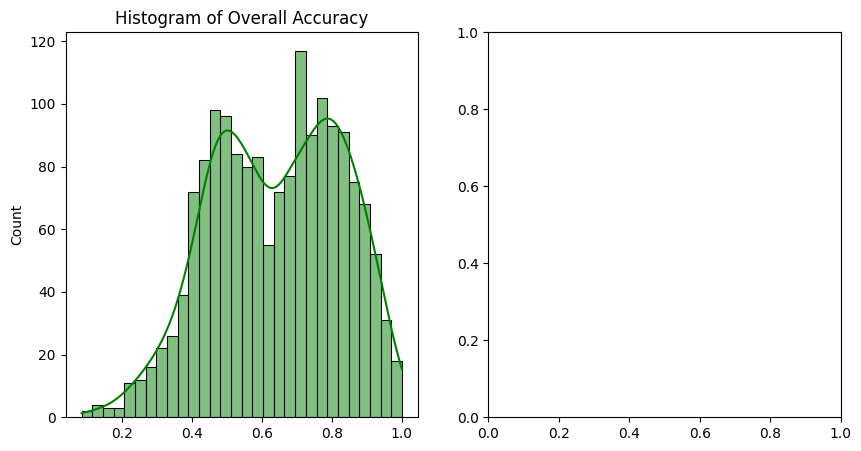

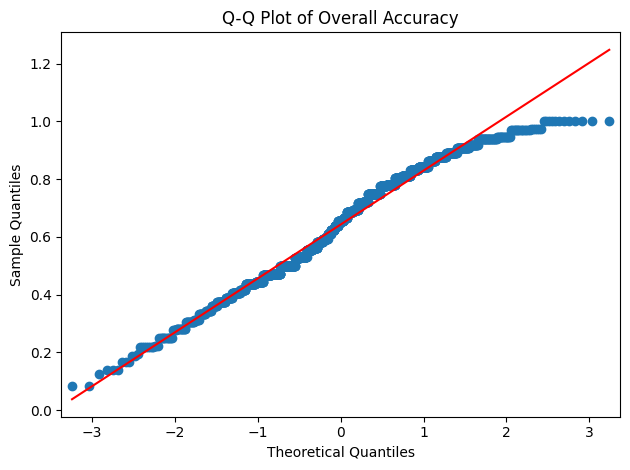

Overall Shapiro-Wilk Test: Statistics=0.9771729622463939, p=1.1305580564360145e-15
Overall D'Agostino's K-squared Test: Statistics=128.00336749838513, p=1.6011127473922673e-28


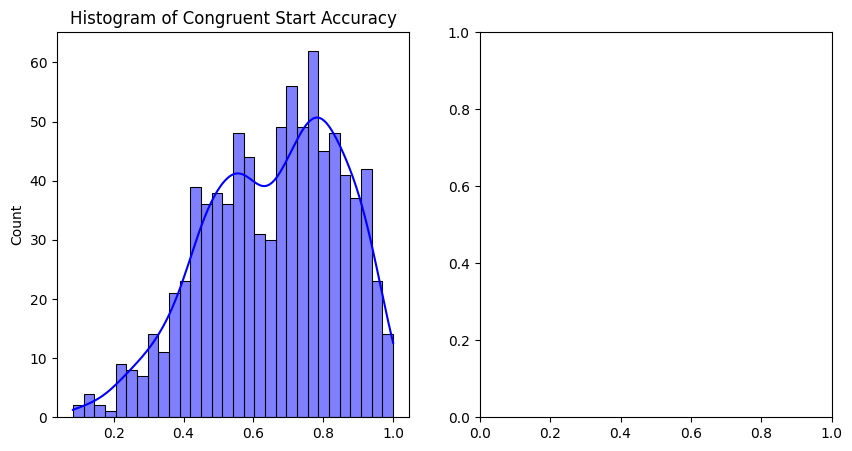

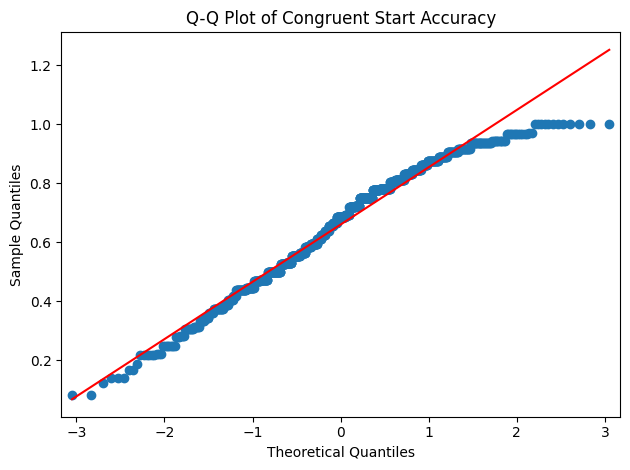

Congruent Shapiro-Wilk Test: Statistics=0.9733208339499922, p=1.583211358260322e-11
Congruent D'Agostino's K-squared Test: Statistics=41.538406638560744, p=9.55101671051571e-10


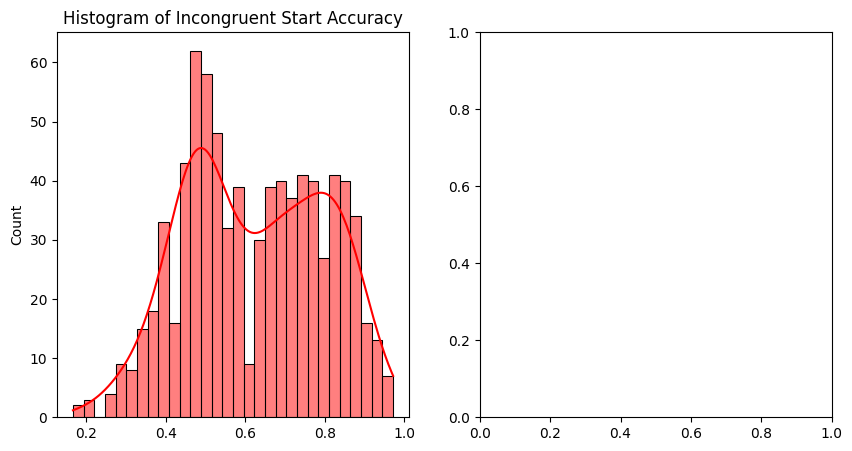

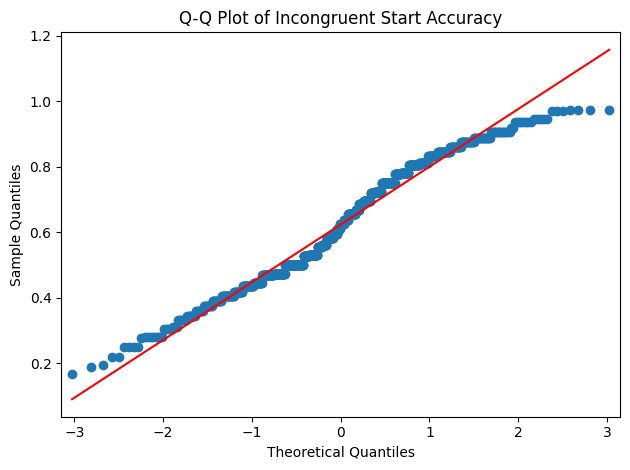

Incongruent Shapiro-Wilk Test: Statistics=0.9715894018707096, p=2.126784990973821e-11
Incongruent D'Agostino's K-squared Test: Statistics=150.87789005675697, p=1.726960696104111e-33


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, normaltest
import statsmodels.api as sm

# Assuming congruent_data and incongruent_data are defined and contain the data.

# Combine the accuracy data into a single DataFrame for congruent and incongruent starts
congruent_acc_df = pd.concat(congruent_data, axis=1)
incongruent_acc_df = pd.concat(incongruent_data, axis=1)

# Combine all accuracy data for overall normality tests
all_acc_df = pd.concat([congruent_acc_df, incongruent_acc_df], axis=1)

# Clean data by removing NaN values
congruent_acc_values = congruent_acc_df.values.flatten()
congruent_acc_values = congruent_acc_values[~np.isnan(congruent_acc_values)]

incongruent_acc_values = incongruent_acc_df.values.flatten()
incongruent_acc_values = incongruent_acc_values[~np.isnan(incongruent_acc_values)]

all_acc_values = all_acc_df.values.flatten()
all_acc_values = all_acc_values[~np.isnan(all_acc_values)]

# Plot histograms and Q-Q plots for all data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(all_acc_values, kde=True, bins=30, color='green')
plt.title('Histogram of Overall Accuracy')

plt.subplot(1, 2, 2)
sm.qqplot(all_acc_values, line='s')
plt.title('Q-Q Plot of Overall Accuracy')
plt.tight_layout()
plt.show()

# Perform Shapiro-Wilk test for normality on all data
stat, p = shapiro(all_acc_values)
print(f'Overall Shapiro-Wilk Test: Statistics={stat}, p={p}')

# Perform D'Agostino's K-squared test for normality on all data
stat, p = normaltest(all_acc_values)
print(f'Overall D\'Agostino\'s K-squared Test: Statistics={stat}, p={p}')

# Plot histograms and Q-Q plots for congruent data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(congruent_acc_values, kde=True, bins=30, color='blue')
plt.title('Histogram of Congruent Start Accuracy')

plt.subplot(1, 2, 2)
sm.qqplot(congruent_acc_values, line='s')
plt.title('Q-Q Plot of Congruent Start Accuracy')
plt.tight_layout()
plt.show()

# Perform Shapiro-Wilk test for normality on congruent data
stat, p = shapiro(congruent_acc_values)
print(f'Congruent Shapiro-Wilk Test: Statistics={stat}, p={p}')

# Perform D'Agostino's K-squared test for normality on congruent data
stat, p = normaltest(congruent_acc_values)
print(f'Congruent D\'Agostino\'s K-squared Test: Statistics={stat}, p={p}')

# Plot histograms and Q-Q plots for incongruent data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(incongruent_acc_values, kde=True, bins=30, color='red')
plt.title('Histogram of Incongruent Start Accuracy')

plt.subplot(1, 2, 2)
sm.qqplot(incongruent_acc_values, line='s')
plt.title('Q-Q Plot of Incongruent Start Accuracy')
plt.tight_layout()
plt.show()

# Perform Shapiro-Wilk test for normality on incongruent data
stat, p = shapiro(incongruent_acc_values)
print(f'Incongruent Shapiro-Wilk Test: Statistics={stat}, p={p}')

# Perform D'Agostino's K-squared test for normality on incongruent data
stat, p = normaltest(incongruent_acc_values)
print(f'Incongruent D\'Agostino\'s K-squared Test: Statistics={stat}, p={p}')

<IPython.core.display.Javascript object>

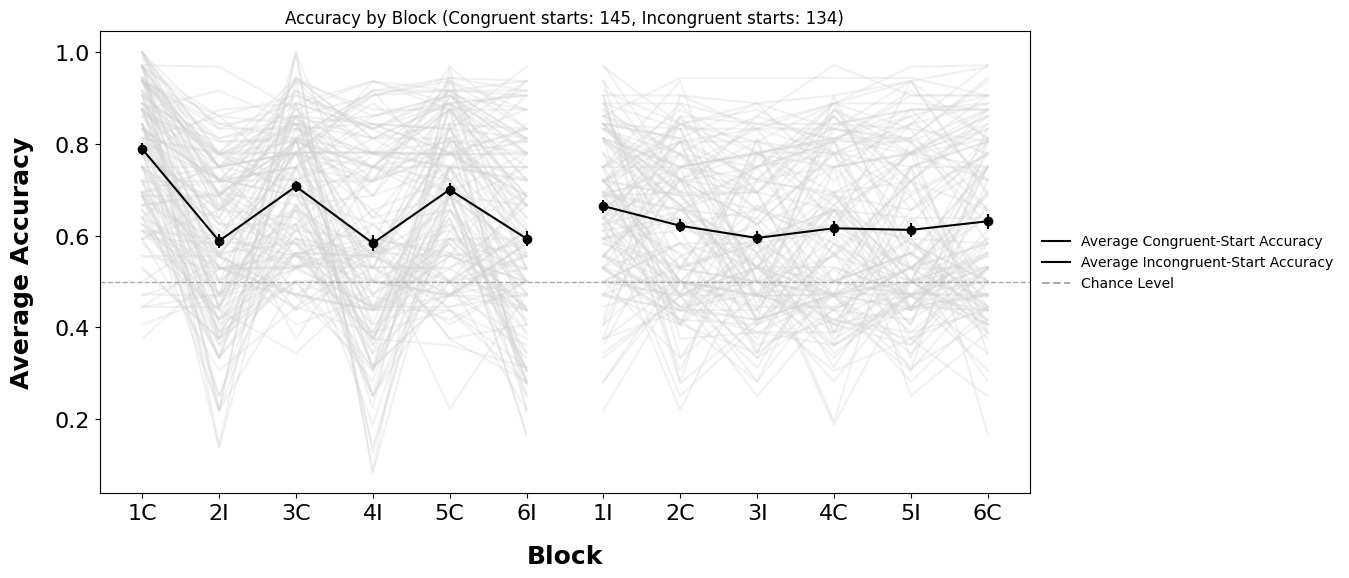

Significant blocks for congruent start participants (accuracy significantly above 0.5):
Block 1C: Wilcoxon stat = 60.500, p-value = 0.000000
Block 2I: Wilcoxon stat = 2394.500, p-value = 0.000000
Block 3C: Wilcoxon stat = 258.000, p-value = 0.000000
Block 4I: Wilcoxon stat = 2684.500, p-value = 0.000011
Block 5C: Wilcoxon stat = 428.000, p-value = 0.000000
Block 6I: Wilcoxon stat = 2294.500, p-value = 0.000001

Significant blocks for incongruent start participants (accuracy significantly above 0.5):
Block 1I: Wilcoxon stat = 629.000, p-value = 0.000000
Block 2C: Wilcoxon stat = 1112.500, p-value = 0.000000
Block 3I: Wilcoxon stat = 1643.000, p-value = 0.000000
Block 4C: Wilcoxon stat = 1486.000, p-value = 0.000000
Block 5I: Wilcoxon stat = 1447.000, p-value = 0.000000
Block 6C: Wilcoxon stat = 1335.000, p-value = 0.000000
Congruent start subjects: Wilcoxon Signed-Rank Test between Congruent and Incongruent blocks: stat=428517.0, p-value=2.955596999813247e-38
Incongruent start subjects:

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import wilcoxon, chi2_contingency

# Assuming all_participants_df is already created with the combined data

# Initialize empty lists to store aggregated data
all_block_counts = []
all_block_accuracy = []
all_trial_type_accuracy = []
all_wilcoxon_p_values_tt = []
all_overall_accuracy = []
all_image_rating_data = []
all_chi2_p_values = []
congruent_start_data = {'congruent': [], 'incongruent': []}
incongruent_start_data = {'congruent': [], 'incongruent': []}
congruent_start_count = 0
incongruent_start_count = 0

# Initialize dictionaries to store paired data
paired_congruent_data = {'congruent': [], 'incongruent': []}
paired_incongruent_data = {'congruent': [], 'incongruent': []}

# Iterate over each participant's data in the combined DataFrame
for subject_id, df in all_participants_df.groupby('Subject ID'):

    # Define blocks based on switches in 'Trial type'
    df['Block Number'] = (df['Trial type'] != df['Trial type'].shift(1)).cumsum()
    df['Block'] = df['Block Number'].astype(str) + df['Trial type'].apply(lambda x: 'C' if x == 'aligned' else 'I')

    # Count how many participants started with congruent vs incongruent
    first_trial_type = df['Trial type'].iloc[0]
    if first_trial_type == 'aligned':
        congruent_trials = df[df['Trial type'] == 'aligned']['Correct (Theoretical)'].astype(int).tolist()
        incongruent_trials = df[df['Trial type'] == 'unaligned']['Correct (Theoretical)'].astype(int).tolist()
        if len(congruent_trials) == len(incongruent_trials):
            # Store only if paired data has the same length
            paired_congruent_data['congruent'].extend(congruent_trials)
            paired_congruent_data['incongruent'].extend(incongruent_trials)
        congruent_start_count += 1
    else:
        congruent_trials = df[df['Trial type'] == 'aligned']['Correct (Theoretical)'].astype(int).tolist()
        incongruent_trials = df[df['Trial type'] == 'unaligned']['Correct (Theoretical)'].astype(int).tolist()
        if len(congruent_trials) == len(incongruent_trials):
            # Store only if paired data has the same length
            paired_incongruent_data['congruent'].extend(congruent_trials)
            paired_incongruent_data['incongruent'].extend(incongruent_trials)
        incongruent_start_count += 1

    # Number of trials in each 'Block'
    block_counts = df['Block'].value_counts()

    # Accuracy in each 'Block'
    block_accuracy = df.groupby('Block')['Correct (Theoretical)'].mean()

    # Accuracy per 'Trial type' (congruent and incongruent)
    df['Correct (Theoretical)'] = df['Correct (Theoretical)'].astype(int)  # Convert to integer

    # Accuracy per 'Trial type' (congruent and incongruent)
    trial_type_accuracy = df.groupby('Trial type')['Correct (Theoretical)'].mean()

    # Accuracy over the whole task
    overall_accuracy = df.groupby('Block')['Correct (Theoretical)'].mean()

    # Accuracy as a function of 'Image Rating'
    # Convert 'Correct (Theoretical)' to binary (1 and 0)
    df['Correct (Binary)'] = df['Correct (Theoretical)'].astype(int)

    # Create a contingency table
    contingency_table = pd.crosstab(df['Image Rating'], df['Correct (Binary)'])

    # Perform chi-squared test
    chi2, p, _, _ = chi2_contingency(contingency_table)

    # Append data to lists
    all_block_counts.append(block_counts)
    all_block_accuracy.append(block_accuracy)
    all_trial_type_accuracy.append(trial_type_accuracy)
    all_wilcoxon_p_values_tt.append(p)
    all_overall_accuracy.append(overall_accuracy)
    all_image_rating_data.append(df.groupby('Image Rating')['Correct (Theoretical)'].mean())
    all_chi2_p_values.append(p)

# Plotting across participants

# Define custom color palette
color = 'black'

# Accuracy by Block with Error 'Cloud' for Average Accuracy for Congruent and Incongruent Starts
plt.figure(figsize=(12, 6))

# Separate data for 'Congruent' and 'Incongruent' starts
congruent_data = [block_accuracy for block_accuracy in all_block_accuracy if 'C' in block_accuracy.index[0]]
incongruent_data = [block_accuracy for block_accuracy in all_block_accuracy if 'I' in block_accuracy.index[0]]

# Plot for Congruent starts if there is any data
if congruent_data:
    for block_accuracy in congruent_data:
        plt.plot(block_accuracy.index, block_accuracy, color='LightGrey', alpha=0.3)  # Faint grey lines for individual accuracies

    congruent_data_df = pd.concat(congruent_data, axis=1)
    avg_congruent_accuracy = congruent_data_df.mean(axis=1)
    sem_congruent_accuracy = congruent_data_df.sem(axis=1)  # Standard Error of the Mean (SEM)

    plt.errorbar(avg_congruent_accuracy.index, avg_congruent_accuracy, yerr=sem_congruent_accuracy, fmt='o-', color=color, label='Average Congruent-Start Accuracy')

# Plot for Incongruent starts if there is any data
if incongruent_data:
    for block_accuracy in incongruent_data:
        plt.plot(block_accuracy.index, block_accuracy, color='LightGrey', alpha=0.3)  # Faint grey lines for individual accuracies

    incongruent_data_df = pd.concat(incongruent_data, axis=1)
    avg_incongruent_accuracy = incongruent_data_df.mean(axis=1)
    sem_incongruent_accuracy = incongruent_data_df.sem(axis=1)  # Standard Error of the Mean (SEM)

    plt.errorbar(avg_incongruent_accuracy.index, avg_incongruent_accuracy, yerr=sem_incongruent_accuracy, fmt='o-', color=color, label='Average Incongruent-Start Accuracy')

# Adding the dotted dark grey line at 0.5 for chance level
plt.axhline(y=0.5, color='darkgrey', linestyle='--', linewidth=1, label='Chance Level')

# Only show plot if there is data
if congruent_data or incongruent_data:
    plt.xlabel('Block', fontsize=18, fontweight='bold', labelpad=15)
    plt.ylabel('Average Accuracy', fontsize=18, fontweight='bold', labelpad=15)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.title(f'Accuracy by Block (Congruent starts: {congruent_start_count}, Incongruent starts: {incongruent_start_count})')

    # Create custom legend entries
    from matplotlib.lines import Line2D
    legend_elements = [Line2D([0], [0], linestyle='-', color=color, label='Average Congruent-Start Accuracy'),
                       Line2D([0], [0], linestyle='-', color=color, label='Average Incongruent-Start Accuracy'),
                       Line2D([0], [0], linestyle='--', color='darkgrey', label='Chance Level')]

    plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)  # frameon=False for no box

    plt.grid(False)
    plt.show()
else:
    print("No data available for congruent or incongruent starts.")

# Initialize lists to store mean accuracy for each participant based on their start type
congruent_start_accuracies_list = []
incongruent_start_accuracies_list = []

# Iterate over each participant's data
for subject_id, df in all_participants_df.groupby('Subject ID'):

    # Define blocks based on switches in 'Trial type'
    df['Block Number'] = (df['Trial type'] != df['Trial type'].shift(1)).cumsum()
    df['Block'] = df['Block Number'].astype(str) + df['Trial type'].apply(lambda x: 'C' if x == 'aligned' else 'I')

    # Calculate mean accuracy across all blocks for this participant
    mean_accuracy = df['Correct (Theoretical)'].mean()

    # Determine if this participant started with congruent or incongruent
    first_trial_type = df['Trial type'].iloc[0]

    # Append mean accuracy to the corresponding list
    if first_trial_type == 'aligned':
        congruent_start_accuracies_list.append(mean_accuracy)
    else:
        incongruent_start_accuracies_list.append(mean_accuracy)

# Initialize lists to store results
significant_blocks_congruent = []
significant_blocks_incongruent = []

# Wilcoxon Signed-Rank Test for congruent data
if congruent_data:
    for block in avg_congruent_accuracy.index:
        block_values = np.array([block_acc.loc[block] for block_acc in congruent_data if block in block_acc.index])
        # Ensure at least 2 data points for Wilcoxon test
        if len(block_values) > 1:
            stat, p_value = wilcoxon(block_values - 0.5)
            if p_value < 0.05:
                significant_blocks_congruent.append((block, stat, p_value))

# Wilcoxon Signed-Rank Test for incongruent data
if incongruent_data:
    for block in avg_incongruent_accuracy.index:
        block_values = np.array([block_acc.loc[block] for block_acc in incongruent_data if block in block_acc.index])
        # Ensure at least 2 data points for Wilcoxon test
        if len(block_values) > 1:
            stat, p_value = wilcoxon(block_values - 0.5)
            if p_value < 0.05:
                significant_blocks_incongruent.append((block, stat, p_value))

# Print out the results
print("Significant blocks for congruent start participants (accuracy significantly above 0.5):")
for block, stat, p_value in significant_blocks_congruent:
    print(f"Block {block}: Wilcoxon stat = {stat:.3f}, p-value = {p_value:.6f}")

print("\nSignificant blocks for incongruent start participants (accuracy significantly above 0.5):")
for block, stat, p_value in significant_blocks_incongruent:
    print(f"Block {block}: Wilcoxon stat = {stat:.3f}, p-value = {p_value:.6f}")

# Wilcoxon Signed-Rank Test: Compare congruent vs incongruent blocks within starting groups
# Congruent start subjects
if len(paired_congruent_data['congruent']) > 0 and len(paired_congruent_data['incongruent']) > 0:
    stat, p_value = wilcoxon(paired_congruent_data['congruent'], paired_congruent_data['incongruent'])
    print(f'Congruent start subjects: Wilcoxon Signed-Rank Test between Congruent and Incongruent blocks: stat={stat}, p-value={p_value}')

# Incongruent start subjects
if len(paired_incongruent_data['congruent']) > 0 and len(paired_incongruent_data['incongruent']) > 0:
    stat, p_value = wilcoxon(paired_incongruent_data['congruent'], paired_incongruent_data['incongruent'])
    print(f'Incongruent start subjects: Wilcoxon Signed-Rank Test between Congruent and Incongruent blocks: stat={stat}, p-value={p_value}')

<IPython.core.display.Javascript object>

Mean accuracy for aligned trial type in aligned-start group: 0.732 ± 0.137
Mean accuracy for aligned trial type in unaligned-start group: 0.624 ± 0.152
Mean accuracy for unaligned trial type in aligned-start group: 0.589 ± 0.173
Mean accuracy for unaligned trial type in unaligned-start group: 0.624 ± 0.140
Mann-Whitney U test for aligned trial type accuracy between groups:
U-statistic = 13666.500, p-value = 0.000000
Sample sizes: N1 = 145, N2 = 134
Z-statistic = 5.869
Effect size (R) = 0.351
Means: Aligned start = 0.732 ± 0.137, Unaligned start = 0.624 ± 0.152
95% Confidence Interval for U: (8395.307, 11034.693)

Mann-Whitney U test for unaligned trial type accuracy between groups:
U-statistic = 8642.000, p-value = 0.111170
Sample sizes: N1 = 145, N2 = 134
Z-statistic = -1.594
Effect size (R) = -0.095
Means: Aligned start = 0.589 ± 0.173, Unaligned start = 0.624 ± 0.140
95% Confidence Interval for U: (8395.307, 11034.693)

Overall mean accuracy for aligned-start group: 0.660 ± 0.133
Ov

/tmp/ipython-input-3606621225.py:222: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([overall_accuracy_aligned_start, overall_accuracy_unaligned_start], labels=['Aligned Start', 'Unaligned Start'])


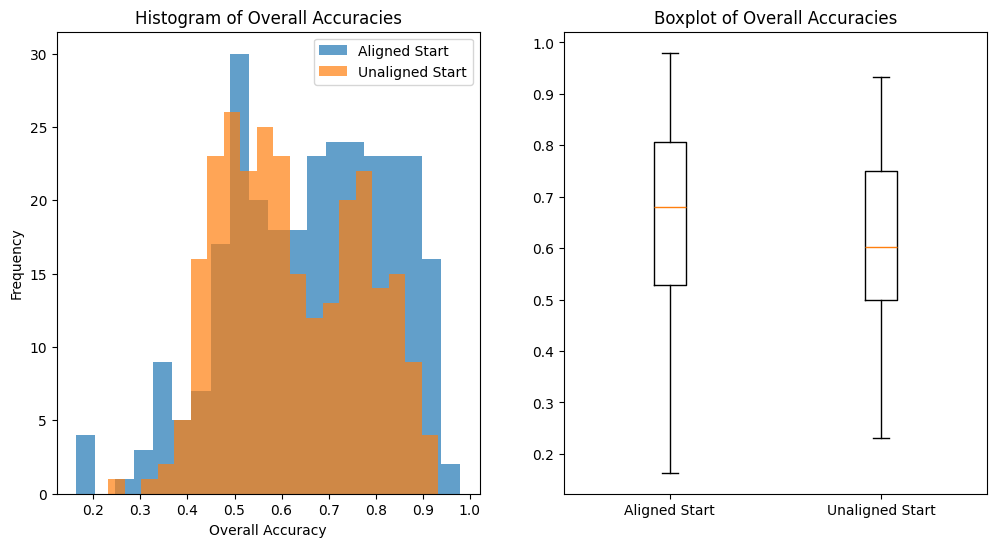

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu, norm, levene
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

# Assume all_participants_df is defined and contains the data.

# Extract data for the Mann-Whitney U test
aligned_start_aligned_accuracy = []
unaligned_start_aligned_accuracy = []
aligned_start_unaligned_accuracy = []
unaligned_start_unaligned_accuracy = []

for subject_id, df in all_participants_df.groupby('Subject ID'):
    first_trial_type = df['Trial type'].iloc[0]
    aligned_accuracy = df[df['Trial type'] == 'aligned']['Correct (Theoretical)'].mean()
    unaligned_accuracy = df[df['Trial type'] == 'unaligned']['Correct (Theoretical)'].mean()

    if first_trial_type == 'aligned':
        aligned_start_aligned_accuracy.append(aligned_accuracy)
        aligned_start_unaligned_accuracy.append(unaligned_accuracy)
    else:
        unaligned_start_aligned_accuracy.append(aligned_accuracy)
        unaligned_start_unaligned_accuracy.append(unaligned_accuracy)

def mannwhitneyu_report(x, y, confidence_level=0.95):
    u_statistic, p_value = mannwhitneyu(x, y, alternative='two-sided')
    n1, n2 = len(x), len(y)

    # Calculating z-statistic
    u_mean = n1 * n2 / 2
    u_std = np.sqrt((n1 * n2 * (n1 + n2 + 1)) / 12)
    z_statistic = (u_statistic - u_mean) / u_std

    # Calculate effect size (R)
    effect_size = z_statistic / np.sqrt(n1 + n2)

    # Calculate mean and std of U distribution
    u_mean = n1 * n2 / 2
    u_std = np.sqrt((n1 * n2 * (n1 + n2 + 1)) / 12)

    # Calculate z-value for the given confidence interval
    z = norm.ppf(1 - (1 - confidence_level) / 2)

    # Calculate confidence interval
    ci_lower = u_mean - z * u_std
    ci_upper = u_mean + z * u_std

    # Means and standard deviations
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    std_x = np.std(x, ddof=1)
    std_y = np.std(y, ddof=1)

    return {
        'u_statistic': u_statistic,
        'p_value': p_value,
        'n1': n1,
        'n2': n2,
        'z_statistic': z_statistic,
        'effect_size': effect_size,
        'mean_x': mean_x,
        'mean_y': mean_y,
        'std_x': std_x,
        'std_y': std_y,
        'ci_lower': ci_lower,
        'ci_upper': ci_upper
    }

# Mann-Whitney U test for aligned trial type accuracy between aligned-start and unaligned-start groups
report_aligned = mannwhitneyu_report(aligned_start_aligned_accuracy, unaligned_start_aligned_accuracy)

# Mann-Whitney U test for unaligned trial type accuracy between aligned-start and unaligned-start groups
report_unaligned = mannwhitneyu_report(aligned_start_unaligned_accuracy, unaligned_start_unaligned_accuracy)

# Means and standard deviations for each group
mean_aligned_start_aligned = np.mean(aligned_start_aligned_accuracy)
std_aligned_start_aligned = np.std(aligned_start_aligned_accuracy, ddof=1)
mean_unaligned_start_aligned = np.mean(unaligned_start_aligned_accuracy)
std_unaligned_start_aligned = np.std(unaligned_start_aligned_accuracy, ddof=1)
mean_aligned_start_unaligned = np.mean(aligned_start_unaligned_accuracy)
std_aligned_start_unaligned = np.std(aligned_start_unaligned_accuracy, ddof=1)
mean_unaligned_start_unaligned = np.mean(unaligned_start_unaligned_accuracy)
std_unaligned_start_unaligned = np.std(unaligned_start_unaligned_accuracy, ddof=1)

print(f"Mean accuracy for aligned trial type in aligned-start group: {mean_aligned_start_aligned:.3f} ± {std_aligned_start_aligned:.3f}")
print(f"Mean accuracy for aligned trial type in unaligned-start group: {mean_unaligned_start_aligned:.3f} ± {std_unaligned_start_aligned:.3f}")
print(f"Mean accuracy for unaligned trial type in aligned-start group: {mean_aligned_start_unaligned:.3f} ± {std_aligned_start_unaligned:.3f}")
print(f"Mean accuracy for unaligned trial type in unaligned-start group: {mean_unaligned_start_unaligned:.3f} ± {std_unaligned_start_unaligned:.3f}")

# Print detailed results for aligned trial type
print(f"Mann-Whitney U test for aligned trial type accuracy between groups:")
print(f"U-statistic = {report_aligned['u_statistic']:.3f}, p-value = {report_aligned['p_value']:.6f}")
print(f"Sample sizes: N1 = {report_aligned['n1']}, N2 = {report_aligned['n2']}")
print(f"Z-statistic = {report_aligned['z_statistic']:.3f}")
print(f"Effect size (R) = {report_aligned['effect_size']:.3f}")
print(f"Means: Aligned start = {report_aligned['mean_x']:.3f} ± {report_aligned['std_x']:.3f}, Unaligned start = {report_aligned['mean_y']:.3f} ± {report_aligned['std_y']:.3f}")
print(f"95% Confidence Interval for U: ({report_aligned['ci_lower']:.3f}, {report_aligned['ci_upper']:.3f})")

# Print detailed results for unaligned trial type
print(f"\nMann-Whitney U test for unaligned trial type accuracy between groups:")
print(f"U-statistic = {report_unaligned['u_statistic']:.3f}, p-value = {report_unaligned['p_value']:.6f}")
print(f"Sample sizes: N1 = {report_unaligned['n1']}, N2 = {report_unaligned['n2']}")
print(f"Z-statistic = {report_unaligned['z_statistic']:.3f}")
print(f"Effect size (R) = {report_unaligned['effect_size']:.3f}")
print(f"Means: Aligned start = {report_unaligned['mean_x']:.3f} ± {report_unaligned['std_x']:.3f}, Unaligned start = {report_unaligned['mean_y']:.3f} ± {report_unaligned['std_y']:.3f}")
print(f"95% Confidence Interval for U: ({report_unaligned['ci_lower']:.3f}, {report_unaligned['ci_upper']:.3f})")

# Compute overall mean accuracy for each group (including both trial types)
overall_accuracy_aligned_start = aligned_start_aligned_accuracy + aligned_start_unaligned_accuracy
overall_accuracy_unaligned_start = unaligned_start_aligned_accuracy + unaligned_start_unaligned_accuracy

# Per-subject average accuracy
aligned_subjects_overall = [np.mean([aligned, unaligned]) for aligned, unaligned in zip(aligned_start_aligned_accuracy, aligned_start_unaligned_accuracy)]
unaligned_subjects_overall = [np.mean([aligned, unaligned]) for aligned, unaligned in zip(unaligned_start_aligned_accuracy, unaligned_start_unaligned_accuracy)]

# Means and standard deviations for overall accuracy
mean_overall_aligned_start = np.mean(aligned_subjects_overall)
std_overall_aligned_start = np.std(aligned_subjects_overall, ddof=1)
mean_overall_unaligned_start = np.mean(unaligned_subjects_overall)
std_overall_unaligned_start = np.std(unaligned_subjects_overall, ddof=1)

# Perform Mann-Whitney U test for overall accuracy between aligned-start and unaligned-start groups
report_overall = mannwhitneyu_report(aligned_subjects_overall, unaligned_subjects_overall)

print(f"\nOverall mean accuracy for aligned-start group: {mean_overall_aligned_start:.3f} ± {std_overall_aligned_start:.3f}")
print(f"Overall mean accuracy for unaligned-start group: {mean_overall_unaligned_start:.3f} ± {std_overall_unaligned_start:.3f}")

# Print detailed results for overall accuracy
print(f"Mann-Whitney U test for overall accuracy between starting groups:")
print(f"U-statistic = {report_overall['u_statistic']:.3f}, p-value = {report_overall['p_value']:.6f}")
print(f"Sample sizes: N1 = {report_overall['n1']}, N2 = {report_overall['n2']}")
print(f"Z-statistic = {report_overall['z_statistic']:.3f}")
print(f"Effect size (R) = {report_overall['effect_size']:.3f}")
print(f"Means: Aligned start = {report_overall['mean_x']:.3f} ± {report_overall['std_x']:.3f}, Unaligned start = {report_overall['mean_y']:.3f} ± {report_overall['std_y']:.3f}")
print(f"95% Confidence Interval for U: ({report_overall['ci_lower']:.3f}, {report_overall['ci_upper']:.3f})")

# Extract accuracies for all aligned and unaligned trials irrespective of starting type
all_aligned_accuracies = aligned_start_aligned_accuracy + unaligned_start_aligned_accuracy
all_unaligned_accuracies = aligned_start_unaligned_accuracy + unaligned_start_unaligned_accuracy

# Mann-Whitney U test for aligned vs. unaligned trial type accuracy
report_all = mannwhitneyu_report(all_aligned_accuracies, all_unaligned_accuracies)

# Print detailed results for aligned vs. unaligned trial type
print(f"\nMann-Whitney U test for aligned vs. unaligned trial type accuracy:")
print(f"U-statistic = {report_all['u_statistic']:.3f}, p-value = {report_all['p_value']:.6f}")
print(f"Sample sizes: N1 = {report_all['n1']}, N2 = {report_all['n2']}")
print(f"Z-statistic = {report_all['z_statistic']:.3f}")
print(f"Effect size (R) = {report_all['effect_size']:.3f}")
print(f"Means: Aligned = {report_all['mean_x']:.3f} ± {report_all['std_x']:.3f}, Unaligned = {report_all['mean_y']:.3f} ± {report_all['std_y']:.3f}")
print(f"95% Confidence Interval for U: ({report_all['ci_lower']:.3f}, {report_all['ci_upper']:.3f})")

# Preparing data for 2x2 ANOVA
anova_data = {
    'Start_Type': [],
    'Trial_Type': [],
    'Accuracy': []
}

for subject_id, df in all_participants_df.groupby('Subject ID'):
    first_trial_type = df['Trial type'].iloc[0]
    start_type = 'Aligned' if first_trial_type == 'aligned' else 'Unaligned'
    for trial_type, sub_df in df.groupby('Trial type'):
        average_accuracy = sub_df['Correct (Theoretical)'].mean()
        trial_label = 'Aligned_Trial_Type' if trial_type == 'aligned' else 'Unaligned_Trial_Type'
        anova_data['Start_Type'].append(start_type)
        anova_data['Trial_Type'].append(trial_label)
        anova_data['Accuracy'].append(average_accuracy)

anova_df = pd.DataFrame(anova_data)

# 2x2 ANOVA
model = ols('Accuracy ~ C(Start_Type) * C(Trial_Type)', data=anova_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Extracting degrees of freedom
df_start_type = anova_table.loc['C(Start_Type)', 'df']
df_trial_type = anova_table.loc['C(Trial_Type)', 'df']
df_interaction = anova_table.loc['C(Start_Type):C(Trial_Type)', 'df']
df_residual = anova_table.loc['Residual', 'df']

df_between = df_start_type + df_trial_type + df_interaction
df_within = df_residual

print(anova_table)
print("\nDegrees of Freedom:")
print(f"Between Groups: {df_between}")
print(f"Within Groups: {df_within}")

# Tukey's HSD post hoc analysis
mc = pairwise_tukeyhsd(anova_df['Accuracy'], anova_df['Start_Type'] + "_" + anova_df['Trial_Type'], alpha=0.05)
print(mc)

# Perform Levene's test for homogeneity of variances
stat, p = levene(anova_df[anova_df['Start_Type'] == 'Aligned']['Accuracy'],
                 anova_df[anova_df['Start_Type'] == 'Unaligned']['Accuracy'],
                 anova_df[anova_df['Trial_Type'] == 'Aligned_Trial_Type']['Accuracy'],
                 anova_df[anova_df['Trial_Type'] == 'Unaligned_Trial_Type']['Accuracy'])
# Calculate degrees of freedom for Levene's test
df_group = 3  # Number of groups - 1
df_total = len(anova_df['Accuracy']) - 4  # Total number of observations - number of groups

print(f"Levene's Test for homogeneity of variances: F({df_group}, {df_total}) = {stat:.2f}, p = {p:.3f}")

# Plotting histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(overall_accuracy_aligned_start, bins=20, alpha=0.7, label='Aligned Start')
plt.hist(overall_accuracy_unaligned_start, bins=20, alpha=0.7, label='Unaligned Start')
plt.title('Histogram of Overall Accuracies')
plt.legend()
plt.xlabel('Overall Accuracy')
plt.ylabel('Frequency')

# Plotting boxplots
plt.subplot(1, 2, 2)
plt.boxplot([overall_accuracy_aligned_start, overall_accuracy_unaligned_start], labels=['Aligned Start', 'Unaligned Start'])
plt.title('Boxplot of Overall Accuracies')

plt.show()

# Average accuracy per block as a function of block type (separated by starting group)

<IPython.core.display.Javascript object>


ANOVA results:
                          sum_sq     df          F        PR(>F)
Q("Trial type")         0.774524    1.0  33.777653  1.043474e-08
Group                   0.187313    1.0   8.168881  4.421806e-03
Q("Trial type"):Group   0.722973    1.0  31.529496  3.110396e-08
Residual               12.703256  554.0        NaN           NaN

Post hoc test results (Tukey's HSD):
                    group1                     group2  meandiff    p-adj   lower   upper  reject
  C-start Congruent Trials C-start Incongruent Trials   -0.1437 0.00e+00 -0.1895 -0.0979    True
  C-start Congruent Trials   I-start Congruent Trials   -0.1087 0.00e+00 -0.1555 -0.0620    True
  C-start Congruent Trials I-start Incongruent Trials   -0.1083 0.00e+00 -0.1551 -0.0616    True
C-start Incongruent Trials   I-start Congruent Trials    0.0350    0.217 -0.0118  0.0818   False
C-start Incongruent Trials I-start Incongruent Trials    0.0354    0.209 -0.0114  0.0821   False
  I-start Congruent Trials I-start Inco

/tmp/ipython-input-1875565900.py:98: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(x='Starting_block', y='Correct (Theoretical)', hue='Trial type', data=mean_combinations,


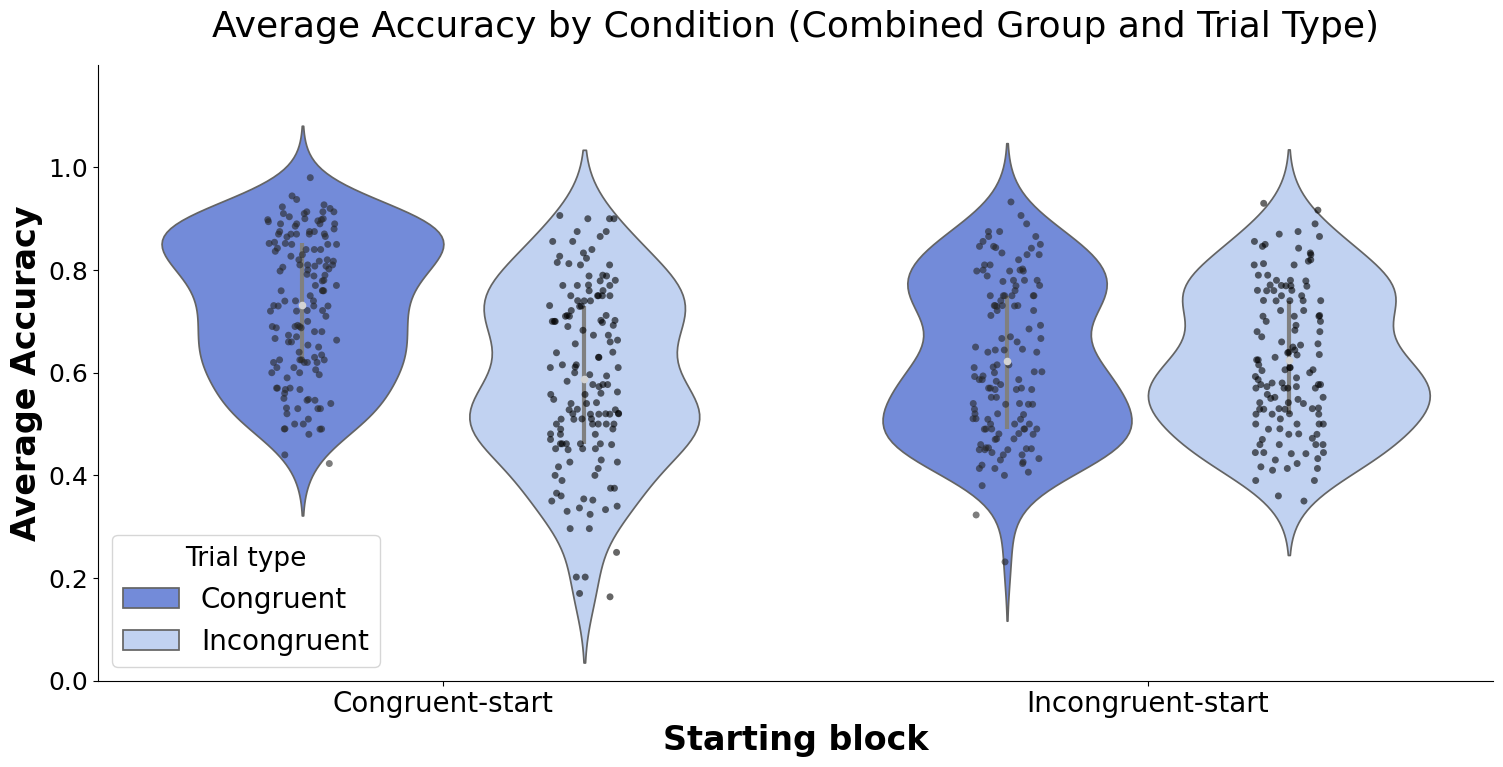

For the comparison between C-start Congruent Trials and C-start Incongruent Trials: X²(288) = 8.64, p = 0.003
For the comparison between C-start Congruent Trials and I-start Congruent Trials: X²(277) = 2.78, p = 0.095
For the comparison between C-start Congruent Trials and I-start Incongruent Trials: X²(277) = 0.10, p = 0.757
For the comparison between C-start Incongruent Trials and I-start Congruent Trials: X²(277) = 2.21, p = 0.137
For the comparison between C-start Incongruent Trials and I-start Incongruent Trials: X²(277) = 7.07, p = 0.008
For the comparison between I-start Congruent Trials and I-start Incongruent Trials: X²(266) = 1.86, p = 0.173


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols
import statsmodels.api as sm
from scipy.stats import fligner
from itertools import combinations

def analyze_and_plot_violin_anova(data_df_aligned, data_df_unaligned):
    if data_df_aligned.empty or data_df_unaligned.empty:
        print("No data available for analysis.")
        return

    # Combine data for aligned and unaligned participants
    data_df_aligned['Group'] = 'C-start'
    data_df_unaligned['Group'] = 'I-start'
    combined_data_df = pd.concat([data_df_aligned, data_df_unaligned])

    # Calculate mean accuracy per participant for 'Trial type' and 'Group'
    mean_combinations = combined_data_df.groupby(['Subject ID', 'Trial type', 'Group'])['Correct (Theoretical)'].mean().reset_index()
    mean_combinations['Trial type'] = mean_combinations['Trial type'].replace({'aligned': 'Congruent', 'unaligned': 'Incongruent'})

    # Define the custom labels for plotting
    mean_combinations['Combined_label'] = mean_combinations.apply(
        lambda x: f"{x['Group']} {x['Trial type']} Trials", axis=1)

    # Conduct ANOVA
    formula = 'Q("Correct (Theoretical)") ~ Q("Trial type") * Group'
    model = ols(formula, data=mean_combinations).fit()
    anova_results = sm.stats.anova_lm(model, typ=2)

    # Conduct post hoc test (Tukey's HSD)
    posthoc = pairwise_tukeyhsd(mean_combinations['Correct (Theoretical)'], mean_combinations['Combined_label'])
    # Convert Tukey's HSD results to a DataFrame
    posthoc_result = pd.DataFrame(data=posthoc.summary().data[1:], columns=posthoc.summary().data[0])

    # Format p-values for better readability
    posthoc_result["p-adj"] = posthoc_result["p-adj"].apply(lambda p: f"{p:.2e}" if p < 0.001 else f"{p:.3f}")

    # Print the ANOVA results
    print("\nANOVA results:")
    print(anova_results)

    # Print the updated Tukey's HSD results
    print("\nPost hoc test results (Tukey's HSD):")
    print(posthoc_result.to_string(index=False))

    # Conduct Fligner-Killeen test for equality of variances
    grouped_data = mean_combinations.groupby('Combined_label')['Correct (Theoretical)'].apply(list)
    pairwise_results = []

    for (group1, data1), (group2, data2) in combinations(zip(grouped_data.index.tolist(), grouped_data), 2):
        fligner_pair = fligner(data1, data2)
        pairwise_results.append({
            'Group1': group1,
            'Group2': group2,
            'Fligner_statistic': fligner_pair.statistic,
            'Fligner_df': len(data1) + len(data2) - 2,
            'Fligner_pvalue': fligner_pair.pvalue
        })

    pairwise_df = pd.DataFrame(pairwise_results)
    # Apply Bonferroni correction for multiple comparisons
    pairwise_df['Fligner_padj'] = pairwise_df['Fligner_pvalue'] * len(pairwise_results)
    pairwise_df['Fligner_padj'] = pairwise_df['Fligner_padj'].apply(lambda p: min(p, 1.0))  # p-value cannot exceed 1.0

    # Print pairwise Fligner-Killeen test results
    print("\nPairwise Fligner-Killeen test results:")
    print(pairwise_df[['Group1', 'Group2', 'Fligner_statistic', 'Fligner_df', 'Fligner_pvalue']].to_string(index=False))

    # Define the custom color palette with specific blue colors
    coolwarm_palette = sns.color_palette("coolwarm", 7)
    trial_palette = {
        'Congruent': coolwarm_palette[0],   # Dark blue
        'Incongruent': coolwarm_palette[2]  # Light blue
    }

    # Adjust labels for grouping by 'Starting block'
    mean_combinations['Starting_block'] = mean_combinations['Group']

    # Update tick label names
    tick_names = {
        'C-start': 'Congruent-start',
        'I-start': 'Incongruent-start'
    }
    mean_combinations['Starting_block'] = mean_combinations['Starting_block'].map(tick_names)

    # Sort data to ensure 'Congruent-start' is plotted first
    mean_combinations['Starting_block'] = pd.Categorical(mean_combinations['Starting_block'], categories=['Congruent-start', 'Incongruent-start'], ordered=True)

    # Create figure and plot violin plot
    plt.figure(figsize=(18, 8))
    base_positions = {'Congruent-start': 0, 'Incongruent-start': 1}
    sns.violinplot(x='Starting_block', y='Correct (Theoretical)', hue='Trial type', data=mean_combinations,
                   palette=trial_palette, split=False, inner=None, dodge=True)
    sns.stripplot(x='Starting_block', y='Correct (Theoretical)', hue='Trial type', data=mean_combinations,
                  jitter=True, color='black', alpha=0.6, dodge=True)

    # Overlay means and IQRs
    offsets = {'Congruent': -0.2, 'Incongruent': 0.2}  # Adjusting offsets for better alignment
    for starting_block in mean_combinations['Starting_block'].unique():
        for trial_type in mean_combinations['Trial type'].unique():
            subset = mean_combinations[(mean_combinations['Starting_block'] == starting_block) &
                                       (mean_combinations['Trial type'] == trial_type)]
            base_position = base_positions[starting_block]
            xpos = base_position + offsets[trial_type]

            mean_val = subset['Correct (Theoretical)'].mean()
            q25, q75 = subset['Correct (Theoretical)'].quantile([0.25, 0.75])

            # Plotting mean and IQR
            plt.scatter(x=[xpos], y=[mean_val], color='lightgray', s=20, zorder=3)
            plt.plot([xpos, xpos], [q25, q75], color='gray', lw=3, solid_capstyle='butt', zorder=2)

    plt.xlabel('Starting block', fontsize=24, fontweight='bold')
    plt.ylabel('Average Accuracy', fontsize=24, fontweight='bold')
    plt.title('Average Accuracy by Condition (Combined Group and Trial Type)', fontsize=26, pad=20)
    plt.xticks([0, 1], ['Congruent-start', 'Incongruent-start'], fontsize=20)
    plt.yticks(np.linspace(0, 1, 6), fontsize=18)  # y-ticks from 0 to 1 in 0.2 increments

    # Expand the y-axis limit to create space for annotations
    plt.ylim(0, 1.2)  # Extend beyond 1.0 for space for annotation

    # Handle legend properly
    handles, labels = plt.gca().get_legend_handles_labels()
    unique_labels = dict(zip(labels, handles))

    # Update the legend to have the desired labels
    correct_labels = ['Congruent', 'Incongruent']
    plt.legend(handles[:2], correct_labels, title='Trial type', fontsize=20, title_fontsize=19)

    sns.despine()
    plt.show()

    # Print the Fligner-Killeen test results in APA style
    for index, row in pairwise_df.iterrows():
        print(f"For the comparison between {row['Group1']} and {row['Group2']}: X²({row['Fligner_df']}) = {row['Fligner_statistic']:.2f}, p = {row['Fligner_pvalue']:.3f}")

analyze_and_plot_violin_anova(aligned_start_df, unaligned_start_df)

#Average trialwise accuracy within each block, by starting group

<IPython.core.display.Javascript object>

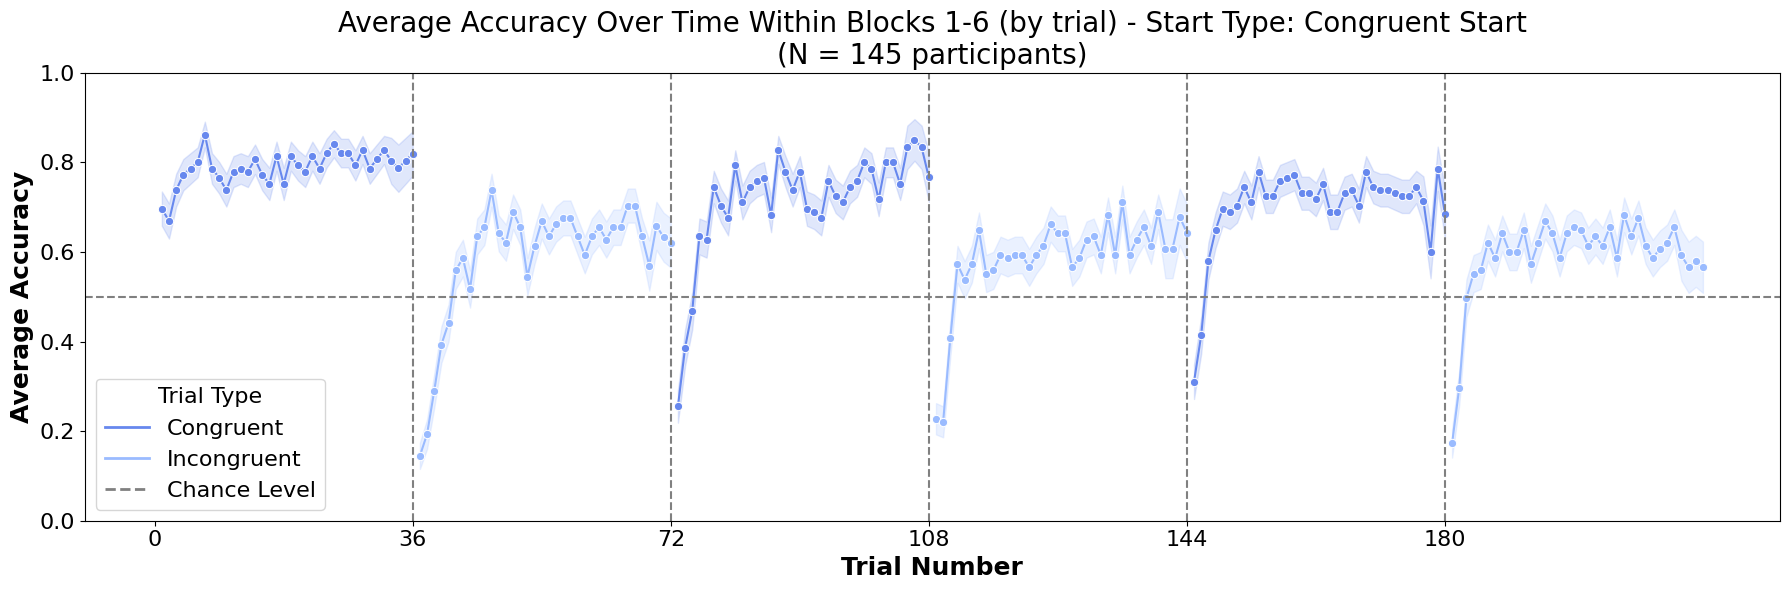

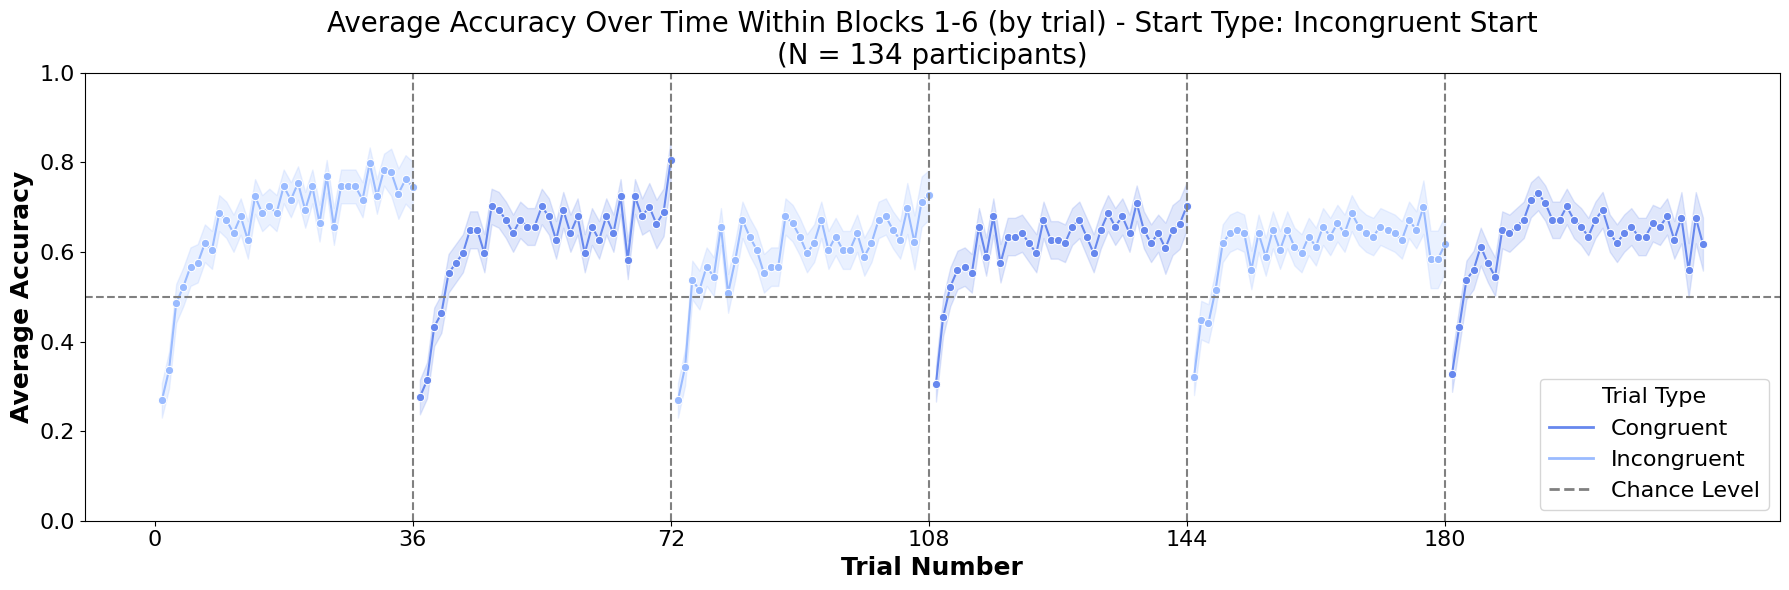

In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming all_participants_df has been prepared with correct block numbers and trial numbers.

# Define a function to fix block numbering for each participant
def fix_block_numbering(df):
    participants = df['Subject ID'].unique()
    fixed_df_list = []

    for participant in participants:
        participant_df = df[df['Subject ID'] == participant].copy()
        participant_df['Block Number'] = (participant_df['Trial type'] != participant_df['Trial type'].shift(1)).cumsum()
        participant_df['Block'] = participant_df['Block Number'].astype(str) + \
                                  participant_df['Trial type'].apply(lambda x: 'A' if x == 'aligned' else 'U')
        fixed_df_list.append(participant_df)

    fixed_df = pd.concat(fixed_df_list, ignore_index=True)
    return fixed_df

# Apply the fix
all_participants_df = fix_block_numbering(all_participants_df)

# Add cumulative trial number within each block
all_participants_df['Trial Number'] = all_participants_df.groupby(['Subject ID', 'Block'])['Trial type'].cumcount() + 1

# Convert 'Correct (Theoretical)' to binary (1 for True, 0 for False)
all_participants_df['Correct (Binary)'] = all_participants_df['Correct (Theoretical)'].astype(int)

# Convert 'Block' to string and create a column to represent the type of block (Congruent/Incongruent)
all_participants_df['Block Type'] = all_participants_df['Trial type'].apply(lambda x: 'Congruent' if x == 'aligned' else 'Incongruent')

# Separate data based on the starting block type
aligned_start_df = all_participants_df.groupby('Subject ID').filter(lambda x: x['Trial type'].iloc[0] == 'aligned')
unaligned_start_df = all_participants_df.groupby('Subject ID').filter(lambda x: x['Trial type'].iloc[0] == 'unaligned')

# Count the number of unique participants in each subset
aligned_start_participants = aligned_start_df['Subject ID'].nunique()
unaligned_start_participants = unaligned_start_df['Subject ID'].nunique()

# Define the coolwarm palette and extract colors
coolwarm_palette = sns.color_palette("coolwarm")
palette = {'Congruent': coolwarm_palette[0], 'Incongruent': coolwarm_palette[1]}  # Switching colors

# Function to analyze and plot data for a given subset with specified colors for each trial type
def analyze_and_plot_combined(data_df, start_type, num_participants):
    blocks = data_df['Block Number'].unique()
    max_aligned_trials = 36  # Adjust if needed

    fig, ax = plt.subplots(figsize=(18, 6))

    for block in blocks:
        block_data = data_df[data_df['Block Number'] == block]
        overall_avg = block_data.groupby(['Trial Number'])['Correct (Theoretical)'].agg(['mean', 'sem']).reset_index()

        # Filter out trials that exceed the maximum
        overall_avg_filtered = overall_avg[overall_avg['Trial Number'] <= max_aligned_trials]

        # Determine the block type for color assignment
        block_type = block_data['Block Type'].iloc[0]

        # Plot overall average accuracy per trial for each block with error bands
        sns.lineplot(x=overall_avg_filtered['Trial Number'] + (block - 1) * max_aligned_trials,
                     y=overall_avg_filtered['mean'],
                     color=palette[block_type],
                     ax=ax, marker='o',
                     label=f'Block {block} ({block_type})',
                     errorbar=None)

        # Draw the error bands manually
        ax.fill_between(overall_avg_filtered['Trial Number'] + (block - 1) * max_aligned_trials,
                        overall_avg_filtered['mean'] - overall_avg_filtered['sem'],
                        overall_avg_filtered['mean'] + overall_avg_filtered['sem'],
                        color=palette[block_type], alpha=0.2)

        # Vertical line to indicate block change
        if block < blocks[-1]:
            ax.axvline(x=block * max_aligned_trials, linestyle='--', color='grey')

    # Adding titles and labels with increased font size
    ax.set_title(f'Average Accuracy Over Time Within Blocks 1-6 (by trial) - Start Type: {start_type}\n(N = {num_participants} participants)', fontsize=20)
    ax.set_ylim(0, 1)
    ax.axhline(0.5, linestyle='--', color='grey', label='Chance Level')
    ax.set_xlabel('Trial Number', fontsize=18, fontweight='bold')
    ax.set_ylabel('Average Accuracy', fontsize=18, fontweight='bold')
    plt.xticks(ticks=[i * max_aligned_trials for i in range(len(blocks))], fontsize=16)
    plt.yticks(fontsize=16)

    # Creating a custom legend
    custom_legend = [plt.Line2D([0], [0], color=palette['Congruent'], lw=2, label='Congruent'),
                     plt.Line2D([0], [0], color=palette['Incongruent'], lw=2, label='Incongruent'),
                     plt.Line2D([0], [0], linestyle='--', color='grey', lw=2, label='Chance Level')]
    ax.legend(handles=custom_legend, title='Trial Type', fontsize=16, title_fontsize=16)

    plt.tight_layout()
    plt.grid(False)
    plt.show()

# Analyze and plot for aligned-start participants
analyze_and_plot_combined(aligned_start_df, 'Congruent Start', aligned_start_participants)

# Analyze and plot for unaligned-start participants
analyze_and_plot_combined(unaligned_start_df, 'Incongruent Start', unaligned_start_participants)

# Accuracy as a function of reward (+5) v.s. punishment (-5) associated conditions


<IPython.core.display.Javascript object>

Accuracy for 'Disliked items' is significantly different from 'Liked items' in Congruent block (p<.001).
Accuracy for 'Disliked items' is significantly different from 'Liked items' in Incongruent block (p<.001).


/tmp/ipython-input-2063462873.py:68: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  ax = sns.barplot(
/tmp/ipython-input-2063462873.py:82: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(


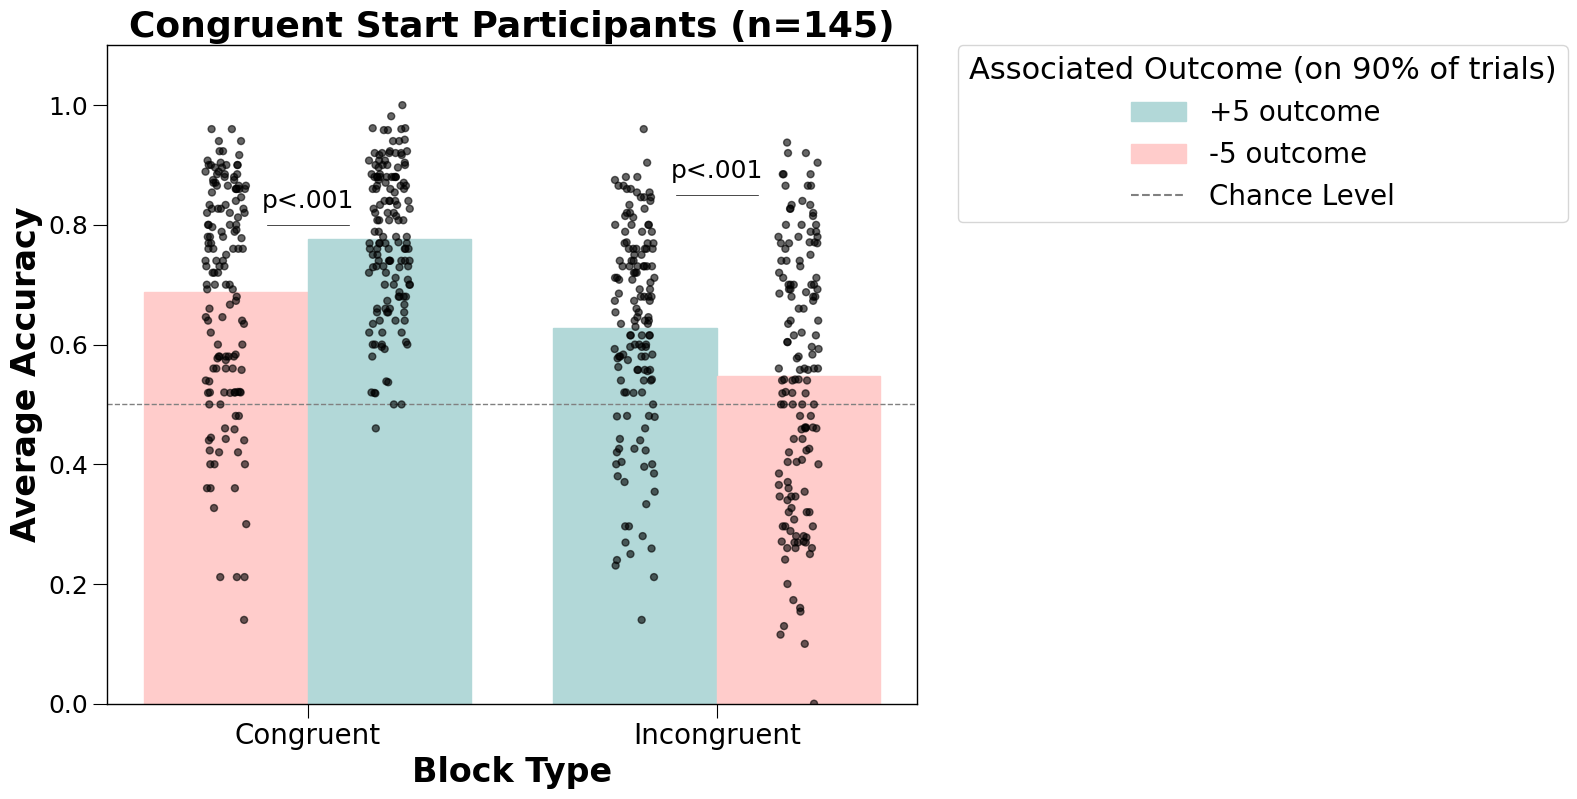

Accuracy for 'Disliked items' is significantly different from 'Liked items' in Congruent block (p<.001).
Accuracy for 'Disliked items' is significantly different from 'Liked items' in Incongruent block (p<.001).


/tmp/ipython-input-2063462873.py:68: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  ax = sns.barplot(
/tmp/ipython-input-2063462873.py:82: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(


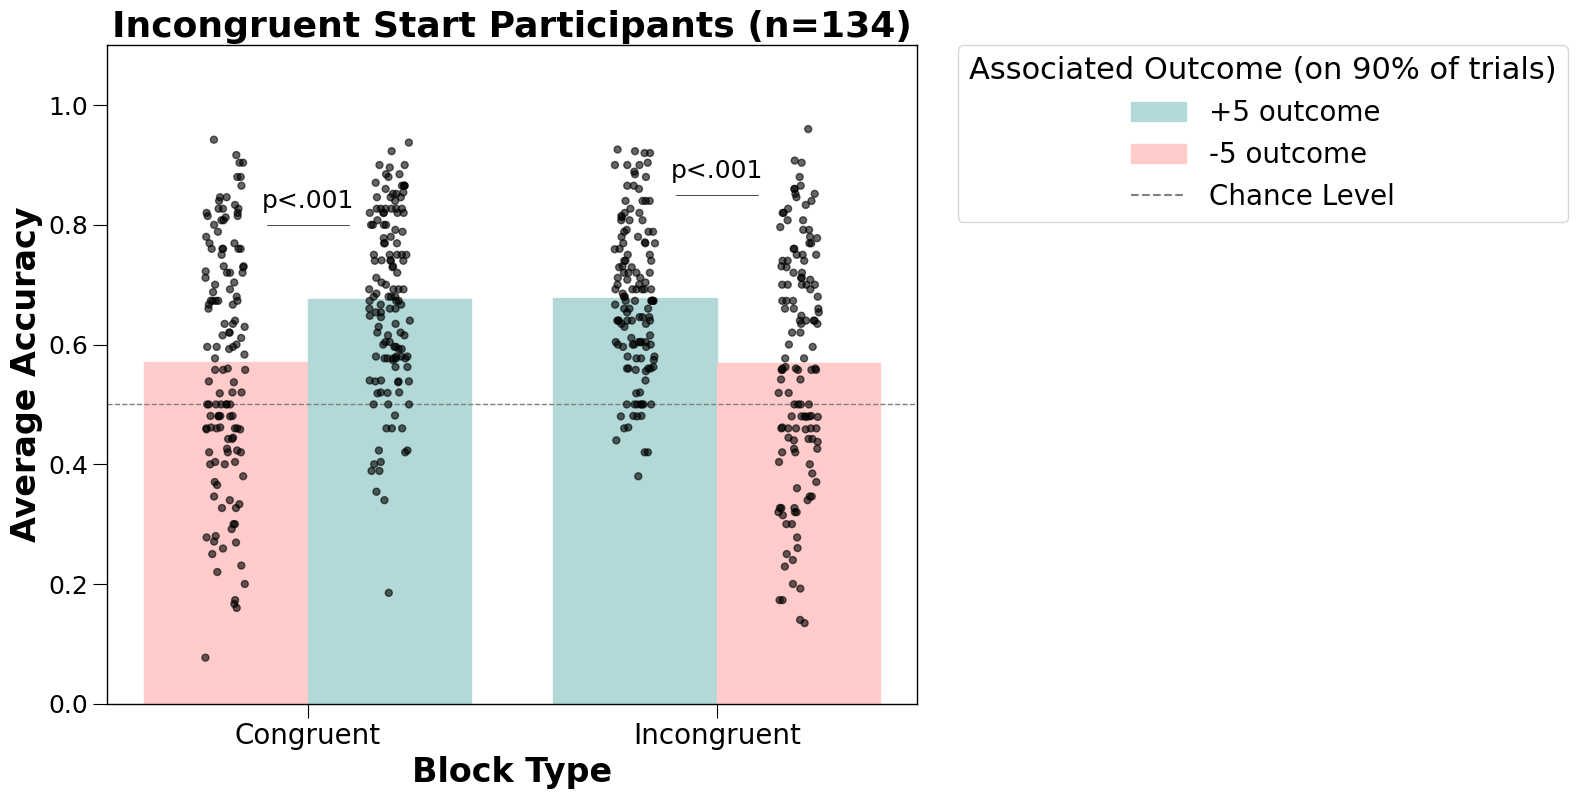

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import pandas as pd
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D  # Import Line2D for custom legend line

# Define the new color palette for better compatibility with orange and purple
new_palette = ['#b2d8d8', '#ffcccb']

# Manually defining the color palette for each combination
custom_palette = {
    ('Congruent', 'Liked items'): new_palette[0],  # +5 outcome in Congruent block
    ('Congruent', 'Disliked items'): new_palette[1],  # -5 outcome in Congruent block
    ('Incongruent', 'Liked items'): new_palette[1],  # -5 outcome in Incongruent block
    ('Incongruent', 'Disliked items'): new_palette[0]  # +5 outcome in Incongruent block
}

# Define a function to print and plot accuracy by block and image rating for each group with significance
def plot_accuracy_by_block_image_rating(data_df, title_suffix):
    if data_df.empty:
        print(f"No data to plot for {title_suffix}.")
        return

    # Combine 'like' and 'strongly like' into 'Liked items', and 'dislike' and 'strongly dislike' into 'Disliked items'
    data_df['Image Rating'] = data_df['Image Rating'].replace({
        'like': 'Liked items',
        'strongly_like': 'Liked items',
        'dislike': 'Disliked items',
        'strongly_dislike': 'Disliked items'
    })

    # Replace 'Aligned' with 'Congruent' and 'Unaligned' with 'Incongruent' in 'Block Type'
    data_df['Block Type'] = data_df['Block Type'].replace({
        'Aligned': 'Congruent',
        'Unaligned': 'Incongruent'
    })

    # Ensure 'Image Rating' is in the specified order
    rating_order = ['Disliked items', 'Liked items']
    data_df['Image Rating'] = pd.Categorical(data_df['Image Rating'], categories=rating_order, ordered=True)

    # Ensure 'Block Type' is in the specified order
    block_order = ['Congruent', 'Incongruent']
    data_df['Block Type'] = pd.Categorical(data_df['Block Type'], categories=block_order, ordered=True)

    # Compute the average accuracy for each participant by Block Type and Image Rating
    participant_means = data_df.groupby(['Subject ID', 'Block Type', 'Image Rating'], observed=False)['Correct (Binary)'].mean().reset_index()

    # Create a DataFrame for significance testing
    comparisons = []
    for block in block_order:
        rating1, rating2 = rating_order
        liked_data = data_df[(data_df['Block Type'] == block) & (data_df['Image Rating'] == 'Liked items')]['Correct (Binary)']
        disliked_data = data_df[(data_df['Block Type'] == block) & (data_df['Image Rating'] == 'Disliked items')]['Correct (Binary)']
        stat, p_value = mannwhitneyu(liked_data, disliked_data, alternative='two-sided')
        comparisons.append((block, rating1, rating2, stat, p_value))
        if p_value < 0.001:
            print(f"Accuracy for '{rating1}' is significantly different from '{rating2}' in {block} block (p<.001).")
        else:
            print(f"Accuracy for '{rating1}' is not significantly different from '{rating2}' in {block} block (p = {p_value:.3f}).")

    # Compute total sample size
    total_sample_size = len(data_df['Subject ID'].unique())

    # Plot Accuracy by Block and Image Rating with overlaid participant averages
    plt.figure(figsize=(16, 8))  # Increase the width of the plot
    ax = sns.barplot(
        data=data_df,
        x='Block Type',
        y='Correct (Binary)',
        hue='Image Rating',
        hue_order=rating_order,  # Specify the order of the hue categories
        errwidth=0  # Remove error bars for clarity
    )

    # Apply custom colors to bars based on Block Type and Image Rating
    for patch, combination in zip(ax.patches, [(bt, ir) for bt in block_order for ir in rating_order]):
        patch.set_color(custom_palette[combination])

    # Overlay individual average accuracy points with different color intensity for contrast
    sns.stripplot(
        data=participant_means,
        x='Block Type',
        y='Correct (Binary)',
        hue='Image Rating',
        hue_order=rating_order,
        dodge=True,  # Separate the points by hue category
        marker='o',  # Use circles for the points
        palette=['k']*len(rating_order),  # Use consistent color for points
        alpha=0.6,  # Set transparency of the points
        ax=ax,
        linewidth=1,  # Add a border around the points
        edgecolor='gray'  # Set the border color
    )

    # Remove the overlapping legends for the stripplot
    for patch in ax.artists:
        patch.set_visible(False)

    # Add p-values to the plot
    y_offset = 0.8  # baseline for p values
    indicator_offset = 0.05  # Increment added to y_offset for each new p-value

    # Loop through comparisons and add to plot
    for block, rating1, rating2, stat, p_value in comparisons:
        block_index = block_order.index(block)
        bar_l_pos = block_index - 0.1
        bar_r_pos = block_index + 0.1
        h = 0.02
        p_value_text = "p<.001" if p_value < 0.001 else f"p = {p_value:.3f}"
        plt.plot([bar_l_pos, bar_r_pos], [y_offset, y_offset], lw=0.5, c='k')  # Set the line width to 0.5
        plt.text((bar_l_pos + bar_r_pos) * .5, y_offset + h, p_value_text, ha='center', va='bottom', color='k', fontsize=18)
        y_offset += indicator_offset

    plt.title(f'{title_suffix} Participants (n={total_sample_size})', fontsize=26, fontweight='bold')  # Bold title
    plt.axhline(y=0.5, color='gray', linestyle='--', lw=1, label='Chance Level')  # Set the linewidth for the horizontal line
    plt.ylim(0, 1.1)  # Set y-axis limits to 0-1.1
    plt.xlabel('Block Type', fontsize=24, fontweight='bold')  # Bold xlabel
    plt.ylabel('Average Accuracy', fontsize=24, fontweight='bold')  # Bold ylabel
    plt.xticks(fontsize=20)  # Keep x-axis labels horizontal for better readability
    plt.yticks(fontsize=18)

    # Adjust the thickness of the plot outline (axes lines)
    for spine in ax.spines.values():
        spine.set_linewidth(1)  # Set the linewidth for the plot outline

    # Manually create the legend
    plus5_patch = mpatches.Patch(color=new_palette[0], label='+5 outcome')
    minus5_patch = mpatches.Patch(color=new_palette[1], label='-5 outcome')
    chance_level_line = Line2D([0], [0], color='gray', linestyle='--', label='Chance Level')

    # Move the legend to the side of the plot
    plt.legend(handles=[plus5_patch, minus5_patch, chance_level_line], title='Associated Outcome (on 90% of trials)',
               bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=20, title_fontsize=22)

    plt.tight_layout()
    plt.grid(False)

    # Modify tick parameters to increase the length of tick marks
    ax.tick_params(axis='both', which='both', length=10)  # Increase tick mark length
    plt.show()

# Assuming aligned_start_df and unaligned_start_df are already defined and loaded with the appropriate data

# Plot for congruent-start participants
plot_accuracy_by_block_image_rating(aligned_start_df, 'Congruent Start')

# Plot for incongruent-start participants
plot_accuracy_by_block_image_rating(unaligned_start_df, 'Incongruent Start')

# Average accuracy overall (collapsed across blocks) by trial type and by stimulus valence

<IPython.core.display.Javascript object>


Accuracy per 'Trial type' (aligned and unaligned) (average across participants):
Trial type
aligned      0.679672
unaligned    0.604953
Name: Correct (Theoretical), dtype: float64
t-test p-value for 'Trial type' (average across participants): 2.9092064729107354e-77
Cohen's d for 'Trial type' (aligned vs. unaligned): 0.156

Accuracy as a function of 'Image Rating' (average across participants):
Image Rating
dislike             0.642515
like                0.635263
strongly_dislike    0.640966
strongly_like       0.650613
Name: Correct (Binary), dtype: float64
Chi-squared p-value for 'Image Rating' (average across participants): 0.058974569130839
Data for Chi-squared test (average across participants):
Correct (Binary)     0     1
Image Rating                
dislike           5077  9125
like              5180  9022
strongly_dislike  5099  9103
strongly_like     4962  9240


/tmp/ipython-input-1148145934.py:75: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Trial type', y='Correct (Theoretical)', data=all_participants_df,
/tmp/ipython-input-1148145934.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Trial type', y='Correct (Theoretical)', data=all_participants_df,
/tmp/ipython-input-1148145934.py:89: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Image Rating', y='Correct (Theoretical)', data=all_participants_df,
/tmp/ipython-input-1148145934.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Image Rating', y='Correct (Theor

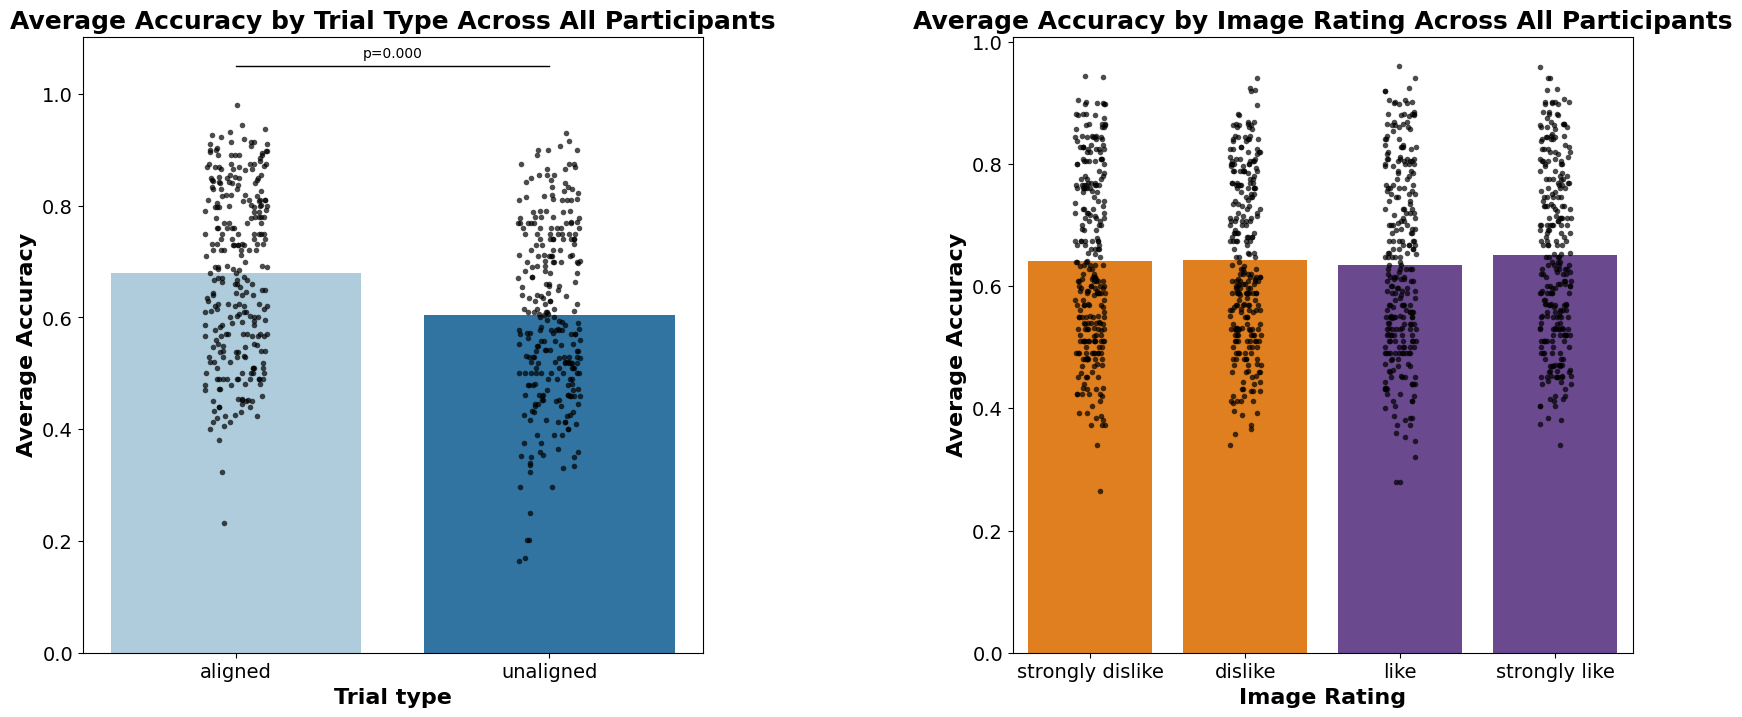

In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, chi2_contingency
import numpy as np

# Assuming all_participants_df is the DataFrame that contains the concatenated data for all participants
# Replace the following line with the actual definition of all_participants_df
# all_participants_df = pd.concat(all_data, ignore_index=True)

# Ensure all required columns exist
required_columns = ['Subject ID', 'Trial type', 'Correct (Theoretical)', 'Image Rating']
if not all(col in all_participants_df.columns for col in required_columns):
    raise ValueError("Required columns are missing in the data.")

# Convert 'Correct (Theoretical)' to binary (1 for True, 0 for False)
all_participants_df['Correct (Binary)'] = all_participants_df['Correct (Theoretical)'].astype(int)
all_participants_df['Correct (Theoretical)'] = all_participants_df['Correct (Theoretical)'].astype(int)  # Convert Correct (Theoretical) to integer type

# Accuracy per 'Trial type' (aligned and unaligned)
trial_type_accuracy_all = all_participants_df.groupby('Trial type')['Correct (Theoretical)'].mean()
ttest_p_value_tt_all = ttest_ind(
    all_participants_df[all_participants_df['Trial type'] == 'aligned']['Correct (Theoretical)'],
    all_participants_df[all_participants_df['Trial type'] == 'unaligned']['Correct (Theoretical)'],
    nan_policy='omit'
).pvalue

# Calculate Cohen's d for aligned vs unaligned trial types
aligned_mean = all_participants_df[all_participants_df['Trial type'] == 'aligned']['Correct (Theoretical)'].mean()
unaligned_mean = all_participants_df[all_participants_df['Trial type'] == 'unaligned']['Correct (Theoretical)'].mean()
aligned_std = all_participants_df[all_participants_df['Trial type'] == 'aligned']['Correct (Theoretical)'].std(ddof=1)
unaligned_std = all_participants_df[all_participants_df['Trial type'] == 'unaligned']['Correct (Theoretical)'].std(ddof=1)
aligned_n = all_participants_df[all_participants_df['Trial type'] == 'aligned'].shape[0]
unaligned_n = all_participants_df[all_participants_df['Trial type'] == 'unaligned'].shape[0]

pooled_std = np.sqrt(((aligned_n - 1) * aligned_std**2 + (unaligned_n - 1) * unaligned_std**2) / (aligned_n + unaligned_n - 2))
cohens_d = (aligned_mean - unaligned_mean) / pooled_std

# Accuracy as a function of 'Image Rating'
# Create a contingency table
contingency_table_all = pd.crosstab(all_participants_df['Image Rating'], all_participants_df['Correct (Binary)'])

# Perform chi-squared test
chi2_all, p_all, _, _ = chi2_contingency(contingency_table_all)

# Output results
print("\nAccuracy per 'Trial type' (aligned and unaligned) (average across participants):")
print(trial_type_accuracy_all)
print(f"t-test p-value for 'Trial type' (average across participants): {ttest_p_value_tt_all}")
print(f"Cohen's d for 'Trial type' (aligned vs. unaligned): {cohens_d:.3f}")

print("\nAccuracy as a function of 'Image Rating' (average across participants):")
print(all_participants_df.groupby('Image Rating')['Correct (Binary)'].mean())
print(f"Chi-squared p-value for 'Image Rating' (average across participants): {p_all:.15f}")
print("Data for Chi-squared test (average across participants):")
print(contingency_table_all)

# Visualization
# First, calculate the average accuracy per participant for each Trial type and Image Rating
avg_accuracy_by_trial_type = all_participants_df.groupby(['Subject ID', 'Trial type'])['Correct (Theoretical)'].mean().reset_index()
avg_accuracy_by_image_rating = all_participants_df.groupby(['Subject ID', 'Image Rating'])['Correct (Theoretical)'].mean().reset_index()

# Accuracy by Trial Type and Image Rating
fig, axs = plt.subplots(1, 2, figsize=(20, 8), gridspec_kw={'wspace': 0.5})  # Increase wspace for more spacing

# Define custom color palette
paired_palette = sns.color_palette("Paired")  # You can choose any palette
# Assign specific colors from the Paired palette
palette = {'aligned': paired_palette[0], 'unaligned': paired_palette[1],
           'strongly_dislike': paired_palette[7], 'dislike': paired_palette[7],
           'like': paired_palette[9], 'strongly_like': paired_palette[9]}

# Accuracy by Trial Type (with individual subject data points)
sns.barplot(x='Trial type', y='Correct (Theoretical)', data=all_participants_df,
            ax=axs[0], palette=palette, ci=None, order=['aligned', 'unaligned'])
sns.stripplot(x='Trial type', y='Correct (Theoretical)', data=avg_accuracy_by_trial_type,
              ax=axs[0], jitter=True, color='black', size=4, alpha=0.7)
axs[0].set_title('Average Accuracy by Trial Type Across All Participants', fontsize=18, fontweight='bold')
axs[0].set_xlabel('Trial type', fontsize=16, fontweight='bold')
axs[0].set_ylabel('Average Accuracy', fontsize=16, fontweight='bold')
axs[0].tick_params(axis='both', which='major', labelsize=14)  # Increase tick mark labels size
if ttest_p_value_tt_all < 0.05:
    height = max(all_participants_df.groupby('Trial type')['Correct (Theoretical)'].max()) + 0.05
    axs[0].plot([0, 1], [height, height], linewidth=1, color='k')
    axs[0].text(0.5, height + 0.01, f'p={ttest_p_value_tt_all:.3f}', ha='center', va='bottom')

# Accuracy by Image Rating (with individual subject data points)
sns.barplot(x='Image Rating', y='Correct (Theoretical)', data=all_participants_df,
            ax=axs[1], palette=palette, ci=None, order=['strongly_dislike', 'dislike', 'like', 'strongly_like'])
sns.stripplot(x='Image Rating', y='Correct (Theoretical)', data=avg_accuracy_by_image_rating,
              ax=axs[1], jitter=True, color='black', size=4, alpha=0.7)
axs[1].set_title('Average Accuracy by Image Rating Across All Participants', fontsize=18, fontweight='bold')
axs[1].set_xlabel('Image Rating', fontsize=16, fontweight='bold')
axs[1].set_ylabel('Average Accuracy', fontsize=16, fontweight='bold')
axs[1].set_xticklabels(['strongly dislike', 'dislike', 'like', 'strongly like'])
axs[1].tick_params(axis='both', which='major', labelsize=14)  # Increase tick mark labels size
if p_all < 0.05:
    height = max(all_participants_df.groupby('Image Rating')['Correct (Theoretical)'].max()) + 0.05
    axs[1].plot([0, 1, 2, 3], [height, height, height, height], linewidth=1, color='k')
    axs[1].text(1.5, height + 0.01, f'p={p_all:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.grid(False)
plt.show()

#Average accuracy per block as a function of image rating and trial type (separated by start group)

<IPython.core.display.Javascript object>


ANOVA results:
                          sum_sq     df           F        PR(>F)
Q("Trial type")         4.015979    1.0  132.419907  1.261565e-27
Group                   0.221232    1.0    7.294742  7.127304e-03
Q("Trial type"):Group   0.519660    1.0   17.134868  4.023993e-05
Residual               16.801496  554.0         NaN           NaN

Post hoc test results (Tukey's HSD):
             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1              group2       meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------
  C-start_Congruent C-start_Incongruent  -0.2283    0.0  -0.281 -0.1756   True
  C-start_Congruent   I-start_Congruent  -0.1009    0.0 -0.1547 -0.0472   True
  C-start_Congruent I-start_Incongruent  -0.2071    0.0 -0.2609 -0.1533   True
C-start_Incongruent   I-start_Congruent   0.1274    0.0  0.0736  0.1812   True
C-start_Incongruent I-start_Incongruent   0.0212 0.7394 -0.0325

/tmp/ipython-input-798988069.py:98: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_means = mean_combinations.groupby(['Starting_block', 'Trial type'])['Correct (Theoretical)'].mean()
/tmp/ipython-input-798988069.py:99: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_stds = mean_combinations.groupby(['Starting_block', 'Trial type'])['Correct (Theoretical)'].std()
/tmp/ipython-input-798988069.py:110: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(x='Starting_block', y='Correct (Theor

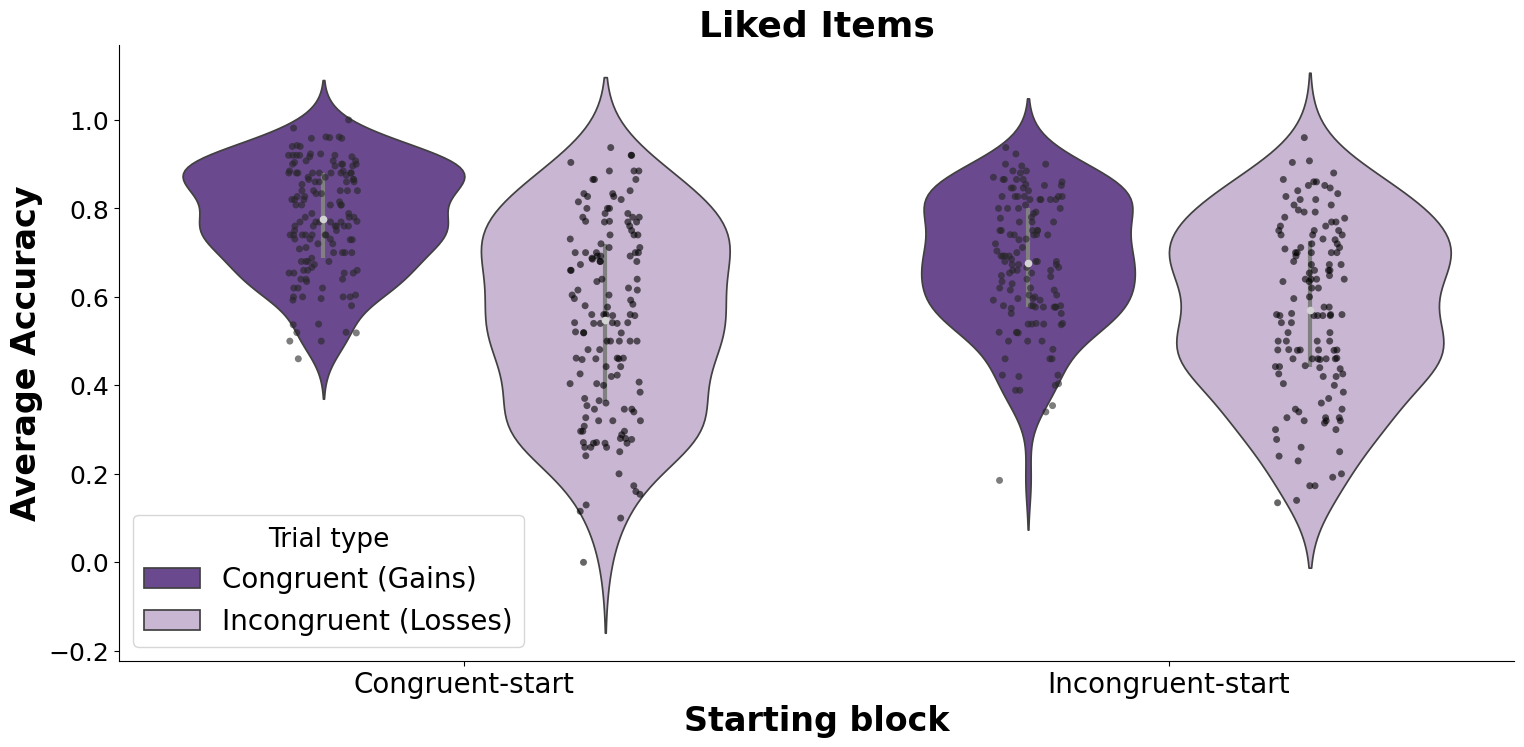


ANOVA results:
                          sum_sq     df          F        PR(>F)
Q("Trial type")         0.059463    1.0   1.978736  1.600843e-01
Group                   0.156215    1.0   5.198331  2.298776e-02
Q("Trial type"):Group   0.959778    1.0  31.938356  2.548883e-08
Residual               16.648229  554.0        NaN           NaN

Post hoc test results (Tukey's HSD):
             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1              group2       meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------
  C-start_Congruent C-start_Incongruent  -0.0591 0.0201 -0.1116 -0.0066   True
  C-start_Congruent   I-start_Congruent  -0.1165    0.0   -0.17  -0.063   True
  C-start_Congruent I-start_Incongruent  -0.0096 0.9675 -0.0631   0.044  False
C-start_Incongruent   I-start_Congruent  -0.0574   0.03 -0.1109 -0.0039   True
C-start_Incongruent I-start_Incongruent   0.0495 0.0813  -0.004   0.

/tmp/ipython-input-798988069.py:98: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_means = mean_combinations.groupby(['Starting_block', 'Trial type'])['Correct (Theoretical)'].mean()
/tmp/ipython-input-798988069.py:99: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_stds = mean_combinations.groupby(['Starting_block', 'Trial type'])['Correct (Theoretical)'].std()
/tmp/ipython-input-798988069.py:110: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(x='Starting_block', y='Correct (Theor

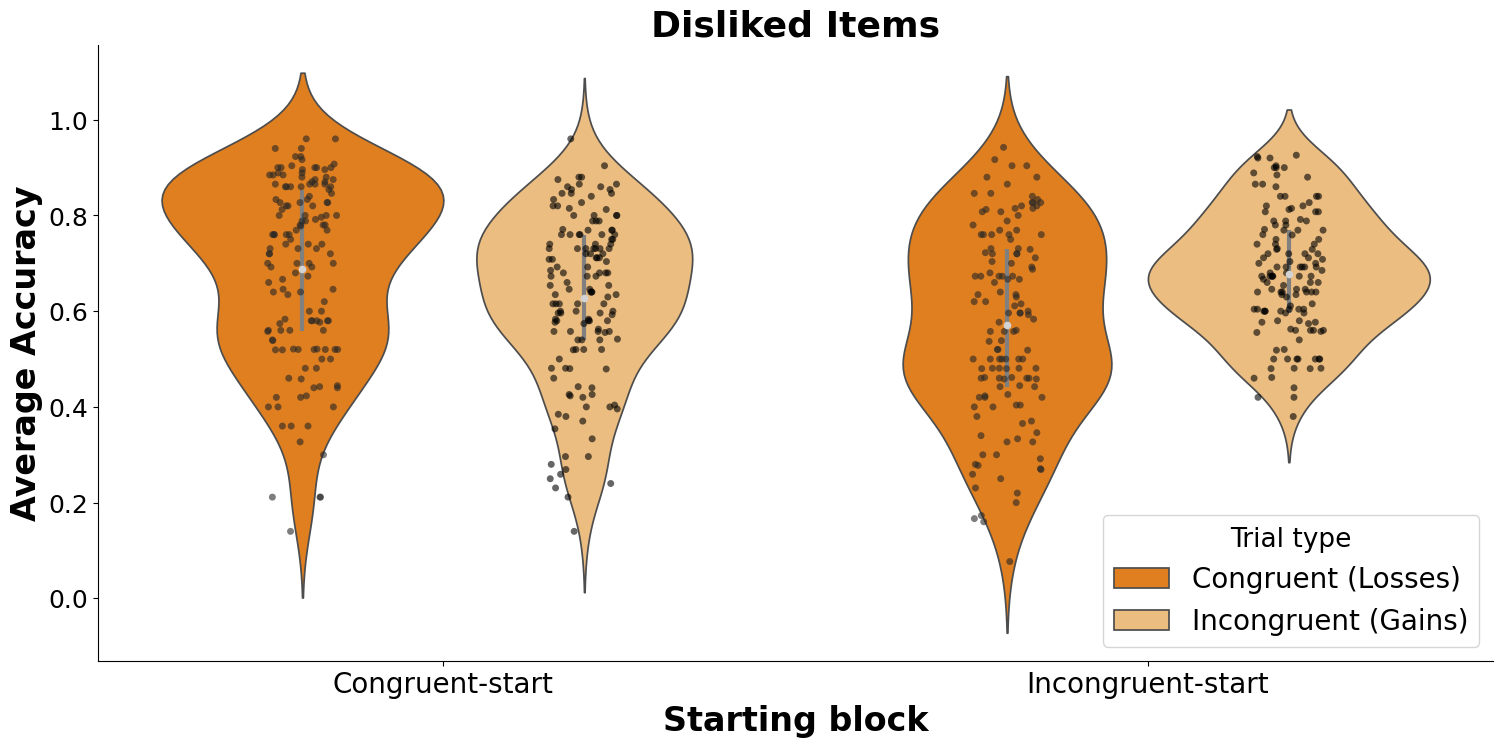

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

def analyze_and_plot_violin_anova(all_participants_df, rating_filter):
    if all_participants_df.empty:
        print("No data available for analysis.")
        return

    # Filter for food items based on 'Image Rating' column
    filtered_df = all_participants_df[all_participants_df['Image Rating'].isin(rating_filter)]

    if filtered_df.empty:
        print("No data available after filtering for specified food items.")
        return

    # Replicate the starting group split logic from Script 2
    congruent_data = []
    incongruent_data = []
    for subject_id, df in filtered_df.groupby('Subject ID'):
        first_trial_type = df['Trial type'].iloc[0]
        if first_trial_type == 'aligned':
            congruent_data.append(df)
        else:
            incongruent_data.append(df)

    if len(congruent_data) == 0 or len(incongruent_data) == 0:
        print("No data available after splitting by starting trial type.")
        return

    congruent_start_df = pd.concat(congruent_data)
    incongruent_start_df = pd.concat(incongruent_data)

    # Combine data for aligned and unaligned participants
    congruent_start_df['Group'] = 'C-start'
    incongruent_start_df['Group'] = 'I-start'
    combined_data_df = pd.concat([congruent_start_df, incongruent_start_df])

    # Calculate mean accuracy per participant for 'Trial type' and 'Group'
    mean_combinations = combined_data_df.groupby(['Subject ID', 'Trial type', 'Group'])['Correct (Theoretical)'].mean().reset_index()
    mean_combinations['Trial type'] = mean_combinations['Trial type'].replace({'aligned': 'Congruent', 'unaligned': 'Incongruent'})

    # Define the custom labels for plotting
    mean_combinations['Combined_label'] = mean_combinations.apply(lambda x: f"{x['Group']} {x['Trial type']} Trials", axis=1)

    # Conduct ANOVA
    formula = 'Q("Correct (Theoretical)") ~ Q("Trial type") * Group'
    model = ols(formula, data=mean_combinations).fit()
    anova_results = sm.stats.anova_lm(model, typ=2)

    # Output ANOVA results
    print("\nANOVA results:")
    print(anova_results)

    # Conduct Tukey's HSD post hoc test
    mean_combinations['Group_Trial'] = mean_combinations['Group'] + "_" + mean_combinations['Trial type']
    tukey_results = pairwise_tukeyhsd(endog=mean_combinations['Correct (Theoretical)'],
                                      groups=mean_combinations['Group_Trial'],
                                      alpha=0.05)

    # Output post hoc results
    print("\nPost hoc test results (Tukey's HSD):")
    print(tukey_results)

    # Define the custom color palette with specific colors from the 'Paired' palette
    paired_palette = sns.color_palette("Paired")
    if 'like' in rating_filter:
        trial_palette = {
            'Congruent': paired_palette[9],   # Dark purple
            'Incongruent': paired_palette[8]  # Light purple
        }
        title = 'Liked Items'
    else:
        trial_palette = {
            'Congruent': paired_palette[7],   # Dark orange
            'Incongruent': paired_palette[6]  # Light orange
        }
        title = 'Disliked Items'

    # Adjust labels for grouping by 'Starting block'
    mean_combinations['Starting_block'] = mean_combinations['Group']

    # Update tick label names
    tick_names = {
        'C-start': 'Congruent-start',
        'I-start': 'Incongruent-start'
    }
    mean_combinations['Starting_block'] = mean_combinations['Starting_block'].map(tick_names)

    # Sort data to ensure 'Congruent-start' is plotted first
    mean_combinations['Starting_block'] = pd.Categorical(mean_combinations['Starting_block'], categories=['Congruent-start', 'Incongruent-start'], ordered=True)

    # Calculate and print out mean accuracy for each group
    group_means = mean_combinations.groupby(['Starting_block', 'Trial type'])['Correct (Theoretical)'].mean()
    group_stds = mean_combinations.groupby(['Starting_block', 'Trial type'])['Correct (Theoretical)'].std()
    print("\nMean accuracy for each group:")
    for (starting_block, trial_type), mean_accuracy in group_means.items():
        std_dev = group_stds.loc[starting_block, trial_type]
        print(f"{starting_block}, {trial_type}: Mean Accuracy = {mean_accuracy:.4f} ± {std_dev:.4f}")

    # Create figure and plot violin plot
    plt.figure(figsize=(18, 8))
    base_positions = {'Congruent-start': 0, 'Incongruent-start': 1}
    sns.violinplot(x='Starting_block', y='Correct (Theoretical)', hue='Trial type', data=mean_combinations,
                   palette=trial_palette, split=False, inner=None, dodge=True)
    sns.stripplot(x='Starting_block', y='Correct (Theoretical)', hue='Trial type', data=mean_combinations,
                  jitter=True, color='black', alpha=0.6, dodge=True)

    # Overlay means and IQRs
    offsets = {'Congruent': -0.2, 'Incongruent': 0.2}  # Adjusting offsets for better alignment
    for starting_block in mean_combinations['Starting_block'].unique():
        for trial_type in mean_combinations['Trial type'].unique():
            subset = mean_combinations[(mean_combinations['Starting_block'] == starting_block) &
                                       (mean_combinations['Trial type'] == trial_type)]
            base_position = base_positions[starting_block]
            xpos = base_position + offsets[trial_type]

            mean_val = subset['Correct (Theoretical)'].mean()
            q25, q75 = subset['Correct (Theoretical)'].quantile([0.25, 0.75])

            # Plotting mean and IQR
            plt.scatter(x=[xpos], y=[mean_val], color='lightgray', s=20, zorder=3)
            plt.plot([xpos, xpos], [q25, q75], color='gray', lw=3, solid_capstyle='butt', zorder=2)

    plt.xlabel('Starting block', fontsize=24, fontweight='bold')
    plt.ylabel('Average Accuracy', fontsize=24, fontweight='bold')
    plt.title(title, fontsize=26, fontweight='bold')
    plt.xticks([0, 1], ['Congruent-start', 'Incongruent-start'], fontsize=20)
    plt.yticks(fontsize=18)

    # Handle legend properly
    handles, labels = plt.gca().get_legend_handles_labels()
    unique_labels = dict(zip(labels, handles))

    # Update the legend to have the desired labels
    if 'like' in rating_filter:
        correct_labels = ['Congruent (Gains)', 'Incongruent (Losses)']
    else:
        correct_labels = ['Congruent (Losses)', 'Incongruent (Gains)']
    plt.legend(handles[:2], correct_labels, title='Trial type', fontsize=20, title_fontsize='19')

    sns.despine()
    plt.show()

# Example usage with dataframes
analyze_and_plot_violin_anova(all_participants_df, ['like', 'strongly_like'])
analyze_and_plot_violin_anova(all_participants_df, ['dislike', 'strongly_dislike'])

# Accuracy time course as a function of image rating (separated by start group)


<IPython.core.display.Javascript object>

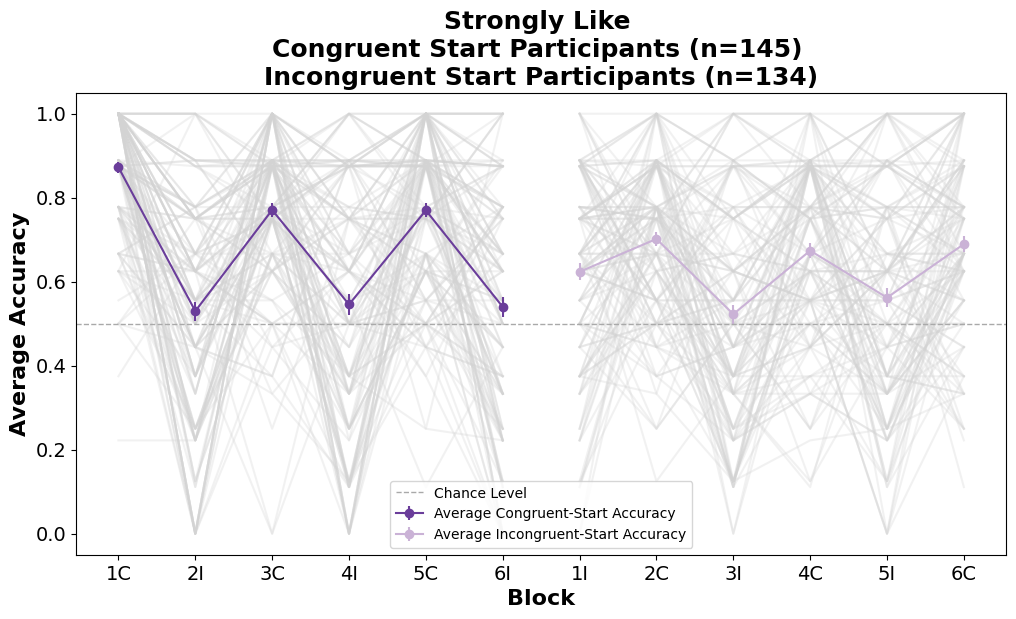


Significant blocks for congruent start participants (accuracy significantly above 0.5) for strongly_like:
Block 1C: Wilcoxon statistic = 9974.000, p-value = 0.000000
Block 3C: Wilcoxon statistic = 9187.000, p-value = 0.000000
Block 5C: Wilcoxon statistic = 8768.000, p-value = 0.000000

Significant blocks for incongruent start participants (accuracy significantly above 0.5) for strongly_like:
Block 1I: Wilcoxon statistic = 5957.500, p-value = 0.000000
Block 2C: Wilcoxon statistic = 7123.500, p-value = 0.000000
Block 4C: Wilcoxon statistic = 7066.000, p-value = 0.000000
Block 5I: Wilcoxon statistic = 4945.500, p-value = 0.006401
Block 6C: Wilcoxon statistic = 7312.500, p-value = 0.000000

ANOVA table for rating strongly_like:

                                sum_sq     df           F        PR(>F)
C(Start_Type)                 0.245580    1.0    6.960958  8.565008e-03
C(Trial_Type)                 5.337455    1.0  151.290062  6.543154e-31
C(Start_Type):C(Trial_Type)   0.756076    1.0   

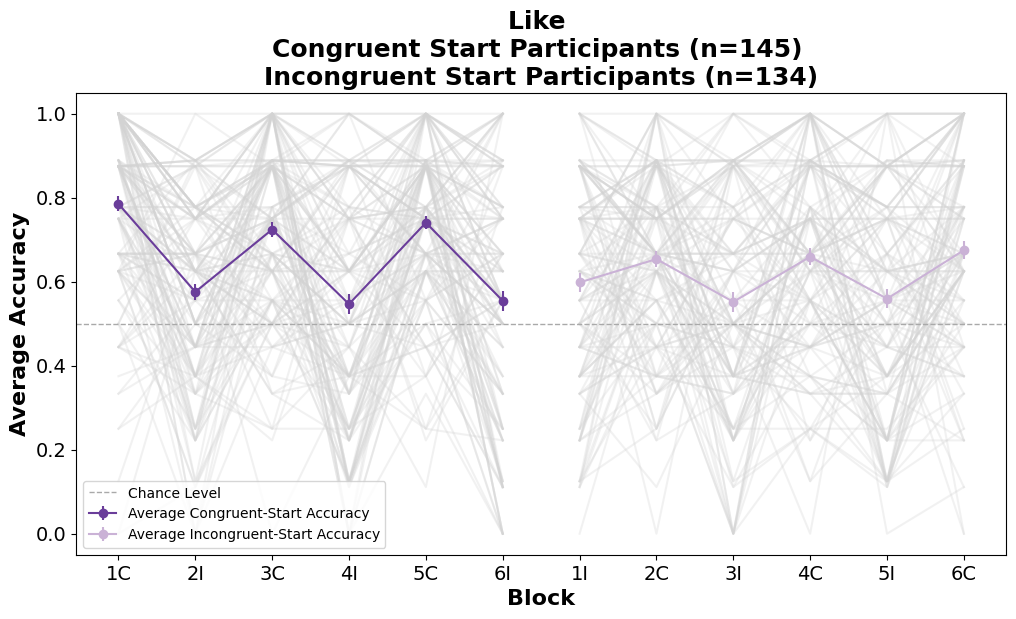


Significant blocks for congruent start participants (accuracy significantly above 0.5) for like:
Block 1C: Wilcoxon statistic = 9496.000, p-value = 0.000000
Block 2I: Wilcoxon statistic = 6467.500, p-value = 0.000089
Block 3C: Wilcoxon statistic = 8293.000, p-value = 0.000000
Block 4I: Wilcoxon statistic = 5456.000, p-value = 0.028263
Block 5C: Wilcoxon statistic = 9596.500, p-value = 0.000000
Block 6I: Wilcoxon statistic = 5466.500, p-value = 0.026900

Significant blocks for incongruent start participants (accuracy significantly above 0.5) for like:
Block 1I: Wilcoxon statistic = 5655.500, p-value = 0.000027
Block 2C: Wilcoxon statistic = 6843.000, p-value = 0.000000
Block 3I: Wilcoxon statistic = 4408.500, p-value = 0.012944
Block 4C: Wilcoxon statistic = 6847.500, p-value = 0.000000
Block 5I: Wilcoxon statistic = 4869.000, p-value = 0.010695
Block 6C: Wilcoxon statistic = 6676.500, p-value = 0.000000

ANOVA table for rating like:

                                sum_sq     df      

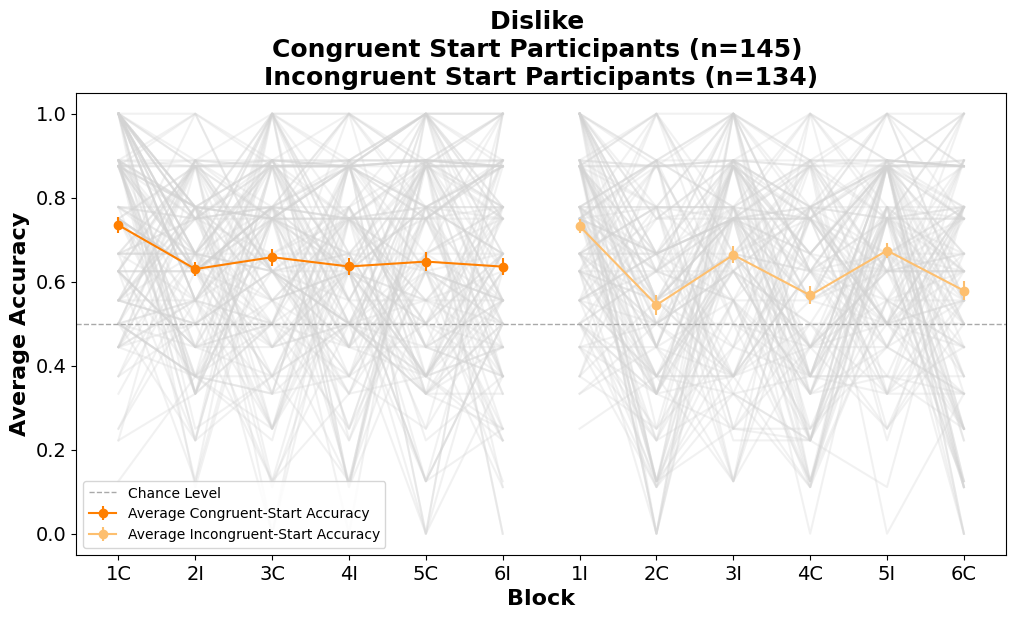


Significant blocks for congruent start participants (accuracy significantly above 0.5) for dislike:
Block 1C: Wilcoxon statistic = 8373.500, p-value = 0.000000
Block 2I: Wilcoxon statistic = 7756.000, p-value = 0.000000
Block 3C: Wilcoxon statistic = 7512.500, p-value = 0.000000
Block 4I: Wilcoxon statistic = 6713.500, p-value = 0.000000
Block 5C: Wilcoxon statistic = 7517.000, p-value = 0.000000
Block 6I: Wilcoxon statistic = 7179.500, p-value = 0.000000

Significant blocks for incongruent start participants (accuracy significantly above 0.5) for dislike:
Block 1I: Wilcoxon statistic = 7579.500, p-value = 0.000000
Block 2C: Wilcoxon statistic = 4674.000, p-value = 0.034531
Block 3I: Wilcoxon statistic = 7120.500, p-value = 0.000000
Block 4C: Wilcoxon statistic = 5480.500, p-value = 0.002196
Block 5I: Wilcoxon statistic = 6486.000, p-value = 0.000000
Block 6C: Wilcoxon statistic = 5378.500, p-value = 0.000766

ANOVA table for rating dislike:

                                sum_sq    

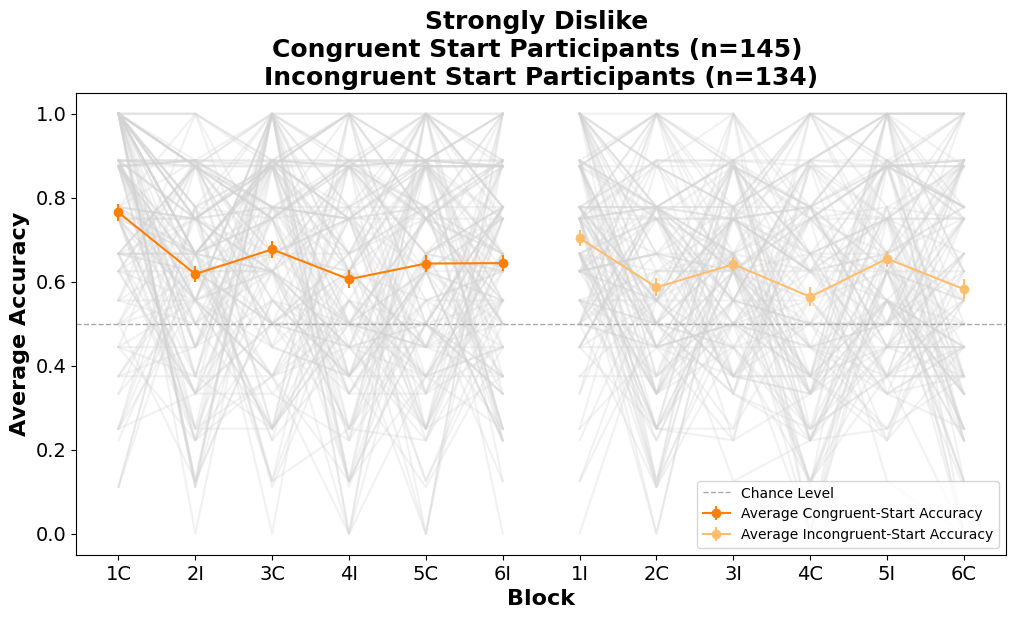


Significant blocks for congruent start participants (accuracy significantly above 0.5) for strongly_dislike:
Block 1C: Wilcoxon statistic = 9140.500, p-value = 0.000000
Block 2I: Wilcoxon statistic = 7423.500, p-value = 0.000000
Block 3C: Wilcoxon statistic = 7681.000, p-value = 0.000000
Block 4I: Wilcoxon statistic = 6292.000, p-value = 0.000003
Block 5C: Wilcoxon statistic = 7089.500, p-value = 0.000000
Block 6I: Wilcoxon statistic = 7619.500, p-value = 0.000000

Significant blocks for incongruent start participants (accuracy significantly above 0.5) for strongly_dislike:
Block 1I: Wilcoxon statistic = 7078.000, p-value = 0.000000
Block 2C: Wilcoxon statistic = 5297.500, p-value = 0.000086
Block 3I: Wilcoxon statistic = 6342.000, p-value = 0.000000
Block 4C: Wilcoxon statistic = 5085.000, p-value = 0.004075
Block 5I: Wilcoxon statistic = 6577.000, p-value = 0.000000
Block 6C: Wilcoxon statistic = 5503.500, p-value = 0.000524

ANOVA table for rating strongly_dislike:

               

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import wilcoxon
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Define the color palette from the 'Paired' color palette
paired_palette = sns.color_palette("Paired")
purple_palette = [paired_palette[8], paired_palette[9]]  # lighter and darker purple colors respectively
orange_palette = [paired_palette[6], paired_palette[7]]  # lighter and darker orange colors respectively

# Mapping colors to ratings
rating_to_colors = {
    'strongly_like': {'congruent': purple_palette[1], 'incongruent': purple_palette[0]},
    'like': {'congruent': purple_palette[1], 'incongruent': purple_palette[0]},
    'dislike': {'congruent': orange_palette[1], 'incongruent': orange_palette[0]},
    'strongly_dislike': {'congruent': orange_palette[1], 'incongruent': orange_palette[0]}
}

def plot_accuracy_by_block(df, rating):
    # Initialize empty lists to store aggregated data
    all_block_counts = []
    all_block_accuracy = []
    congruent_start_count = 0
    incongruent_start_count = 0

    # Filter dataframe by the specific image rating
    filtered_df = df[df['Image Rating'] == rating]

    # Iterate over each participant's data in the combined DataFrame
    for subject_id, df_part in filtered_df.groupby('Subject ID'):
        # Define blocks based on switches in 'Trial type'
        df_part['Block Number'] = (df_part['Trial type'] != df_part['Trial type'].shift(1)).cumsum()
        df_part['Block'] = df_part['Block Number'].astype(str) + df_part['Trial type'].apply(lambda x: 'C' if x == 'aligned' else 'I')

        # Count how many participants started with congruent vs incongruent
        first_trial_type = df_part['Trial type'].iloc[0]
        if first_trial_type == 'aligned':
            congruent_start_count += 1
        else:
            incongruent_start_count += 1

        # Accuracy in each 'Block'
        block_accuracy = df_part.groupby('Block')['Correct (Theoretical)'].mean()

        # Append data to lists
        all_block_accuracy.append(block_accuracy)

    # Plotting across participants

    # Separate data for 'Congruent' and 'Incongruent' starts
    congruent_data = [block_accuracy for block_accuracy in all_block_accuracy if 'C' in block_accuracy.index[0]]
    incongruent_data = [block_accuracy for block_accuracy in all_block_accuracy if 'I' in block_accuracy.index[0]]

    plt.figure(figsize=(12, 6))

    # Determine colors based on rating
    congruent_color = rating_to_colors[rating]['congruent']
    incongruent_color = rating_to_colors[rating]['incongruent']

    # Plot for Congruent starts if there is any data
    if congruent_data:
        for block_accuracy in congruent_data:
            plt.plot(block_accuracy.index, block_accuracy, color='LightGrey', alpha=0.3)  # Faint grey lines for individual accuracies

        congruent_data_df = pd.concat(congruent_data, axis=1)
        avg_congruent_accuracy = congruent_data_df.mean(axis=1)
        sem_congruent_accuracy = congruent_data_df.sem(axis=1)  # Standard Error of the Mean (SEM)

        plt.errorbar(avg_congruent_accuracy.index, avg_congruent_accuracy, yerr=sem_congruent_accuracy, fmt='o-', color=congruent_color, label='Average Congruent-Start Accuracy')

    # Plot for Incongruent starts if there is any data
    if incongruent_data:
        for block_accuracy in incongruent_data:
            plt.plot(block_accuracy.index, block_accuracy, color='LightGrey', alpha=0.3)  # Faint grey lines for individual accuracies

        incongruent_data_df = pd.concat(incongruent_data, axis=1)
        avg_incongruent_accuracy = incongruent_data_df.mean(axis=1)
        sem_incongruent_accuracy = incongruent_data_df.sem(axis=1)  # Standard Error of the Mean (SEM)

        plt.errorbar(avg_incongruent_accuracy.index, avg_incongruent_accuracy, yerr=sem_incongruent_accuracy, fmt='o-', color=incongruent_color, label='Average Incongruent-Start Accuracy')

    # Adding the dotted dark grey line at 0.5 for chance level
    plt.axhline(y=0.5, color='darkgrey', linestyle='--', linewidth=1, label='Chance Level')

    # Only show plot if there is data
    if congruent_data or incongruent_data:
        plt.xlabel('Block', fontsize=16, fontweight='bold')
        plt.ylabel('Average Accuracy', fontsize=16, fontweight='bold')
        plt.xticks(fontsize=14)  # Increase the font size of x-axis tick marks
        plt.yticks(fontsize=14)  # Increase the font size of y-axis tick marks
        plt.title(f'{rating.replace("_", " ").title()} \nCongruent Start Participants (n={congruent_start_count}) \nIncongruent Start Participants (n={incongruent_start_count})', fontsize=18, fontweight='bold')
        plt.legend()
        plt.grid(False)
        plt.show()
    else:
        print(f"No data available for congruent or incongruent starts for {rating}.")

    # Initialize lists to store results
    significant_blocks_congruent = []
    significant_blocks_incongruent = []

    # Wilcoxon signed-rank test for congruent data
    if congruent_data:
        for block in avg_congruent_accuracy.index:
            block_values = [block_acc.loc[block] for block_acc in congruent_data if block in block_acc.index]
            if len(block_values) > 0:
                w_stat, p_value = wilcoxon(np.array(block_values) - 0.5, alternative='greater')
                if p_value < 0.05:
                    significant_blocks_congruent.append((block, w_stat, p_value))

    # Wilcoxon signed-rank test for incongruent data
    if incongruent_data:
        for block in avg_incongruent_accuracy.index:
            block_values = [block_acc.loc[block] for block_acc in incongruent_data if block in block_acc.index]
            if len(block_values) > 0:
                w_stat, p_value = wilcoxon(np.array(block_values) - 0.5, alternative='greater')
                if p_value < 0.05:
                    significant_blocks_incongruent.append((block, w_stat, p_value))

    # Print out the results
    print(f"\nSignificant blocks for congruent start participants (accuracy significantly above 0.5) for {rating}:")
    for block, w_stat, p_value in significant_blocks_congruent:
        print(f"Block {block}: Wilcoxon statistic = {w_stat:.3f}, p-value = {p_value:.6f}")

    print(f"\nSignificant blocks for incongruent start participants (accuracy significantly above 0.5) for {rating}:")
    for block, w_stat, p_value in significant_blocks_incongruent:
        print(f"Block {block}: Wilcoxon statistic = {w_stat:.3f}, p-value = {p_value:.6f}")

    # Preparing data for 2x2 ANOVA
    anova_data = {
        'Start_Type': [],
        'Trial_Type': [],
        'Accuracy': []
    }

    for subject_id, df_part in filtered_df.groupby('Subject ID'):
        first_trial_type = df_part['Trial type'].iloc[0]
        start_type = 'Congruent' if first_trial_type == 'aligned' else 'Incongruent'
        for trial_type, sub_df in df_part.groupby('Trial type'):
            average_accuracy = sub_df['Correct (Theoretical)'].mean()
            trial_label = 'Congruent_Trial_Type' if trial_type == 'aligned' else 'Incongruent_Trial_Type'
            anova_data['Start_Type'].append(start_type)
            anova_data['Trial_Type'].append(trial_label)
            anova_data['Accuracy'].append(average_accuracy)

    anova_df = pd.DataFrame(anova_data)

    # 2x2 ANOVA for each rating
    model = ols('Accuracy ~ C(Start_Type) * C(Trial_Type)', data=anova_df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)

    print(f"\nANOVA table for rating {rating}:\n")
    print(anova_table)

# Define the image ratings
image_ratings = ['strongly_like', 'like', 'dislike', 'strongly_dislike']

# Iterate over each rating and generate the plots and ANOVAs
for rating in image_ratings:
    plot_accuracy_by_block(all_participants_df, rating)

In [ ]:
## 3 way ANOVA with 4 image rating categories

import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Assuming all_participants_df is defined and contains the data.

# Add a column representing the starting trial type
def add_starting_trial_type(df):
    df['Starting_Trial'] = df.groupby('Subject ID')['Trial type'].transform(lambda x: 'Aligned' if x.iloc[0] == 'aligned' else 'Unaligned')
    return df

# Apply the function to add the starting trial type
all_participants_df = add_starting_trial_type(all_participants_df)

# Rename columns for clarity and ease of use in ANOVA
anova_data = all_participants_df.copy()
anova_data.rename(columns={
    'Image Rating': 'Image_Rating',
    'Trial type': 'Trial_Type',
    'Correct (Theoretical)': 'Correct_Theoretical'
}, inplace=True)

# Convert Correct_Theoretical to numeric (1 for True, 0 for False)
anova_data['Correct_Theoretical'] = anova_data['Correct_Theoretical'].astype(int)

# Print the number of participants for verification
num_participants = anova_data['Subject ID'].nunique()
print(f"Number of participants: {num_participants}")

# Print total number of trials for verification
total_trials = len(anova_data)
print(f"Total number of trials: {total_trials}")

# Prepare data for ANOVA
anova_data_dict = {
    'Start_Type': [],
    'Trial_Type': [],
    'Image_Rating': [],
    'Accuracy': [],
    'Subject_ID': []  # Keep track of subject ID for better understanding of the data
}

for subject_id, df in all_participants_df.groupby('Subject ID'):
    first_trial_type = df['Trial type'].iloc[0]
    start_type = 'Aligned' if first_trial_type == 'aligned' else 'Unaligned'
    for (trial_type, image_rating), sub_df in df.groupby(['Trial type', 'Image Rating']):
        average_accuracy = sub_df['Correct (Theoretical)'].mean()
        trial_label = 'Aligned_Trial_Type' if trial_type == 'aligned' else 'Unaligned_Trial_Type'
        anova_data_dict['Start_Type'].append(start_type)
        anova_data_dict['Trial_Type'].append(trial_label)
        anova_data_dict['Image_Rating'].append(image_rating)
        anova_data_dict['Accuracy'].append(average_accuracy)
        anova_data_dict['Subject_ID'].append(subject_id)

anova_df = pd.DataFrame(anova_data_dict)

# Print aggregated data count for verification
print(f"Number of rows in aggregated data: {len(anova_df)}")

# 3-way ANOVA
model = ols('Accuracy ~ C(Start_Type) * C(Trial_Type) * C(Image_Rating)', data=anova_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("3-Way ANOVA Table:")
print(anova_table)

# Extract degrees of freedom, F-statistic, and p-value for each term
for term, row in anova_table.iterrows():
    df1 = int(row['df'])
    df2 = int(anova_table['df'][term] + anova_table['df']['Residual'])
    F = row['F']
    p = row['PR(>F)']
    print(f"Term: {term}, F({df1}, {df2}) = {F:.2f}, p = {'< .001' if p < .001 else f'{p:.3f}'}")

# Tukey's HSD post hoc analysis for significant main effects and interactions
mc = pairwise_tukeyhsd(anova_df['Accuracy'],
                       anova_df['Start_Type'] + "_" + anova_df['Trial_Type'] + "_" + anova_df['Image_Rating'],
                       alpha=0.05)

print("\nTukey's HSD post hoc test results:")
print(mc)

<IPython.core.display.Javascript object>

Number of participants: 279
Total number of trials: 56808
Number of rows in aggregated data: 2232
3-Way ANOVA Table:
                                                sum_sq      df          F  \
C(Start_Type)                                 0.749252     1.0  21.124054   
C(Trial_Type)                                 3.098095     1.0  87.346234   
C(Image_Rating)                               0.068713     3.0   0.645757   
C(Start_Type):C(Trial_Type)                   2.891894     1.0  81.532686   
C(Start_Type):C(Image_Rating)                 0.010332     3.0   0.097096   
C(Trial_Type):C(Image_Rating)                 5.310036     3.0  49.902887   
C(Start_Type):C(Trial_Type):C(Image_Rating)   0.113717     3.0   1.068699   
Residual                                     78.599596  2216.0        NaN   

                                                   PR(>F)  
C(Start_Type)                                4.546878e-06  
C(Trial_Type)                                2.148319e-20  
C(Image_R

<IPython.core.display.Javascript object>

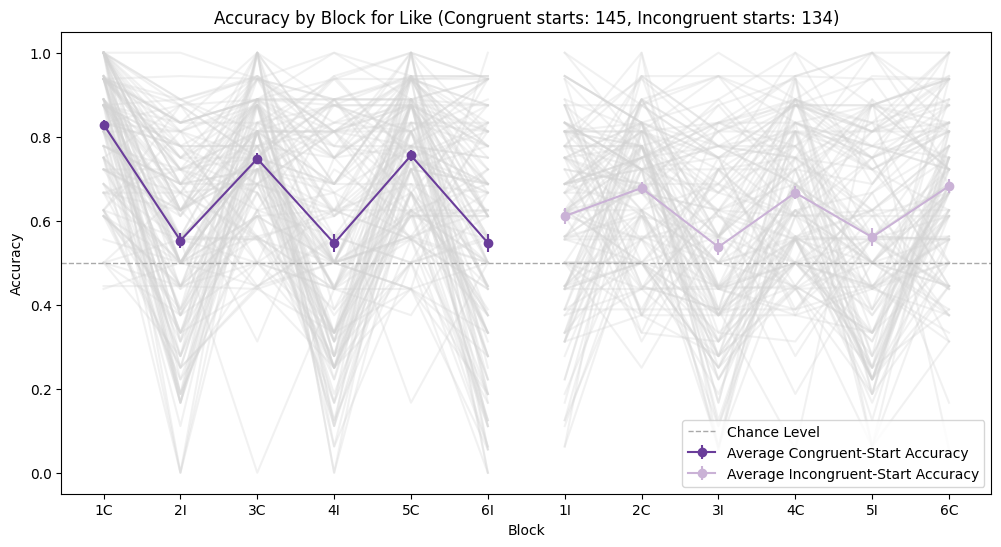


Significant blocks for congruent start participants (accuracy significantly above 0.5) for Like:
Block 1C: Wilcoxon statistic = 9865.500, p-value = 0.000000
Block 2I: Wilcoxon statistic = 5475.500, p-value = 0.002309
Block 3C: Wilcoxon statistic = 9367.000, p-value = 0.000000
Block 4I: Wilcoxon statistic = 5143.500, p-value = 0.012640
Block 5C: Wilcoxon statistic = 9542.500, p-value = 0.000000
Block 6I: Wilcoxon statistic = 5423.500, p-value = 0.022644

Significant blocks for incongruent start participants (accuracy significantly above 0.5) for Like:
Block 1I: Wilcoxon statistic = 6198.500, p-value = 0.000000
Block 2C: Wilcoxon statistic = 7031.000, p-value = 0.000000
Block 3I: Wilcoxon statistic = 4969.000, p-value = 0.022643
Block 4C: Wilcoxon statistic = 6817.500, p-value = 0.000000
Block 5I: Wilcoxon statistic = 4929.000, p-value = 0.002409
Block 6C: Wilcoxon statistic = 7422.000, p-value = 0.000000

ANOVA table for rating group Like:

                                sum_sq     df

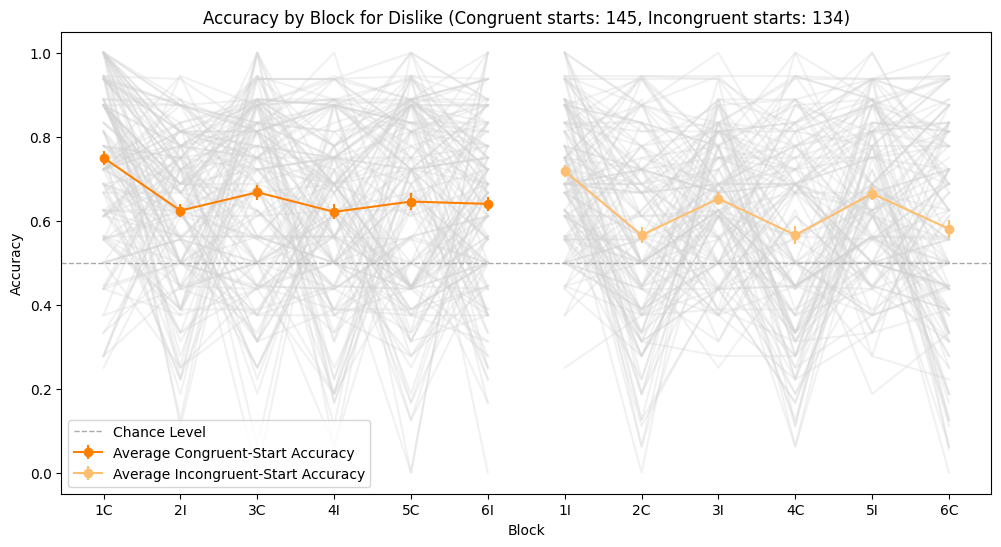


Significant blocks for congruent start participants (accuracy significantly above 0.5) for Dislike:
Block 1C: Wilcoxon statistic = 9422.000, p-value = 0.000000
Block 2I: Wilcoxon statistic = 7306.500, p-value = 0.000000
Block 3C: Wilcoxon statistic = 7758.500, p-value = 0.000000
Block 4I: Wilcoxon statistic = 7003.000, p-value = 0.000000
Block 5C: Wilcoxon statistic = 7828.500, p-value = 0.000000
Block 6I: Wilcoxon statistic = 7230.000, p-value = 0.000000

Significant blocks for incongruent start participants (accuracy significantly above 0.5) for Dislike:
Block 1I: Wilcoxon statistic = 7579.500, p-value = 0.000000
Block 2C: Wilcoxon statistic = 4889.500, p-value = 0.000482
Block 3I: Wilcoxon statistic = 6841.500, p-value = 0.000000
Block 4C: Wilcoxon statistic = 5076.000, p-value = 0.000710
Block 5I: Wilcoxon statistic = 6570.000, p-value = 0.000000
Block 6C: Wilcoxon statistic = 5271.000, p-value = 0.000116

ANOVA table for rating group Dislike:

                                sum_

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import wilcoxon
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming all_participants_df is already created with the combined data

# Define the custom color palette with specific purple colors from the 'Paired' palette
paired_palette = sns.color_palette("Paired")
purple_palette = [paired_palette[8], paired_palette[9]]  # lighter and darker purple colors respectively
palette = {
    'C-start': purple_palette[1],
    'I-start': purple_palette[0]
}

# Define the custom color palette with specific orange colors from the 'Paired' palette
trial_palette = {
    'Congruent start': paired_palette[7],  # Dark orange
    'Incongruent start': paired_palette[6]  # Light orange
}

def plot_accuracy_by_block(df, rating_group, group_label):
    # Initialize empty lists to store aggregated data
    all_block_counts = []
    all_block_accuracy = []
    congruent_start_count = 0
    incongruent_start_count = 0

    # Filter dataframe by the specific image rating group
    df = df[df['Image Rating'].isin(rating_group)]

    # Iterate over each participant's data in the combined DataFrame
    for subject_id, df_part in df.groupby('Subject ID'):
        # Define blocks based on switches in 'Trial type'
        df_part['Block Number'] = (df_part['Trial type'] != df_part['Trial type'].shift(1)).cumsum()
        df_part['Block'] = df_part['Block Number'].astype(str) + df_part['Trial type'].apply(lambda x: 'C' if x == 'aligned' else 'I')

        # Count how many participants started with congruent vs incongruent
        first_trial_type = df_part['Trial type'].iloc[0]
        if first_trial_type == 'aligned':
            congruent_start_count += 1
        else:
            incongruent_start_count += 1

        # Accuracy in each 'Block'
        block_accuracy = df_part.groupby('Block')['Correct (Theoretical)'].mean()

        # Append data to lists
        all_block_accuracy.append(block_accuracy)

    # Plotting across participants

    # Separate data for 'Congruent' and 'Incongruent' starts
    congruent_data = [block_accuracy for block_accuracy in all_block_accuracy if 'C' in block_accuracy.index[0]]
    incongruent_data = [block_accuracy for block_accuracy in all_block_accuracy if 'I' in block_accuracy.index[0]]

    plt.figure(figsize=(12, 6))

    # Determine colors based on rating group
    if group_label == 'Like':
        congruent_color = palette['C-start']
        incongruent_color = palette['I-start']
    else:
        congruent_color = trial_palette['Congruent start']
        incongruent_color = trial_palette['Incongruent start']

    # Plot for Congruent starts if there is any data
    if congruent_data:
        for block_accuracy in congruent_data:
            plt.plot(block_accuracy.index, block_accuracy, color='LightGrey', alpha=0.3)  # Faint grey lines for individual accuracies

        congruent_data_df = pd.concat(congruent_data, axis=1)
        avg_congruent_accuracy = congruent_data_df.mean(axis=1)
        sem_congruent_accuracy = congruent_data_df.sem(axis=1)  # Standard Error of the Mean (SEM)

        plt.errorbar(avg_congruent_accuracy.index, avg_congruent_accuracy, yerr=sem_congruent_accuracy, fmt='o-', color=congruent_color, label='Average Congruent-Start Accuracy')

    # Plot for Incongruent starts if there is any data
    if incongruent_data:
        for block_accuracy in incongruent_data:
            plt.plot(block_accuracy.index, block_accuracy, color='LightGrey', alpha=0.3)  # Faint grey lines for individual accuracies

        incongruent_data_df = pd.concat(incongruent_data, axis=1)
        avg_incongruent_accuracy = incongruent_data_df.mean(axis=1)
        sem_incongruent_accuracy = incongruent_data_df.sem(axis=1)  # Standard Error of the Mean (SEM)

        plt.errorbar(avg_incongruent_accuracy.index, avg_incongruent_accuracy, yerr=sem_incongruent_accuracy, fmt='o-', color=incongruent_color, label='Average Incongruent-Start Accuracy')

    # Adding the dotted dark grey line at 0.5 for chance level
    plt.axhline(y=0.5, color='darkgrey', linestyle='--', linewidth=1, label='Chance Level')

    # Only show plot if there is data
    if congruent_data or incongruent_data:
        plt.xlabel('Block')
        plt.ylabel('Accuracy')
        plt.title(f'Accuracy by Block for {group_label} (Congruent starts: {congruent_start_count}, Incongruent starts: {incongruent_start_count})')
        plt.legend()
        plt.grid(False)
        plt.show()
    else:
        print(f"No data available for congruent or incongruent starts for {group_label}.")

    # Initialize lists to store results
    significant_blocks_congruent = []
    significant_blocks_incongruent = []

    # Non-parametric test (Wilcoxon signed-rank test) for congruent data
    if congruent_data:
        for block in avg_congruent_accuracy.index:
            block_values = [block_acc.loc[block] for block_acc in congruent_data if block in block_acc.index]
            if len(block_values) > 0:  # Wilcoxon signed-rank requires at least one data point
                w_stat, p_value = wilcoxon(np.array(block_values) - 0.5, alternative='greater')
                if p_value < 0.05:
                    significant_blocks_congruent.append((block, w_stat, p_value))

    # Non-parametric test (Wilcoxon signed-rank test) for incongruent data
    if incongruent_data:
        for block in avg_incongruent_accuracy.index:
            block_values = [block_acc.loc[block] for block_acc in incongruent_data if block in block_acc.index]
            if len(block_values) > 0:  # Wilcoxon signed-rank requires at least one data point
                w_stat, p_value = wilcoxon(np.array(block_values) - 0.5, alternative='greater')
                if p_value < 0.05:
                    significant_blocks_incongruent.append((block, w_stat, p_value))

    # Print out the results
    print(f"\nSignificant blocks for congruent start participants (accuracy significantly above 0.5) for {group_label}:")
    for block, w_stat, p_value in significant_blocks_congruent:
        print(f"Block {block}: Wilcoxon statistic = {w_stat:.3f}, p-value = {p_value:.6f}")

    print(f"\nSignificant blocks for incongruent start participants (accuracy significantly above 0.5) for {group_label}:")
    for block, w_stat, p_value in significant_blocks_incongruent:
        print(f"Block {block}: Wilcoxon statistic = {w_stat:.3f}, p-value = {p_value:.6f}")

    # Preparing data for 2x2 ANOVA
    anova_data = {
        'Start_Type': [],
        'Trial_Type': [],
        'Accuracy': []
    }

    for subject_id, df_part in df.groupby('Subject ID'):
        first_trial_type = df_part['Trial type'].iloc[0]
        start_type = 'Congruent' if first_trial_type == 'aligned' else 'Incongruent'
        for trial_type, sub_df in df_part.groupby('Trial type'):
            average_accuracy = sub_df['Correct (Theoretical)'].mean()
            trial_label = 'Congruent_Trial_Type' if trial_type == 'aligned' else 'Incongruent_Trial_Type'
            anova_data['Start_Type'].append(start_type)
            anova_data['Trial_Type'].append(trial_label)
            anova_data['Accuracy'].append(average_accuracy)

    anova_df = pd.DataFrame(anova_data)

    # 2x2 ANOVA for each rating group
    model = ols('Accuracy ~ C(Start_Type) * C(Trial_Type)', data=anova_df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)

    print(f"\nANOVA table for rating group {group_label}:\n")
    print(anova_table)

# Define the image rating groups
liked_items = ['strongly_like', 'like']
disliked_items = ['dislike', 'strongly_dislike']

# Plot and analyze for each group
plot_accuracy_by_block(all_participants_df, liked_items, 'Like')
plot_accuracy_by_block(all_participants_df, disliked_items, 'Dislike')

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Assuming all_participants_df is defined and contains the data.
print(f"Raw Data Shape: {all_participants_df.shape}")

# Add a column representing the starting trial type
def add_starting_trial_type(df):
    df['Starting_Trial'] = df.groupby('Subject ID')['Trial type'].transform(lambda x: 'Aligned' if x.iloc[0] == 'aligned' else 'Unaligned')
    return df

# Apply the function to add the starting trial type
all_participants_df = add_starting_trial_type(all_participants_df)

# Rename columns for clarity and ease of use in ANOVA
anova_data = all_participants_df.copy()
anova_data.rename(columns={
    'Image Rating': 'Image_Rating',
    'Trial type': 'Trial_Type',
    'Correct (Theoretical)': 'Correct_Theoretical'
}, inplace=True)

# Collapse image ratings into two categories: 'Liked' and 'Disliked'
def collapse_ratings(rating):
    if rating in ['strongly like', 'like']:
        return 'Liked'
    else:
        return 'Disliked'

anova_data['Image_Rating'] = anova_data['Image_Rating'].apply(collapse_ratings)

# Convert Correct_Theoretical to numeric
anova_data['Correct_Theoretical'] = anova_data['Correct_Theoretical'].astype(int)

# Print number of participants and total trials
num_participants = anova_data['Subject ID'].nunique()
print(f"Number of participants: {num_participants}")
total_trials = len(anova_data)
print(f"Total number of trials: {total_trials}")

# Prepare data for ANOVA
anova_data_dict = {
    'Start_Type': [],
    'Trial_Type': [],
    'Image_Rating': [],
    'Accuracy': [],
    'Subject_ID': []
}

for subject_id, df in anova_data.groupby('Subject ID'):
    first_trial_type = df['Trial_Type'].iloc[0]
    start_type = 'Aligned' if first_trial_type == 'aligned' else 'Unaligned'
    for (trial_type, image_rating), sub_df in df.groupby(['Trial_Type', 'Image_Rating']):
        average_accuracy = sub_df['Correct_Theoretical'].mean()
        trial_label = 'Aligned_Trial_Type' if trial_type == 'aligned' else 'Unaligned_Trial_Type'
        anova_data_dict['Start_Type'].append(start_type)
        anova_data_dict['Trial_Type'].append(trial_label)
        anova_data_dict['Image_Rating'].append(image_rating)
        anova_data_dict['Accuracy'].append(average_accuracy)
        anova_data_dict['Subject_ID'].append(subject_id)

anova_df = pd.DataFrame(anova_data_dict)

# Print aggregated data count for verification
print(f"Number of rows in aggregated data: {len(anova_df)}")

# 3-way ANOVA
model = ols('Accuracy ~ C(Start_Type) * C(Trial_Type) * C(Image_Rating)', data=anova_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("3-Way ANOVA Table:")
print(anova_table)

# Extract degrees of freedom, F-statistic, and p-value
for term, row in anova_table.iterrows():
    df1 = int(row['df'])
    df2 = int(anova_table['df'][term] + anova_table['df']['Residual'])
    F = row['F']
    p = row['PR(>F)']
    print(f"Term: {term}, F({df1}, {df2}) = {F:.2f}, p = {'< .001' if p < .001 else f'{p:.3f}'}")

# Tukey's HSD post hoc analysis
mc = pairwise_tukeyhsd(anova_df['Accuracy'],
                       anova_df['Start_Type'] + "_" + anova_df['Trial_Type'] + "_" + anova_df['Image_Rating'],
                       alpha=0.05)

print("\nTukey's HSD post hoc test results:")
print(mc)

# Save the aggregated data to the specified shared folder path
datasave_folder_path = "/content/drive/My Drive/Levy Lab/Value updating project/online analysis"
save_path = os.path.join(datasave_folder_path, "aggregated_anova_data.csv")

anova_df.to_csv(save_path, index=False)
print(f"\nAggregated data saved to {save_path}")

<IPython.core.display.Javascript object>

Raw Data Shape: (56808, 13)
Number of participants: 279
Total number of trials: 56808
Number of rows in aggregated data: 1116
3-Way ANOVA Table:
                                                sum_sq      df          F  \
C(Start_Type)                                 0.381786     1.0  12.532736   
C(Trial_Type)                                 2.657018     1.0  87.220819   
C(Image_Rating)                               0.024438     1.0   0.802211   
C(Start_Type):C(Trial_Type)                   1.147894     1.0  37.681443   
C(Start_Type):C(Image_Rating)                 0.000136     1.0   0.004450   
C(Trial_Type):C(Image_Rating)                 0.594222     1.0  19.506262   
C(Start_Type):C(Trial_Type):C(Image_Rating)   0.068725     1.0   2.255998   
Residual                                     33.753135  1108.0        NaN   

                                                   PR(>F)  
C(Start_Type)                                4.164797e-04  
C(Trial_Type)                            

#Fitting sigmoid function to accuracy data for each condition

To model within-block learning dynamics, a simple sigmoid function was fitted to the prediction accuracy data for each condition (defined by unique initial block identity, block type, and food item rating combinations). Before fitting, prediction accuracy data were averaged across subjects within each experimental condition. We then fit sigmoid curves to these group-averaged means to estimate the parameters L, k, and x0:

y = L / (1 + e(−k*(x−x0))

L represents the upper asymptote or threshold
k is the growth rate
x0 is the trial number at which prediction accuracy reaches half of L

A two-sample t-test was performed to compare the learning rates between the start groups. Additionally, an ANOVA was conducted to compare the learning thresholds (L) across all conditions. Significant interactions of block type with start group and image item rating were identified and further analyzed using post hoc Tukey's HSD tests.


<IPython.core.display.Javascript object>

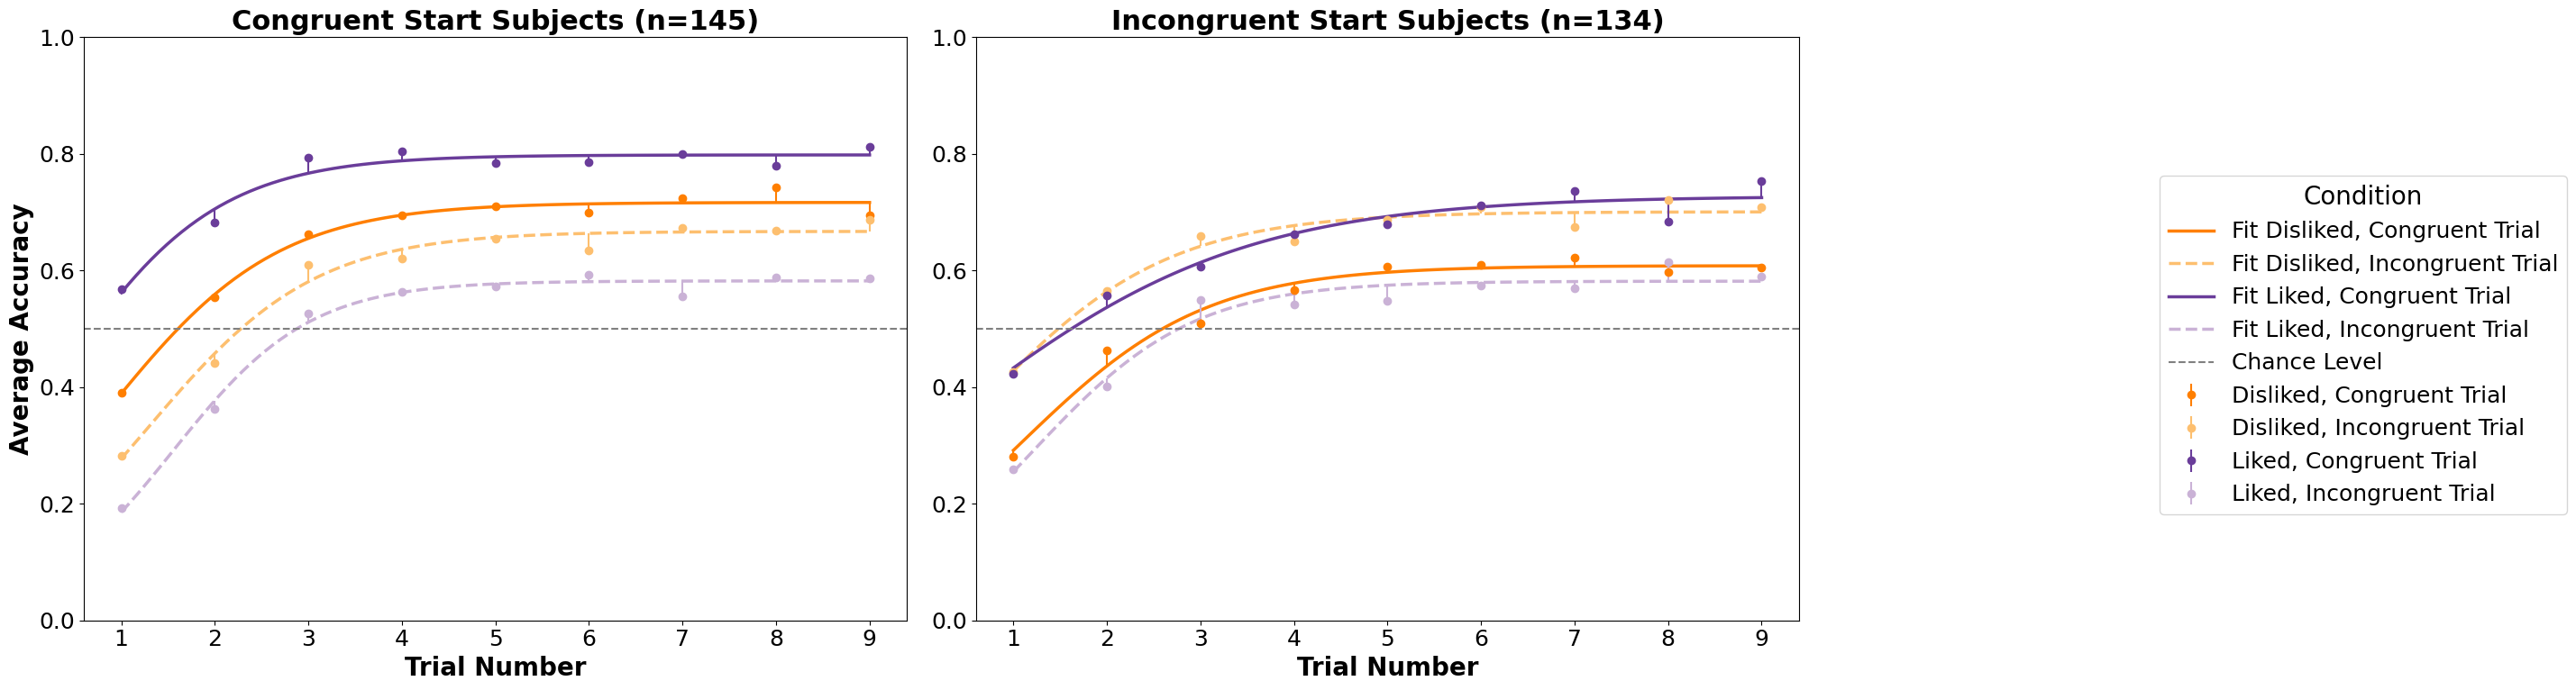

          Start Type    Rating   Trial Type         L         k        x0
0    Congruent Start  Disliked    congruent  0.716755  1.095841  0.842948
1    Congruent Start  Disliked  incongruent  0.667078  1.123017  1.301324
2    Congruent Start     Liked    congruent  0.798182  1.164893  0.255758
3    Congruent Start     Liked  incongruent  0.582167  1.367704  1.553944
4  Incongruent Start  Disliked    congruent  0.608238  1.012941  1.080609
5  Incongruent Start  Disliked  incongruent  0.700667  0.968192  0.536594
6  Incongruent Start     Liked    congruent  0.727724  0.649586  0.408051
7  Incongruent Start     Liked  incongruent  0.581707  1.165209  1.212066


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import seaborn as sns

# Define the simplified sigmoid function
def sigmoid_function(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0)))

def fix_block_numbering(df):
    participants = df['Subject ID'].unique()
    fixed_df_list = []

    for participant in participants:
        participant_df = df[df['Subject ID'] == participant].copy()
        participant_df['Block Number'] = (participant_df['Trial type'] != participant_df['Trial type'].shift(1)).cumsum()
        participant_df['Block'] = participant_df['Block Number'].astype(str) + \
                                  participant_df['Trial type'].apply(lambda x: 'C' if x == 'congruent' else 'I')
        fixed_df_list.append(participant_df)

    fixed_df = pd.concat(fixed_df_list, ignore_index=True)
    return fixed_df

# Function to analyze and compute averages for combined trials across all blocks for each collapsed rating
def analyze_combined(data_df, collapsed_rating, start_type):
    data_df = fix_block_numbering(data_df)
    data_df['Simulated Trial Number'] = data_df.groupby(['Subject ID', 'Block', 'Collapsed Rating']).cumcount() + 1
    data_df = data_df[data_df['Simulated Trial Number'] <= 9]
    overall_avg = data_df[data_df['Collapsed Rating'] == collapsed_rating].groupby(['Trial type', 'Simulated Trial Number'])['Correct (Binary)'].agg(['mean', 'sem']).reset_index()
    overall_avg['Start Type'] = start_type
    overall_avg['Collapsed Rating'] = collapsed_rating
    return overall_avg

# Example data preparation before fitting and plotting (assuming `congruent_start_df` and `incongruent_start_df` are defined)
congruent_liked = analyze_combined(congruent_start_df, 'Liked', 'Congruent Start')
congruent_disliked = analyze_combined(congruent_start_df, 'Disliked', 'Congruent Start')
incongruent_liked = analyze_combined(incongruent_start_df, 'Liked', 'Incongruent Start')
incongruent_disliked = analyze_combined(incongruent_start_df, 'Disliked', 'Incongruent Start')

# Consolidate all data
consolidated_data = pd.concat([congruent_liked, congruent_disliked, incongruent_liked, incongruent_disliked])

# Define color palettes for plotting
paired_palette = sns.color_palette("Paired")
purple_palette = [paired_palette[8], paired_palette[9]]
trial_palette = {
    'Congruent start': paired_palette[7],  # Dark orange
    'Incongruent start': paired_palette[6]  # Light orange
}

# Fit sigmoid curves and calculate residuals
fit_results = {}
residuals_dict = {}
for (start_type, rating, trial_type), data in consolidated_data.groupby(['Start Type', 'Collapsed Rating', 'Trial type']):
    initial_guesses = [0.8, 1.0, 1.0]  # L, k, x0 initial guesses
    bounds = (0, [1.0, 5.0, 10.0])  # Bounds for L, k, and x0
    popt, _ = curve_fit(sigmoid_function, data['Simulated Trial Number'], data['mean'], p0=initial_guesses, bounds=bounds, maxfev=2000)
    fit_results[(start_type, rating, trial_type)] = popt

    # Calculate residuals as the difference between fitted values and actual means
    fitted_values = sigmoid_function(data['Simulated Trial Number'], *popt)
    residuals = fitted_values - data['mean']
    residuals_dict[(start_type, rating, trial_type)] = residuals

# Plot results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 8))

styles = {
    ('Congruent Start', 'Liked', 'congruent'): {'color': purple_palette[1], 'marker': 'o', 'label': 'Liked, Congruent Trial', 'linestyle': '-', 'linewidth': 2.5},
    ('Congruent Start', 'Liked', 'incongruent'): {'color': purple_palette[0], 'marker': 'o', 'label': 'Liked, Incongruent Trial', 'linestyle': '--', 'linewidth': 2.5},
    ('Congruent Start', 'Disliked', 'congruent'): {'color': trial_palette['Congruent start'], 'marker': 'o', 'label': 'Disliked, Congruent Trial', 'linestyle': '-', 'linewidth': 2.5},
    ('Congruent Start', 'Disliked', 'incongruent'): {'color': trial_palette['Incongruent start'], 'marker': 'o', 'label': 'Disliked, Incongruent Trial', 'linestyle': '--', 'linewidth': 2.5},
    ('Incongruent Start', 'Liked', 'congruent'): {'color': purple_palette[1], 'marker': 'o', 'label': 'Liked, Congruent Trial', 'linestyle': '-', 'linewidth': 2.5},
    ('Incongruent Start', 'Liked', 'incongruent'): {'color': purple_palette[0], 'marker': 'o', 'label': 'Liked, Incongruent Trial', 'linestyle': '--', 'linewidth': 2.5},
    ('Incongruent Start', 'Disliked', 'congruent'): {'color': trial_palette['Congruent start'], 'marker': 'o', 'label': 'Disliked, Congruent Trial', 'linestyle': '-', 'linewidth': 2.5},
    ('Incongruent Start', 'Disliked', 'incongruent'): {'color': trial_palette['Incongruent start'], 'marker': 'o', 'label': 'Disliked, Incongruent Trial', 'linestyle': '--', 'linewidth': 2.5}
}

for (start_type, rating, trial_type), data in consolidated_data.groupby(['Start Type', 'Collapsed Rating', 'Trial type']):
    style = styles[(start_type, rating, trial_type)]
    ax = axes[0] if start_type == 'Congruent Start' else axes[1]

    # Plot residual error bars (one-sided: down if below fit, up if above fit)
    residual_values = residuals_dict[(start_type, rating, trial_type)]
    yerr_lower = np.where(residual_values > 0, np.abs(residual_values), 0)
    yerr_upper = np.where(residual_values < 0, np.abs(residual_values), 0)
    yerr = [yerr_upper, yerr_lower]
    ax.errorbar(data['Simulated Trial Number'], data['mean'], yerr=yerr, fmt=style['marker'], label=style['label'], color=style['color'], linestyle='None', capsize=0)

    # Plot fitted sigmoid curve
    L, k, x0 = fit_results[(start_type, rating, trial_type)]
    x_values = np.linspace(data['Simulated Trial Number'].min(), data['Simulated Trial Number'].max(), 100)
    y_values = sigmoid_function(x_values, L, k, x0)
    ax.plot(x_values, y_values, color=style['color'], linestyle=style['linestyle'], linewidth=style['linewidth'], label=f'Fit {style["label"]}')

# Annotate charts
for i, (start_type, ax) in enumerate(zip(['Congruent Start', 'Incongruent Start'], axes)):
    ax.set_ylim(0, 1)
    ax.axhline(0.5, linestyle='--', color='grey', label='Chance Level')
    n_size = n_congruent if start_type == 'Congruent Start' else n_incongruent
    ax.set_title(f'{start_type} Subjects (n={n_size})', fontweight='bold')
    ax.set_xlabel('Trial Number', fontweight='bold')
    ax.set_ylabel('Average Accuracy' if i == 0 else '', fontweight='bold')
    ax.grid(False)

# Create a single legend to the right of the plots
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5), title='Condition', title_fontsize='20', fontsize='18')

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

# Print fit results in a table format
fit_results_df = pd.DataFrame(fit_results).T.reset_index()
fit_results_df.columns = ['Start Type', 'Rating', 'Trial Type', 'L', 'k', 'x0']

print(fit_results_df)

<IPython.core.display.Javascript object>

Congruent Start average learning rate (k): 2.1933
Incongruent Start average learning rate (k): 1.8716
     Participant         Start_Type    Rating   Trial_Type         L  \
0            744    Congruent Start     Liked    congruent  1.000000   
1            751    Congruent Start     Liked    congruent  0.875699   
2            752    Congruent Start     Liked    congruent  1.000000   
3            743    Congruent Start     Liked    congruent  0.875056   
4            748    Congruent Start     Liked    congruent  1.000000   
...          ...                ...       ...          ...       ...   
1111        1225  Incongruent Start  Disliked  incongruent  0.742189   
1112        1224  Incongruent Start  Disliked  incongruent  1.000000   
1113        1240  Incongruent Start  Disliked  incongruent  0.819191   
1114        1237  Incongruent Start  Disliked  incongruent  0.788269   
1115        1229  Incongruent Start  Disliked  incongruent  1.000000   

             k            x0  
0 

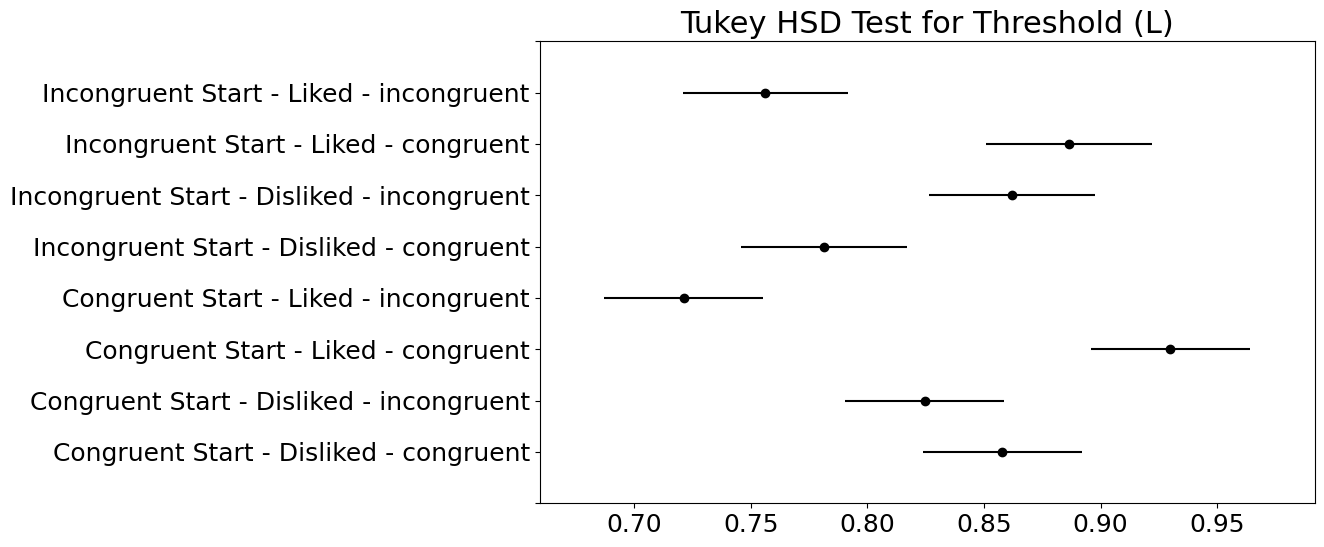

In [ ]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Define the sigmoid function
def sigmoid_function(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0)))

# Function to fit sigmoid curves for each participant within each condition
def fit_sigmoid_per_participant(df, start_condition, collapsed_rating, trial_type):
    fit_results = []
    for participant in df['Subject ID'].unique():
        participant_data = df[(df['Subject ID'] == participant) &
                              (df['Start Type'] == start_condition) &
                              (df['Collapsed Rating'] == collapsed_rating) &
                              (df['Trial type'] == trial_type)].copy()

        # Create simulated trial numbers
        participant_data['Simulated Trial Number'] = participant_data.groupby(['Subject ID', 'Block', 'Collapsed Rating']).cumcount() + 1
        participant_data = participant_data[participant_data['Simulated Trial Number'] <= 9]

        if len(participant_data) > 0:
            x_data = participant_data['Simulated Trial Number']
            y_data = participant_data['Correct (Binary)']
            try:
                popt, _ = curve_fit(sigmoid_function, x_data, y_data, bounds=(0, [1.0, 5.0, 10.0]), maxfev=2000)
                L, k, x0 = popt
                fit_results.append((participant, L, k, x0))
            except RuntimeError:
                # Handling convergence errors
                continue
    return fit_results

# Prepare and fit the data
def prepare_and_fit_data(all_participants_df):
    # Make sure to copy the DataFrame to avoid modifications to original data
    df = all_participants_df.copy()

    # Convert 'Correct (Theoretical)' to binary
    if 'Correct (Binary)' not in df.columns:
        df['Correct (Binary)'] = df['Correct (Theoretical)'].astype(int)

    # Collapse ratings into 'Liked' and 'Disliked' categories
    def collapse_ratings(rating):
        return 'Liked' if rating in ['strongly_like', 'like'] else 'Disliked'

    df['Collapsed Rating'] = df['Image Rating'].apply(collapse_ratings)

    # Rename 'aligned' and 'unaligned' to 'congruent' and 'incongruent'
    df['Trial type'] = df['Trial type'].replace({'aligned': 'congruent', 'unaligned': 'incongruent'})

    # Determine 'Start Type' for each participant
    df['Start Type'] = df.groupby('Subject ID')['Trial type'].transform(lambda x: 'Congruent Start' if x.iloc[0] == 'congruent' else 'Incongruent Start')

    # Fit sigmoid curves and collect results
    conditions = [
        ('Congruent Start', 'Liked', 'congruent'),
        ('Congruent Start', 'Liked', 'incongruent'),
        ('Congruent Start', 'Disliked', 'congruent'),
        ('Congruent Start', 'Disliked', 'incongruent'),
        ('Incongruent Start', 'Liked', 'congruent'),
        ('Incongruent Start', 'Liked', 'incongruent'),
        ('Incongruent Start', 'Disliked', 'congruent'),
        ('Incongruent Start', 'Disliked', 'incongruent')
    ]

    all_fit_results = []
    for start_condition, rating, trial_type in conditions:
        fit_results = fit_sigmoid_per_participant(df, start_condition, rating, trial_type)
        for participant, L, k, x0 in fit_results:
            all_fit_results.append({
                'Participant': participant,
                'Start Type': start_condition,
                'Rating': rating,
                'Trial Type': trial_type,
                'L': L,
                'k': k,
                'x0': x0
            })

    return pd.DataFrame(all_fit_results)

# Extract and compare learning rates
fit_results_df = prepare_and_fit_data(all_participants_df)

# Make sure column names are consistently used
fit_results_df.rename(columns={'Start Type': 'Start_Type', 'Trial Type': 'Trial_Type'}, inplace=True)

# Extract learning rates for Congruent Start and Incongruent Start
k_congruent_start = fit_results_df[fit_results_df['Start_Type'] == 'Congruent Start']['k']
k_incongruent_start = fit_results_df[fit_results_df['Start_Type'] == 'Incongruent Start']['k']

# Perform two-sample t-test
t_stat, p_val = ttest_ind(k_congruent_start, k_incongruent_start)

# Calculate and print the averages
k_congruent_mean = np.mean(k_congruent_start)
k_incongruent_mean = np.mean(k_incongruent_start)

print(f"Congruent Start average learning rate (k): {k_congruent_mean:.4f}")
print(f"Incongruent Start average learning rate (k): {k_incongruent_mean:.4f}")

# Print the DataFrame
print(fit_results_df)

# Print the t-test results formatted for APA style reporting
print(f"T-test result for learning rates (k) comparison, t({len(k_congruent_start) + len(k_incongruent_start) - 2}) = {t_stat:.2f}, p = {p_val:.3f}")

# Perform ANOVA for thresholds (L)
model_L = ols("L ~ C(Start_Type) * C(Rating) * C(Trial_Type)", data=fit_results_df).fit()
anova_table_L = sm.stats.anova_lm(model_L, typ=2)

# Perform Tukey's HSD post hoc test for thresholds (L)
tukey_L = pairwise_tukeyhsd(fit_results_df['L'], fit_results_df['Start_Type'] + " - " + fit_results_df['Rating'] + " - " + fit_results_df['Trial_Type'])

# Print ANOVA table for Thresholds (L)
print("ANOVA Table for Threshold (L):")
print(anova_table_L)

# Print Tukey's HSD post hoc test results for Threshold (L)
print("Tukey HSD Post Hoc Test for Threshold (L):")
print(tukey_L)

# Display Tukey HSD plot for Threshold (L)
fig = tukey_L.plot_simultaneous()
plt.title("Tukey HSD Test for Threshold (L)")
plt.show()

In [ ]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Assuming all_participants_df is already available and contains an 'Outcome' column
# and 'Correct (Binary)' column for the binary accuracy is correctly set, we proceed:

# Group by participant and then aggregate to find average accuracy per outcome type for each participant
participant_accuracy = all_participants_df.groupby(['Subject ID', 'Outcome'])['Correct (Binary)'].mean().unstack()

# Drop any rows with NaN values to ensure clean data
participant_accuracy = participant_accuracy.dropna(subset=['positive', 'negative'])

# Separate aggregated accuracy by outcome type
positive_accuracy = participant_accuracy['positive']
negative_accuracy = participant_accuracy['negative']

# Debugging: Print the first few rows of participant_accuracy
print("Participant Accuracy (First 5 Rows):")
print(participant_accuracy.head())

# Debugging: Print summary statistics for positive_accuracy
print("\nPositive Accuracy Summary Statistics:")
print(positive_accuracy.describe())

# Debugging: Print summary statistics for negative_accuracy
print("\nNegative Accuracy Summary Statistics:")
print(negative_accuracy.describe())

# Perform Mann-Whitney U test on aggregated data
u_statistic, p_value = mannwhitneyu(positive_accuracy, negative_accuracy, alternative='two-sided')

# Calculate means for summary
mean_positive = positive_accuracy.mean()
mean_negative = negative_accuracy.mean()

# Calculate standard deviations for summary
std_positive = positive_accuracy.std()
std_negative = negative_accuracy.std()

# Compute ranksums and effect size
n1 = len(positive_accuracy)
n2 = len(negative_accuracy)

# Effect size r
effect_size = u_statistic / (n1 * n2)

# Approximate the z-score
z_score = (u_statistic - n1 * n2 / 2) / ((n1 * n2 * (n1 + n2 + 1) / 12) ** 0.5)

# Debugging: Print sample sizes
print(f"Sample Size Positive Outcome: {n1}")
print(f"Sample Size Negative Outcome: {n2}")

# Print results
print(f"U Statistic: {u_statistic}")
print(f"Mean Positive Outcome: {mean_positive:.2f} ± {std_positive:.2f}")
print(f"Mean Negative Outcome: {mean_negative:.2f} ± {std_negative:.2f}")
print(f"Z Score: {z_score}")
print(f"P Value: {p_value}")
print(f"Effect Size: {effect_size}")

<IPython.core.display.Javascript object>

Participant Accuracy (First 5 Rows):
Outcome      na  negative  positive
Subject ID                         
1001        0.0  0.355140  0.593750
1009        NaN  0.526316  0.544554
1010        0.0  0.266667  0.718750
1011        0.0  0.740000  0.656566
1013        0.0  0.396040  0.457447

Positive Accuracy Summary Statistics:
count    279.000000
mean       0.687413
std        0.118930
min        0.401961
25%        0.600000
50%        0.681319
75%        0.776105
max        0.925234
Name: positive, dtype: float64

Negative Accuracy Summary Statistics:
count    279.000000
mean       0.611536
std        0.170314
min        0.182692
25%        0.482827
50%        0.602151
75%        0.770080
max        0.932692
Name: negative, dtype: float64
Sample Size Positive Outcome: 279
Sample Size Negative Outcome: 279
U Statistic: 49085.0
Mean Positive Outcome: 0.69 ± 0.12
Mean Negative Outcome: 0.61 ± 0.17
Z Score: 5.337852096605591
P Value: 9.41725954307768e-08
Effect Size: 0.6305802854536813


# Exploratory: BES Global Scores and Accuracy

Transformed average accuracy and BES Global Score data to rankit scores before performing Pearson correlation

<IPython.core.display.Javascript object>

/tmp/ipython-input-413346090.py:22: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  survey_df = survey_df.apply(pd.to_numeric, errors='ignore')


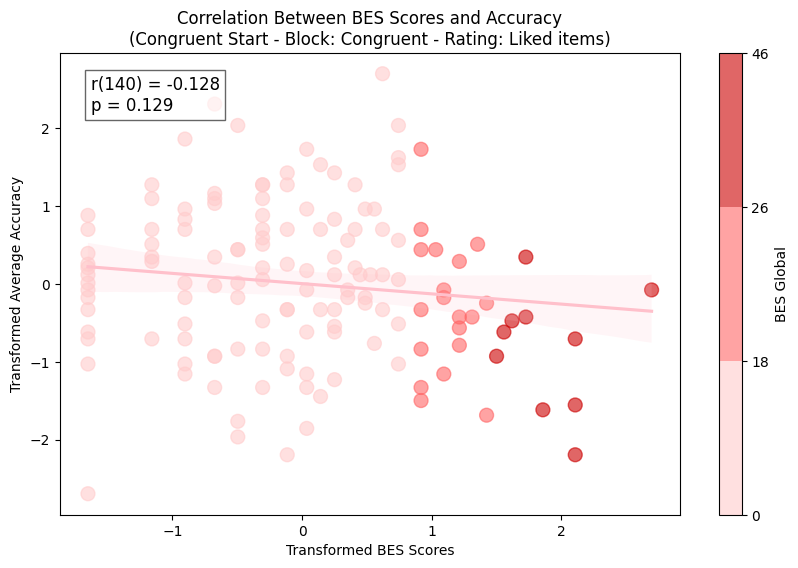

The Pearson correlation for Congruent Start - Block: Congruent - Rating: Liked items resulted in r(140) = -0.128, p = 0.129.


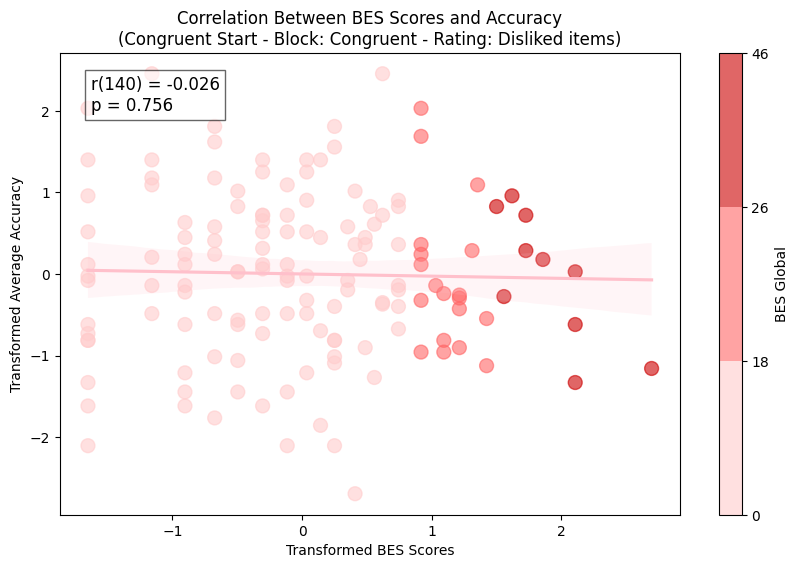

The Pearson correlation for Congruent Start - Block: Congruent - Rating: Disliked items resulted in r(140) = -0.026, p = 0.756.


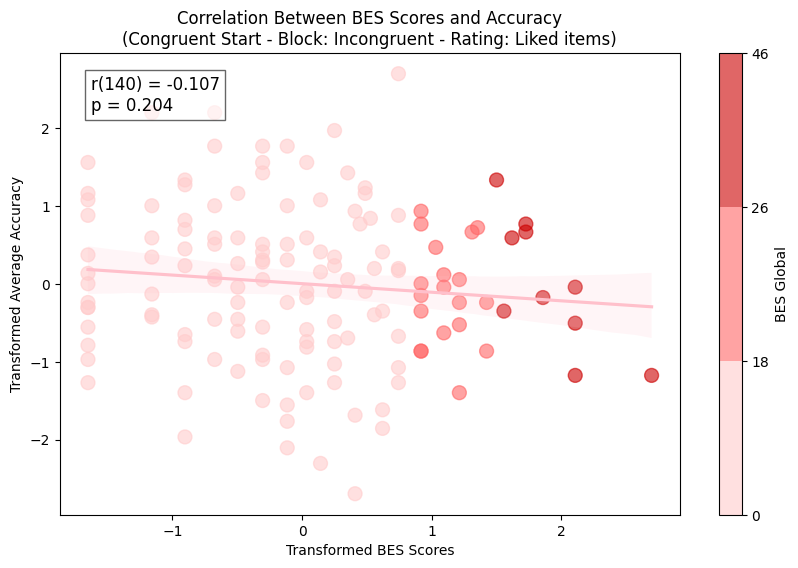

The Pearson correlation for Congruent Start - Block: Incongruent - Rating: Liked items resulted in r(140) = -0.107, p = 0.204.


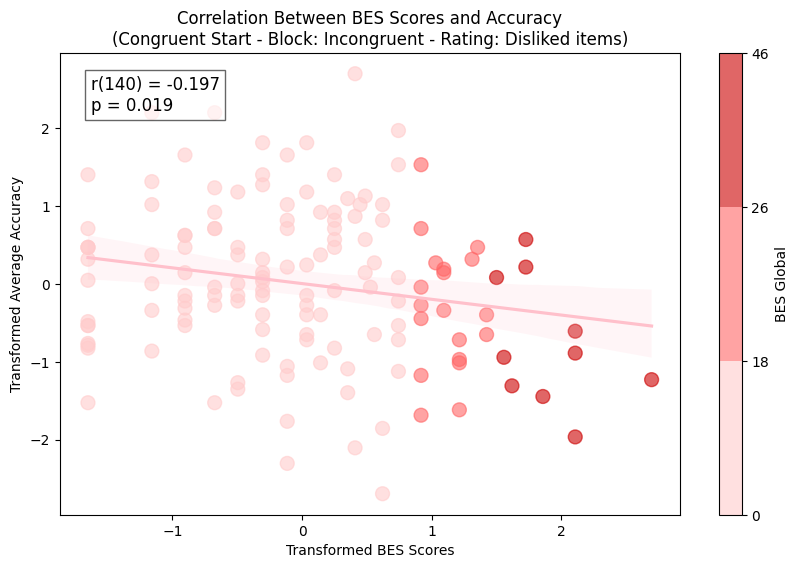

The Pearson correlation for Congruent Start - Block: Incongruent - Rating: Disliked items resulted in r(140) = -0.197, p = 0.019.


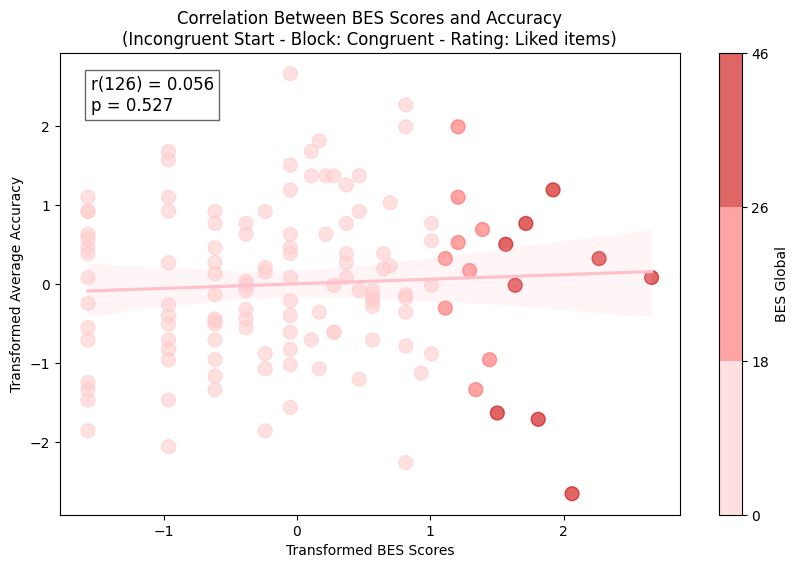

The Pearson correlation for Incongruent Start - Block: Congruent - Rating: Liked items resulted in r(126) = 0.056, p = 0.527.


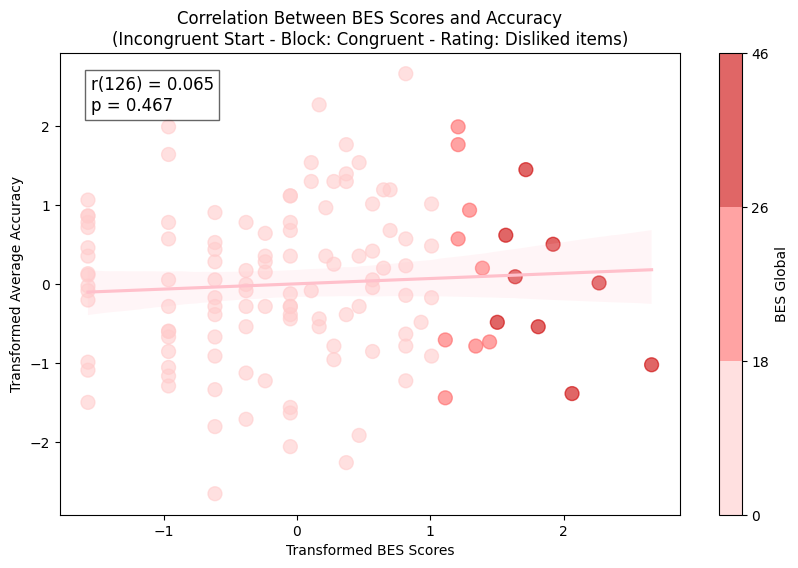

The Pearson correlation for Incongruent Start - Block: Congruent - Rating: Disliked items resulted in r(126) = 0.065, p = 0.467.


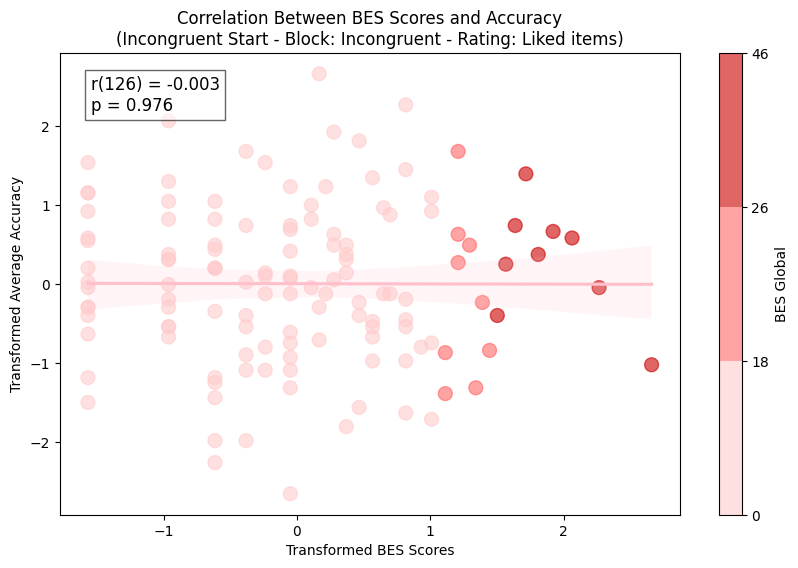

The Pearson correlation for Incongruent Start - Block: Incongruent - Rating: Liked items resulted in r(126) = -0.003, p = 0.976.


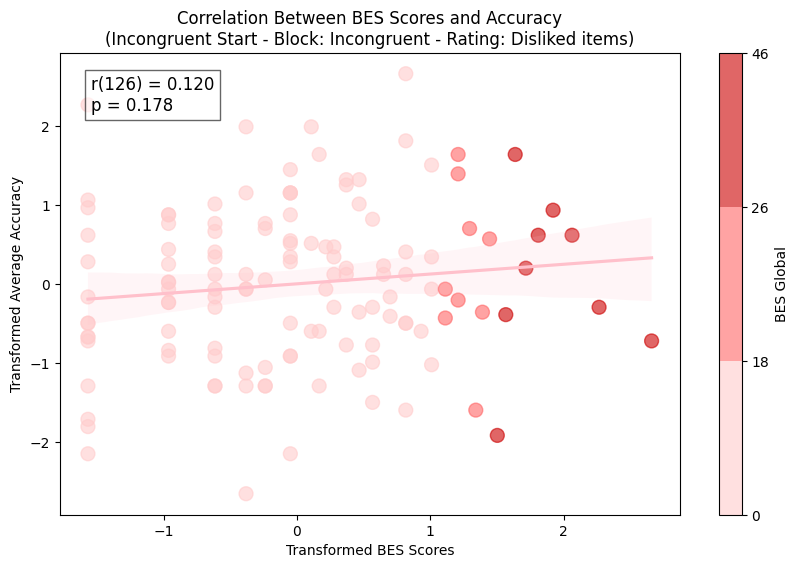

The Pearson correlation for Incongruent Start - Block: Incongruent - Rating: Disliked items resulted in r(126) = 0.120, p = 0.178.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, rankdata, norm
from matplotlib.colors import BoundaryNorm, ListedColormap

# Path to the survey responses CSV file
survey_responses_path = "/content/drive/My Drive/Levy Lab/Value updating project/online analysis/subject data/survey_responses.csv"

# Load the survey responses CSV into a DataFrame with encoding specified
survey_df = pd.read_csv(survey_responses_path, encoding='ISO-8859-1')

# Transpose the survey data to make each subject's data a row
survey_df = survey_df.transpose()

# Set the first row as the header
survey_df.columns = survey_df.iloc[0]
survey_df = survey_df.drop(survey_df.index[0])

# Convert columns to numeric where possible (except 'Subject ID')
survey_df = survey_df.apply(pd.to_numeric, errors='ignore')

# Preprocess accuracy data similarly to the previous analysis
def preprocess_accuracy_data(data_df):
    data_df['Image Rating'] = data_df['Image Rating'].replace({
        'like': 'Liked items',
        'strongly_like': 'Liked items',
        'dislike': 'Disliked items',
        'strongly_dislike': 'Disliked items'
    })

    data_df['Block Type'] = data_df['Block Type'].replace({
        'Aligned': 'Congruent',
        'Unaligned': 'Incongruent'
    })

    # Ensure 'Image Rating' and 'Block Type' are in the specified order
    rating_order = ['Disliked items', 'Liked items']
    data_df['Image Rating'] = pd.Categorical(data_df['Image Rating'], categories=rating_order, ordered=True)
    block_order = ['Congruent', 'Incongruent']
    data_df['Block Type'] = pd.Categorical(data_df['Block Type'], categories=block_order, ordered=True)

    return data_df

aligned_start_df = preprocess_accuracy_data(aligned_start_df)
unaligned_start_df = preprocess_accuracy_data(unaligned_start_df)

# Calculate mean accuracy by participant, block type, and image rating
def compute_participant_means(data_df, block_type, rating_type):
    grouped = data_df.groupby(['Subject ID', 'Block Type', 'Image Rating'], observed=False)['Correct (Binary)'].mean().reset_index()
    return grouped[(grouped['Block Type'] == block_type) & (grouped['Image Rating'] == rating_type)]

# Get mean accuracies for congruent start participants
congruent_start_liked_df = compute_participant_means(aligned_start_df, 'Congruent', 'Liked items')
congruent_start_disliked_df = compute_participant_means(aligned_start_df, 'Congruent', 'Disliked items')
incongruent_start_liked_df = compute_participant_means(aligned_start_df, 'Incongruent', 'Liked items')
incongruent_start_disliked_df = compute_participant_means(aligned_start_df, 'Incongruent', 'Disliked items')

# Get mean accuracies for incongruent start participants
congruent_start_liked_df_unaligned = compute_participant_means(unaligned_start_df, 'Congruent', 'Liked items')
congruent_start_disliked_df_unaligned = compute_participant_means(unaligned_start_df, 'Congruent', 'Disliked items')
incongruent_start_liked_df_unaligned = compute_participant_means(unaligned_start_df, 'Incongruent', 'Liked items')
incongruent_start_disliked_df_unaligned = compute_participant_means(unaligned_start_df, 'Incongruent', 'Disliked items')

# Merge accuracy data with survey data
def merge_with_survey_data(participant_means_df, survey_df):
    participant_means_df['Subject ID'] = participant_means_df['Subject ID'].astype(str)
    merged_df = pd.merge(participant_means_df, survey_df, left_on='Subject ID', right_index=True)
    return merged_df

congruent_start_liked_merged = merge_with_survey_data(congruent_start_liked_df, survey_df)
congruent_start_disliked_merged = merge_with_survey_data(congruent_start_disliked_df, survey_df)
incongruent_start_liked_merged = merge_with_survey_data(incongruent_start_liked_df, survey_df)
incongruent_start_disliked_merged = merge_with_survey_data(incongruent_start_disliked_df, survey_df)

congruent_start_liked_merged_unaligned = merge_with_survey_data(congruent_start_liked_df_unaligned, survey_df)
congruent_start_disliked_merged_unaligned = merge_with_survey_data(congruent_start_disliked_df_unaligned, survey_df)
incongruent_start_liked_merged_unaligned = merge_with_survey_data(incongruent_start_liked_df_unaligned, survey_df)
incongruent_start_disliked_merged_unaligned = merge_with_survey_data(incongruent_start_disliked_df_unaligned, survey_df)

# Define custom colormap for BES Global scores
colors = ['#FFCCCC', '#FF6666', '#CC0000']  # Colors for minimal, moderate, and severe BE
cmap_name = 'category_reds'
category_cmap = ListedColormap(colors)
boundaries = [0, 18, 26, 46]
norm_boundaries = BoundaryNorm(boundaries, category_cmap.N, clip=True)

# Function to apply rank-based inverse normal transformation (rankit transformation)
def rankit_transformation(series):
    ranks = rankdata(series)
    rankit_scores = norm.ppf((ranks - 0.5) / len(ranks))
    return rankit_scores

# Function to plot correlation between BES scores and mean accuracy by Block Type and Image Rating
def plot_bes_accuracy_correlation(merged_df, block_type, image_rating, start_type):
    bes_global = pd.to_numeric(merged_df['bes_GLOBAL'], errors='coerce')
    mean_accuracy = pd.to_numeric(merged_df['Correct (Binary)'], errors='coerce')

    # Drop NaN values
    valid_indices = ~bes_global.isna() & ~mean_accuracy.isna()
    bes_global = bes_global[valid_indices]
    mean_accuracy = mean_accuracy[valid_indices]

    # Apply rankit transformation to BES and mean accuracy
    transformed_bes = rankit_transformation(bes_global)
    transformed_mean_accuracy = rankit_transformation(mean_accuracy)

    # Add a check to ensure transformed data have sufficient variance and are not constant
    if np.std(transformed_bes) == 0 or np.std(transformed_mean_accuracy) == 0:
        print(f"Insufficient variance in transformed data for correlation between BES and mean accuracy for {start_type} Start - Block: {block_type} - Rating: {image_rating}")
        return

    # If there are insufficient valid data points, skip plotting
    if len(bes_global) < 2 or len(mean_accuracy) < 2:
        print(f"Insufficient data for correlation between BES and mean accuracy for {start_type} Start - Block: {block_type} - Rating: {image_rating}")
        return

    correlation, p_value = pearsonr(transformed_bes, transformed_mean_accuracy)
    df = len(bes_global) - 2  # Degrees of freedom

    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(transformed_bes, transformed_mean_accuracy, c=bes_global, cmap=category_cmap, norm=norm_boundaries, s=100, alpha=0.6)
    plt.colorbar(scatter, label='BES Global')

    sns.regplot(x=transformed_bes, y=transformed_mean_accuracy, scatter=False, line_kws={"color": "pink"}, ci=95)
    plt.text(0.05, 0.95, f'r({df}) = {correlation:.3f}\np = {p_value:.3f}', transform=plt.gca().transAxes, fontsize=12,
             verticalalignment='top', bbox=dict(facecolor='white', alpha=0.6))

    plt.title(f'Correlation Between BES Scores and Accuracy\n({start_type} Start - Block: {block_type} - Rating: {image_rating})')
    plt.xlabel('Transformed BES Scores')
    plt.ylabel('Transformed Average Accuracy')
    plt.grid(False)
    plt.show()
    print(f"The Pearson correlation for {start_type} Start - Block: {block_type} - Rating: {image_rating} resulted in r({df}) = {correlation:.3f}, p = {p_value:.3f}.")

# Plot correlations for congruent start participants
plot_bes_accuracy_correlation(congruent_start_liked_merged, 'Congruent', 'Liked items', 'Congruent')
plot_bes_accuracy_correlation(congruent_start_disliked_merged, 'Congruent', 'Disliked items', 'Congruent')
plot_bes_accuracy_correlation(incongruent_start_liked_merged, 'Incongruent', 'Liked items', 'Congruent')
plot_bes_accuracy_correlation(incongruent_start_disliked_merged, 'Incongruent', 'Disliked items', 'Congruent')

# Plot correlations for incongruent start participants
plot_bes_accuracy_correlation(congruent_start_liked_merged_unaligned, 'Congruent', 'Liked items', 'Incongruent')
plot_bes_accuracy_correlation(congruent_start_disliked_merged_unaligned, 'Congruent', 'Disliked items', 'Incongruent')
plot_bes_accuracy_correlation(incongruent_start_liked_merged_unaligned, 'Incongruent', 'Liked items', 'Incongruent')
plot_bes_accuracy_correlation(incongruent_start_disliked_merged_unaligned, 'Incongruent', 'Disliked items', 'Incongruent')

<IPython.core.display.Javascript object>

Relevant DataFrame:
     bes_GLOBAL  survey_age survey_gender        BMI  Correct (Binary)
2            4          29           Man  27.043535          0.600000
6            7          63           Man  26.496727          0.703704
10          10          34           Man  31.746482          0.420000
14          30          37         Woman  30.893555          0.740000
18          13          43         Woman  22.140338          0.680000
DataFrame after numeric conversion:
     bes_GLOBAL  survey_age survey_gender        BMI  Correct (Binary)
2            4          29           Man  27.043535          0.600000
6            7          63           Man  26.496727          0.703704
10          10          34           Man  31.746482          0.420000
14          30          37         Woman  30.893555          0.740000
18          13          43         Woman  22.140338          0.680000
DataFrame after dropping NaNs:
     bes_GLOBAL  survey_age survey_gender        BMI  Correct (Binary)


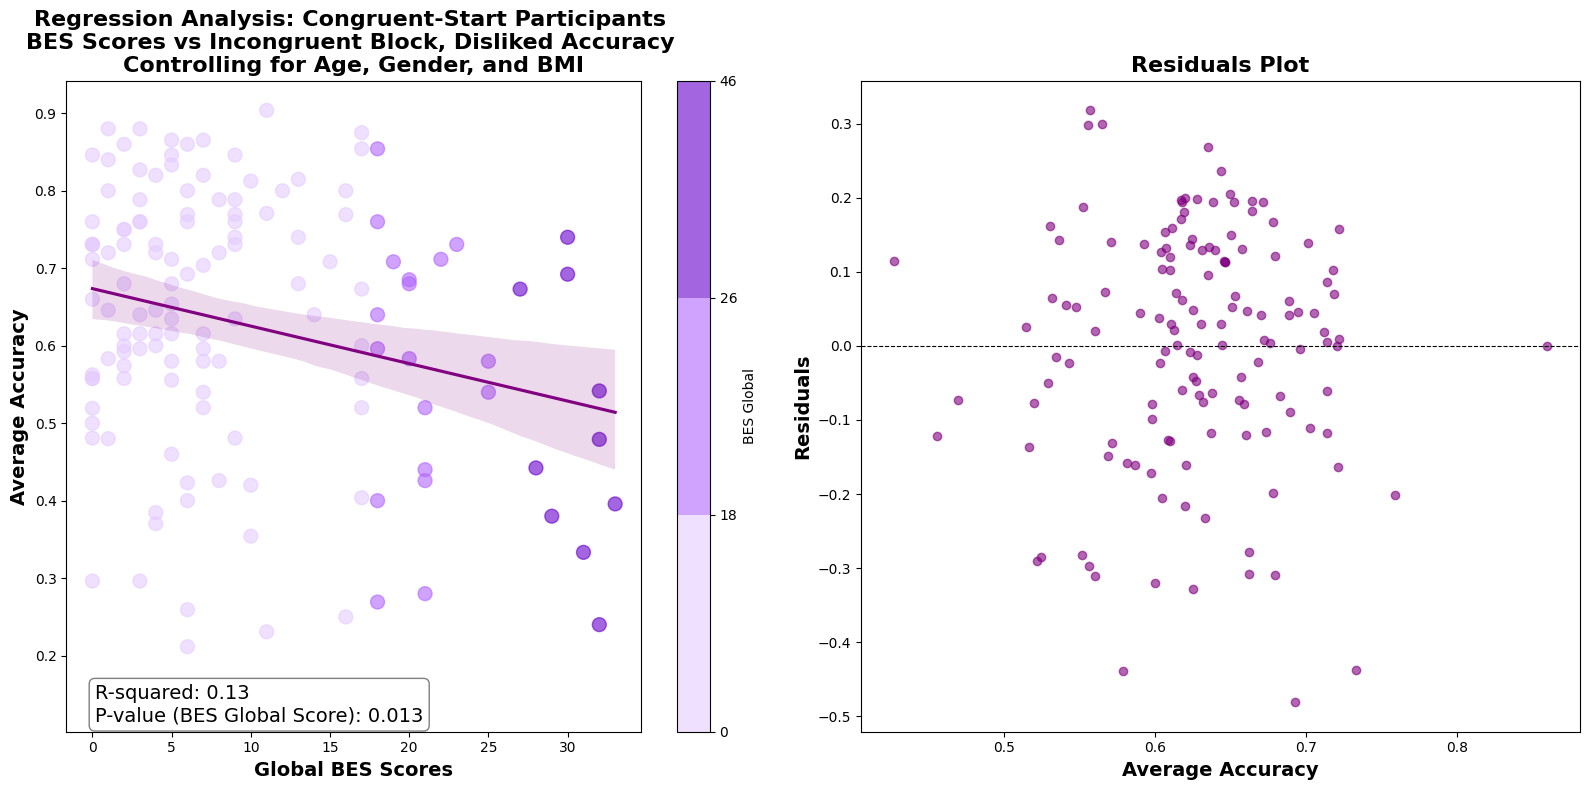

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import BoundaryNorm, ListedColormap

# Define custom colormap for BES Global scores in purple shades
colors = ['#E5CCFF', '#B266FF', '#6600CC']  # Colors for minimal, moderate, and severe BE
cmap_name = 'category_purples'
category_cmap = ListedColormap(colors)
boundaries = [0, 18, 26, 46]
norm_boundaries = BoundaryNorm(boundaries, category_cmap.N, clip=True)

# Filter the dataframe for the specific condition
filtered_df = incongruent_start_disliked_merged.copy()

# Verify specific columns' data types
relevant_columns = ['bes_GLOBAL', 'survey_age', 'survey_gender', 'BMI', 'Correct (Binary)']
filtered_df = filtered_df[relevant_columns]

# Debug check
print("Relevant DataFrame:\n", filtered_df.head())

# Convert specific columns to the appropriate numeric types
for col in ['bes_GLOBAL', 'survey_age', 'BMI', 'Correct (Binary)']:
    filtered_df[col] = pd.to_numeric(filtered_df[col], errors='coerce')

# Debug check after numeric conversion
print("DataFrame after numeric conversion:\n", filtered_df.head())

# Drop rows with any missing values
filtered_df = filtered_df.dropna()

# Debug check after dropping NaNs
print("DataFrame after dropping NaNs:\n", filtered_df.head())

# Confirm DataFrame size to ensure it is not empty
print("DataFrame shape after processing:", filtered_df.shape)
if filtered_df.empty:
    raise ValueError("The processed DataFrame is empty. Please check your data.")

# Select relevant columns for regression analysis
X = filtered_df[['bes_GLOBAL', 'survey_age', 'survey_gender', 'BMI']]
y = filtered_df['Correct (Binary)']

# Convert categorical columns to categories and then to dummy variables
X = pd.get_dummies(X, columns=['survey_gender'], drop_first=True)

# Ensure all dummy variables are integer
X = X.apply(lambda col: col.astype(np.float64) if col.dtype == bool else col)

# Debug check after dummy encoding and conversion
print("X after dummy encoding and conversion:\n", X.head())
print(X.dtypes)

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Convert all columns to float or appropriate numeric types
X = X.astype(float)
y = y.astype(float)

# Debug check after ensuring all numeric types
print(X.dtypes)
print(y.dtypes)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

# Extract R-squared and p-value for the bes_GLOBAL variable
r_squared = model.rsquared
p_value_bes_GLOBAL = model.pvalues['bes_GLOBAL']

# Print R-squared and p-value for verification
print(f"R-squared: {r_squared}")
print(f"P-value (bes_GLOBAL): {p_value_bes_GLOBAL}")

# Predict the values
predictions = model.predict(X)

# Residuals
residuals = y - predictions

# Plot the correlation between BES scores and accuracy, controlling for other variables
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Scatter plot and regression
scatter = axes[0].scatter(filtered_df['bes_GLOBAL'], y, c=filtered_df['bes_GLOBAL'], cmap=category_cmap, norm=norm_boundaries, s=100, alpha=0.6)
sns.regplot(x=filtered_df['bes_GLOBAL'], y=y, scatter=False, line_kws={"color": "purple"}, ci=95, ax=axes[0])
plt.colorbar(scatter, ax=axes[0], label='BES Global')
axes[0].set_title("Regression Analysis: Congruent-Start Participants \nBES Scores vs Incongruent Block, Disliked Accuracy \nControlling for Age, Gender, and BMI", fontsize=16, fontweight='bold')
axes[0].set_xlabel('Global BES Scores', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Average Accuracy', fontsize=14, fontweight='bold')

# Annotate with both R-squared and p-value in the same box
annotation_text = f'R-squared: {r_squared:.2f}\nP-value (BES Global Score): {p_value_bes_GLOBAL:.3f}'
axes[0].annotate(annotation_text, xy=(0.05, 0.01), xycoords='axes fraction', fontsize=14, ha='left', va='bottom',
                 bbox=dict(boxstyle="round,pad=0.3", edgecolor='grey', facecolor='white'))

# Residuals plot
axes[1].scatter(predictions, residuals, c='purple', alpha=0.6)
axes[1].axhline(0, color='black', linewidth=0.8, linestyle='--')
axes[1].set_title('Residuals Plot', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Average Accuracy', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Residuals', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()